# Stock Price Prediction using Time Series Analysis

**Author:** Prasad Rao  
**Date:** July 31, 2025  
**Course:** Machine Learning and AI Capstone Project

## Project Overview

This project explores robust stock price forecasting by combining time series analysis and fundamental data. It addresses the complexity of predicting stock prices, which are influenced by a wide range of quantitative (financial performance, market/sector trends) and qualitative (sentiment, analyst opinion, institutional interest) factors.

Key steps include:
- Collecting technical and fundamental data for a diverse set of US stocks and sectors
- Engineering features such as fair price, price-to-book, and price-to-earnings ratios from quarterly reports
- Applying STL decomposition, ARIMA, and regression models to analyze and forecast price trends
- Evaluating sector rotation, monthly/quarterly cycles, and the impact of earnings releases on price corrections

The project demonstrates the challenges of financial forecasting and provides a foundation for further research using advanced modeling and alternative data sources.

In [13]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import os
 
AV_API_KEY = 'C6MJB5IPZ5DV580I'
ts = TimeSeries(key=AV_API_KEY, output_format='pandas')
 
tickers = ['AAPL', 'GOOGL', 'MSFT']  # Example tickers
start_date = '1999-01-01'
end_date = '2025-01-01'
 
os.makedirs('ticker_data', exist_ok=True)
 
for ticker in tickers:
    try:
        data, meta_data = ts.get_daily(symbol=ticker, outputsize='full')
        data = data.loc[(data.index >= start_date) & (data.index <= end_date)]
        data.to_csv(f'ticker_data/{ticker}_stock_data.csv')
        # print(f"Downloaded and saved {ticker}")
    except Exception as e:
        # print(f"Error downloading {ticker}: {e}")
        pass

## Stock Data Downloaded from Alphavantage
 
The project utilizes historical stock data downloaded from the Alphavantage data service. This data includes:
- Daily price action (Open, High, Low, Close, Volume) for each selected ticker
- Coverage across multiple sectors: technology, finance, energy, consumer, and more
- Data spans over 25 years (1999–2025), enabling robust backtesting and analysis across different market cycles
- Data is organized in the `ticker_data/` directory, with one CSV file per ticker
 
This comprehensive dataset forms the foundation for all technical and fundamental analyses performed in the project.

In [ ]:
%pip install alpha-vantage

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import os
from datetime import datetime

## Select tickers and date range

Initial setup for gathering all the technical data (daily price action). The following code creates secure data storage folder using os.makedirs() with error prevention.

Stock Selection Strategy:
- a bucket of tickers that are of interest
- a bucket of sector ETFs to measure the sector interest and trend
- a bucket of market indices that measure the overall market participation

Time Frame: 26+ year historical window from 1999-2025 for robust backtesting
Data Foundation: Sets parameters for comprehensive market analysis across different economic cycles

In [7]:

# Create data folder if it doesn't exist
# This ensures we have a directory to store downloaded financial data
os.makedirs('ticker_data', exist_ok=True)

# Define tickers to download
# Mixed portfolio of large-cap (AAPL, GOOGL, MSFT) and growth stocks (TSLA, PLTR, RKLB)
# Includes traditional finance (C, JPM, BK), tech (NVDA, META, NET), and emerging sectors
tickers = [
           'AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'C', 'JPM',  
           'NVDA', 'META', 'BRK-B', 'XOM', 'WMT', 'FRFHF', 'BK',
           'TSSI', 'IREN', 'CLS', 'FUTU', 
           'PLTR', 'DAVE', 'HOOD', 'AMSC', 'OUST',
           'RKLB', 'SYM', 'CRCL', 'ATI', 'AFRM', 'ATAT', 'RYTM', 'APH',
           'URBN', 'FIX', 'ALAB', 'JBL', 'NET', 'SOFI', 'LIF', 'RMBS',
           'PWR', 'SHOP', 'VRT', 'RBLX', 
           'COIN', 'DOCS', 'TSM', 'ONC',
           'KLAC', 'SNEX', 'VEEV', 'ZS', 'KNSA', 'SNOW', 'SFM', 'ANET',
           'CRWD', 'CCJ', 'TBBK', 'ACMR', 'MIRM', 'DASH', 'TOST', 'HEI']

# Date range for historical data collection
# Covers over 25 years of market data for comprehensive analysis
start_date = '1999-01-01'  # Start from early dot-com era
end_date = '2025-06-30'    # Extended through mid-2025 for future projections

## For Each Ticker, Download the Data
 
For this project, historical daily stock data was programmatically downloaded for each selected ticker using the Alphavantage API. The process included:
 
- **Automated Download:** A Python script was used to loop through a list of tickers and request daily price data (Open, High, Low, Close, Volume) for each symbol and store the data locally, to avoid duplicate calls.
- **API Access:** The Alphavantage API provides free access to historical stock data. An API key is required, and requests are rate-limited (typically 5 calls per minute).
- **Data Storage:** Each ticker's data is saved as a separate CSV file in the `ticker_data/` directory. This structure makes it easy to load and analyze data for individual stocks or the entire portfolio.
- **Date Range:** Data was collected from 1999 to 2025, providing a long time horizon for robust backtesting and analysis across different market cycles.
- **Reproducibility:** The download script can be rerun to refresh or expand the dataset as needed. Ensure your API key is set as an environment variable or in a config file for secure access.
 
This approach ensures that all technical analysis and modeling in the project are based on a consistent, up-to-date, and well-organized dataset.

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time
import os

ts = TimeSeries(key=AV_API_KEY, output_format='pandas')

# Create directory if it doesn't exist
os.makedirs("ticker_data", exist_ok=True)

def safe_download(ticker, max_retries=3):
    for attempt in range(max_retries):
        try:
            
            # Get daily adjusted data
            data, meta_data = ts.get_daily_adjusted(symbol=ticker, outputsize='full')
            data = data.sort_index()
            
            # Filter data by date range if needed
            if 'start_date' in locals() and 'end_date' in locals():
                data = data[start_date:end_date]
            
            # Save to CSV
            filename = f"ticker_data/{ticker}_stock_data.csv"
            data.to_csv(filename)
            print(f"Saved {ticker} to {filename}")
            return True
            
        except Exception as e:
            if attempt < max_retries - 1:
                wait_time = (attempt + 1) * 30  # Exponential backoff
                time.sleep(wait_time)
            else:
                print(f"All attempts failed for {ticker}")
                return False

# Download data for each ticker with more conservative timing
for i, ticker in enumerate(tickers):
    success = safe_download(ticker)
    
    if success:
        time.sleep(2)
        if (i + 1) % 4 == 0:
            time.sleep(30)
    else:
        time.sleep(60)

print("Download complete!")

## Data Cleanup

Remove the headers that are not required

In [ ]:

# Get list of all stock data files
data_files = [f for f in os.listdir('ticker_data') if f.endswith('_stock_data.csv')]

for file in data_files:
   file_path = f'ticker_data/{file}'
   
   # Read the file
   df = pd.read_csv(file_path, index_col=0, parse_dates=True)
   
   # Remove first two rows
   df_cleaned = df.iloc[2:]
   
   # Save back to file
   df_cleaned.to_csv(file_path)
   
   print(f"Cleaned {file}")

print("All files cleaned!")

Cleaned AAPL_stock_data.csv
Cleaned ACMR_stock_data.csv
Cleaned AFRM_stock_data.csv
Cleaned ALAB_stock_data.csv
Cleaned AMSC_stock_data.csv
Cleaned AMZN_stock_data.csv
Cleaned ANET_stock_data.csv
Cleaned APH_stock_data.csv
Cleaned ATAT_stock_data.csv
Cleaned ATI_stock_data.csv
Cleaned BK_stock_data.csv


C:\Users\prao5\AppData\Local\Temp\ipykernel_80016\2121317563.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, index_col=0, parse_dates=True)


Cleaned BRK-B_stock_data.csv
Cleaned CCJ_stock_data.csv
Cleaned CLS_stock_data.csv
Cleaned COIN_stock_data.csv
Cleaned CRCL_stock_data.csv
Cleaned CRWD_stock_data.csv
Cleaned C_stock_data.csv
Cleaned DASH_stock_data.csv
Cleaned DAVE_stock_data.csv
Cleaned DOCS_stock_data.csv
Cleaned FIX_stock_data.csv
Cleaned FRFHF_stock_data.csv
Cleaned FUTU_stock_data.csv
Cleaned GOOGL_stock_data.csv
Cleaned HEI_stock_data.csv
Cleaned HOOD_stock_data.csv
Cleaned IREN_stock_data.csv
Cleaned JBL_stock_data.csv
Cleaned JPM_stock_data.csv
Cleaned KLAC_stock_data.csv
Cleaned KNSA_stock_data.csv
Cleaned LIF_stock_data.csv
Cleaned META_stock_data.csv
Cleaned MIRM_stock_data.csv
Cleaned MSFT_stock_data.csv
Cleaned NET_stock_data.csv
Cleaned NVDA_stock_data.csv
Cleaned ONC_stock_data.csv
Cleaned OUST_stock_data.csv
Cleaned PLTR_stock_data.csv
Cleaned PWR_stock_data.csv
Cleaned RBLX_stock_data.csv
Cleaned RKLB_stock_data.csv
Cleaned RMBS_stock_data.csv
Cleaned RYTM_stock_data.csv
Cleaned SFM_stock_data.csv
Cle

## Get Sector data for 10-15 years to understand patterns

In [ ]:
import os

os.makedirs('sector_data', exist_ok=True)

sectors = ['XLK','XLV','XLE','XLI','XLP','XLU','XLF','XLY','XLB','XLC','XLRE']

# Date range for historical data collection
# Covers over 25 years of market data for comprehensive analysis
start_date = '1980-01-01'  # Start from as early as possible for sector analysis
end_date = '2025-06-30'    # Extended through mid-2025 for future projections

In [21]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time
import os

ts = TimeSeries(key=AV_API_KEY, output_format='pandas')

# Create directory if it doesn't exist
os.makedirs("sector_data", exist_ok=True)

# Robust download function with retry logic
def safe_download_with_retry(sector, max_retries=3):
    for attempt in range(max_retries):
        try:
            # Get daily adjusted data
            data, meta_data = ts.get_daily_adjusted(symbol=sector, outputsize='full')
            
            # Sort the data first to make it monotonic
            data = data.sort_index()
            
            # Filter data by date range if needed
            if 'start_date' in locals() and 'end_date' in locals():
                data = data[start_date:end_date]
            
            # Save to CSV
            filename = f"sector_data/{sector}_stock_data.csv"
            data.to_csv(filename)
            return True
            
        except Exception as e:
            if attempt < max_retries - 1:
                wait_time = (attempt + 1) * 30  # Exponential backoff
                time.sleep(wait_time)
            else:
                return False

# Download data for each sector with conservative timing
for i, sector in enumerate(sectors):
    success = safe_download_with_retry(sector)
    
    if success:
        # Conservative rate limiting: 20 seconds between requests
        time.sleep(2)
        
        # Longer break every 4 requests
        if (i + 1) % 4 == 0:
            time.sleep(30)
    else:
        # If download failed, wait longer before next attempt
        time.sleep(60)

print("Download complete!")

NameError: The variable 'sectors' is not defined. Please run the cell where 'sectors' is defined (see CELL INDEX 12).

In [22]:

data_files = [f for f in os.listdir('sector_data') if f.endswith('_stock_data.csv')]

for file in data_files:
   file_path = f'sector_data/{file}'
   
   # Read the file
   df = pd.read_csv(file_path, index_col=0, parse_dates=True)
   
   # Remove first two rows
   df_cleaned = df.iloc[2:]
   
   # Save back to file
   df_cleaned.to_csv(file_path)
   
   print(f"Cleaned {file}")

print("All files cleaned!")

Cleaned XLB_stock_data.csv
Cleaned XLC_stock_data.csv
Cleaned XLE_stock_data.csv
Cleaned XLF_stock_data.csv
Cleaned XLI_stock_data.csv
Cleaned XLK_stock_data.csv
Cleaned XLP_stock_data.csv
Cleaned XLRE_stock_data.csv
Cleaned XLU_stock_data.csv
Cleaned XLV_stock_data.csv
Cleaned XLY_stock_data.csv
All files cleaned!


## Lets analyze what sectors work in bullish market and what is favorable in bearish

In [23]:
print("Loading sector data for bull/bear analysis...")

# Load sector ETF data from local CSV files
sector_data = {}
data_folder = 'sector_data'

for sector in sectors:
    try:
        filename = f"{sector}_stock_data.csv"
        filepath = os.path.join(data_folder, filename)
        df = pd.read_csv(filepath, index_col=0, parse_dates=True)
        
        # Use Alpha Vantage column name for adjusted close price
        sector_data[sector] = df['5. adjusted close']  # Changed from 'Close'
        
    except Exception as e:
        print(f"Error loading {sector}: {e}")

# Create DataFrame and calculate returns
sector_prices = pd.DataFrame(sector_data)
sector_prices = sector_prices.dropna(axis=1, how='all').fillna(method='ffill')
sector_returns = sector_prices.pct_change().dropna()

# Calculate market conditions (using average sector performance as proxy)
market_proxy = sector_returns.mean(axis=1)
top_10_days = market_proxy.quantile(0.9)      # Bull market days (top 10%)
bottom_10_days = market_proxy.quantile(0.1)   # Bear market days (bottom 10%)

# Calculate performance during bull and bear days
bull_performance = sector_returns[market_proxy >= top_10_days].mean()
bear_performance = sector_returns[market_proxy <= bottom_10_days].mean()

# Print results
print("\n" + "="*60)
print("SECTOR PERFORMANCE ANALYSIS")
print("="*60)

print(f"\nBull Market Analysis: {len(sector_returns[market_proxy >= top_10_days])} trading days")
print(f"Bear Market Analysis: {len(sector_returns[market_proxy <= bottom_10_days])} trading days")

print("\nSECTOR PERFORMANCE ON BULL MARKET DAYS (Top 10% Market Days):")
print("-" * 55)
bull_performance_pct = (bull_performance * 100).sort_values(ascending=False)
for sector, performance in bull_performance_pct.items():
    print(f"{sector}: {performance:+.2f}%")

print("\nSECTOR PERFORMANCE ON BEAR MARKET DAYS (Bottom 10% Market Days):")
print("-" * 57)
bear_performance_pct = (bear_performance * 100).sort_values(ascending=False)
for sector, performance in bear_performance_pct.items():
    print(f"{sector}: {performance:+.2f}%")

# Calculate and show the spread between bull and bear performance
print("\nBULL vs BEAR PERFORMANCE SPREAD:")
print("-" * 35)
spread = (bull_performance - bear_performance) * 100
spread_sorted = spread.sort_values(ascending=False)
for sector, spread_val in spread_sorted.items():
    print(f"{sector}: {spread_val:+.2f}% spread")

print("\n" + "="*60)

Loading sector data for bull/bear analysis...

SECTOR PERFORMANCE ANALYSIS

Bull Market Analysis: 179 trading days
Bear Market Analysis: 179 trading days

SECTOR PERFORMANCE ON BULL MARKET DAYS (Top 10% Market Days):
-------------------------------------------------------
XLK: +2.43%
XLE: +2.40%
XLF: +2.36%
XLY: +2.25%
XLB: +2.22%
XLI: +2.17%
XLC: +1.97%
XLRE: +1.92%
XLU: +1.53%
XLV: +1.49%
XLP: +1.24%

SECTOR PERFORMANCE ON BEAR MARKET DAYS (Bottom 10% Market Days):
---------------------------------------------------------
XLP: -1.32%
XLU: -1.55%
XLV: -1.60%
XLRE: -2.10%
XLC: -2.22%
XLB: -2.25%
XLI: -2.26%
XLF: -2.44%
XLY: -2.48%
XLE: -2.53%
XLK: -2.55%

BULL vs BEAR PERFORMANCE SPREAD:
-----------------------------------
XLK: +4.99% spread
XLE: +4.94% spread
XLF: +4.80% spread
XLY: +4.73% spread
XLB: +4.47% spread
XLI: +4.43% spread
XLC: +4.19% spread
XLRE: +4.02% spread
XLV: +3.09% spread
XLU: +3.08% spread
XLP: +2.56% spread



C:\Users\prao5\AppData\Local\Temp\ipykernel_80016\169350862.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sector_prices = sector_prices.dropna(axis=1, how='all').fillna(method='ffill')


## Sector Rotation Analysis

On bullish days the hypothesis is technology and innovation stands to gain. On bearish days, money is moved to more consumer staples - everyone needs to brush their teeth. 

The above sector analysis has revealed some interesting insights: 
Bull Markets: XLK dominates and XLP lags
Bear Markets: XLP loses least and XLK gets crushed

Risk-On Leaders (Bull Days): XLK, XLE, XLF - cyclical, high-beta sectors
Defensive Winners (Bear Days): XLP, XLU, XLV - consumer staples, utilities, healthcare
Energy (XLE) is extremely cyclical - 2nd best bull performer and 2nd worst bear performer
Financials (XLF) follow economic cycle - strong bull performance but heavy bear losses
Consumer Staples (XLP) are true defense - worst bull performer (+1.24%) but best bear protection (-1.33%)

Investment Strategy Implications:
Momentum Strategy: Rotate into XLK, XLE, XLF during bull markets
Defensive Strategy: Rotate into XLP, XLU, XLV during bear markets
Highest Alpha Opportunity: XLK has the widest spread (5.03%) - most timing potential
Risk Management: XLU provides consistent downside protection while still participating in upside

## Lets analyze patterns by month. Which month favors which sector over the past 15 years

Analyzing seasonal trends in sector performance...


Text(220.72222222222223, 0.5, 'Sector ETFs')

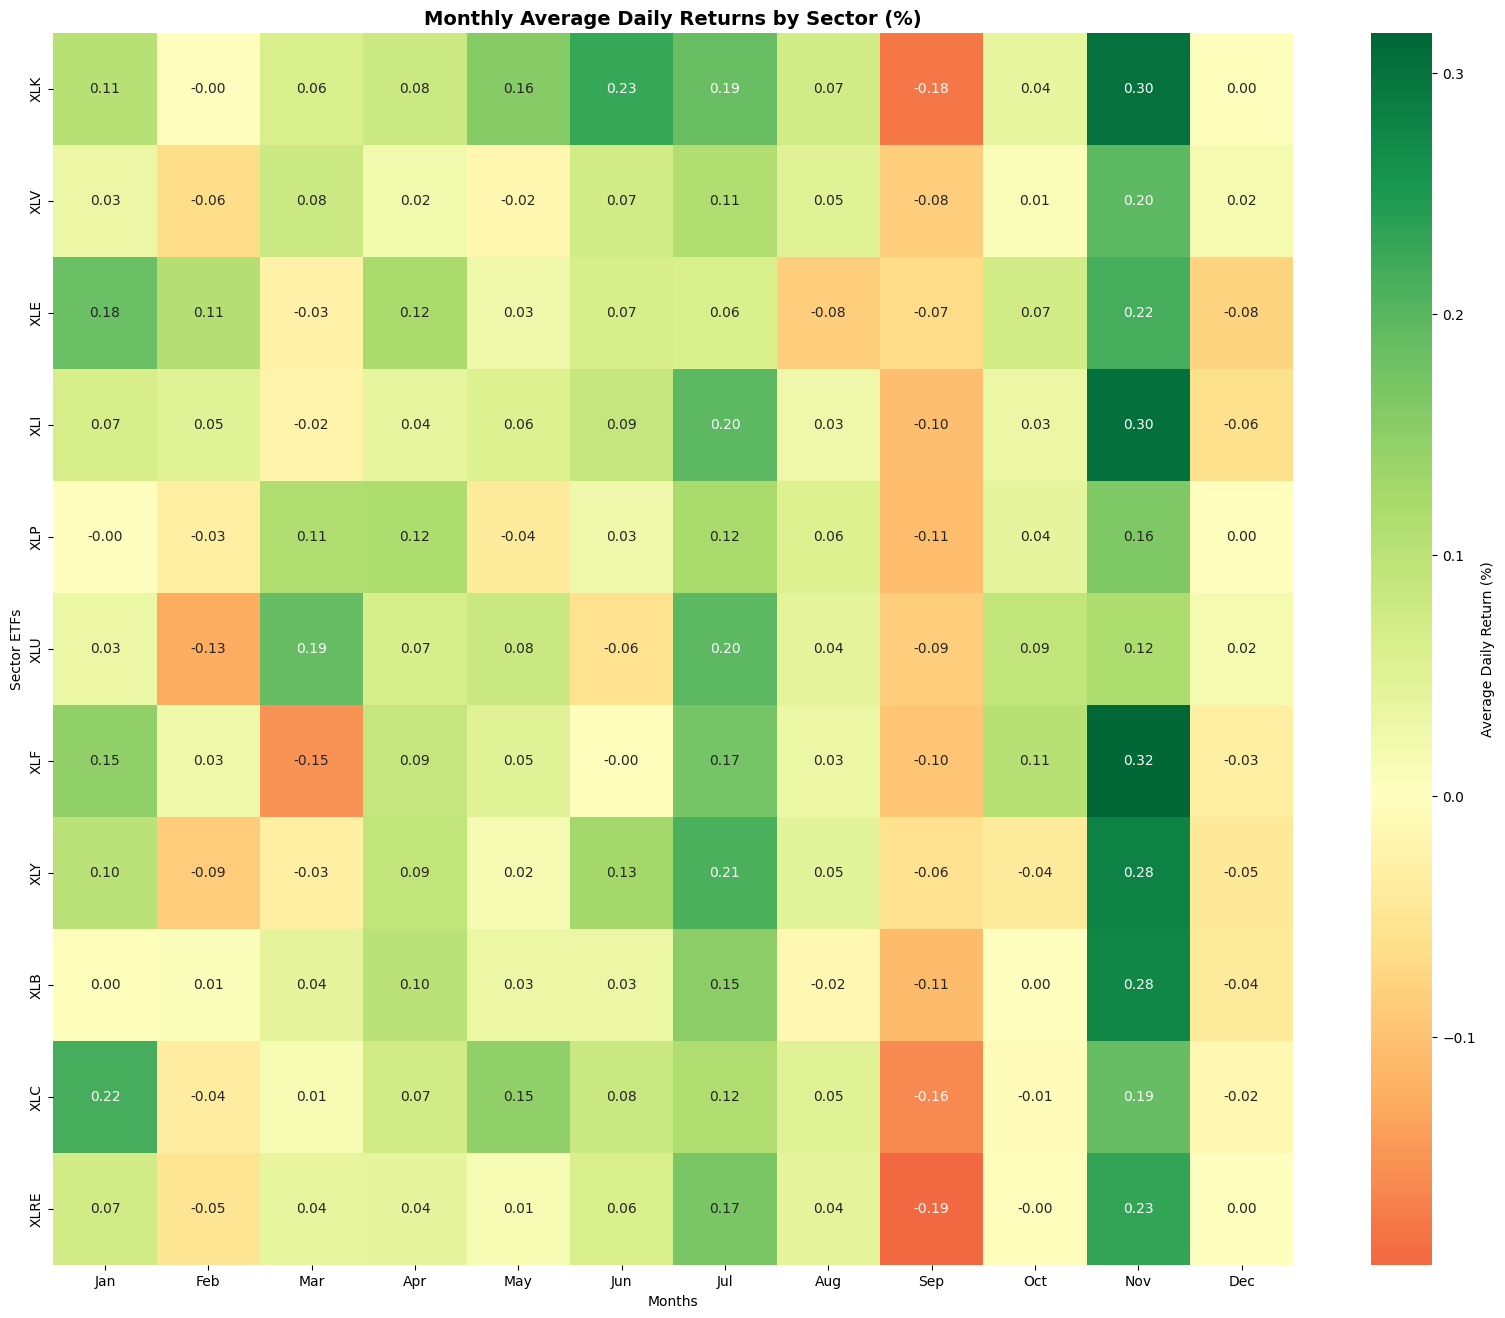

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Analyzing seasonal trends in sector performance...")

# Extract month and quarter from returns data
sector_returns_with_dates = sector_returns.copy()
sector_returns_with_dates['Month'] = sector_returns_with_dates.index.month
sector_returns_with_dates['Quarter'] = sector_returns_with_dates.index.quarter

# Calculate monthly statistics
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_avg_data = []
monthly_std_data = []

for month in range(1, 13):
    month_data = sector_returns_with_dates[sector_returns_with_dates['Month'] == month]
    month_returns = month_data[sectors]
    
    monthly_avg = (month_returns.mean() * 100)
    monthly_std = (month_returns.std() * 100)
    
    monthly_avg_data.append(monthly_avg)
    monthly_std_data.append(monthly_std)

# Create DataFrames for plotting
monthly_avg_df = pd.DataFrame(monthly_avg_data, index=month_names, columns=sectors)
monthly_std_df = pd.DataFrame(monthly_std_data, index=month_names, columns=sectors)

# Create comprehensive visualization
fig, (ax1) = plt.subplots(1, 1, figsize=(20, 16))

# 1. Monthly Average Returns Heatmap
sns.heatmap(monthly_avg_df.T, 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            cbar_kws={'label': 'Average Daily Return (%)'},
            ax=ax1)
ax1.set_title('Monthly Average Daily Returns by Sector (%)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Months')
ax1.set_ylabel('Sector ETFs')



## Sector Daily Performance by Month

July and November are the best months for all sectors
September is the worst month

Analyzing seasonal trends in sector performance...


C:\Users\prao5\AppData\Local\Temp\ipykernel_80016\2140487122.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sector_prices_monthly = sector_prices.resample('M').last()  # Get month-end prices


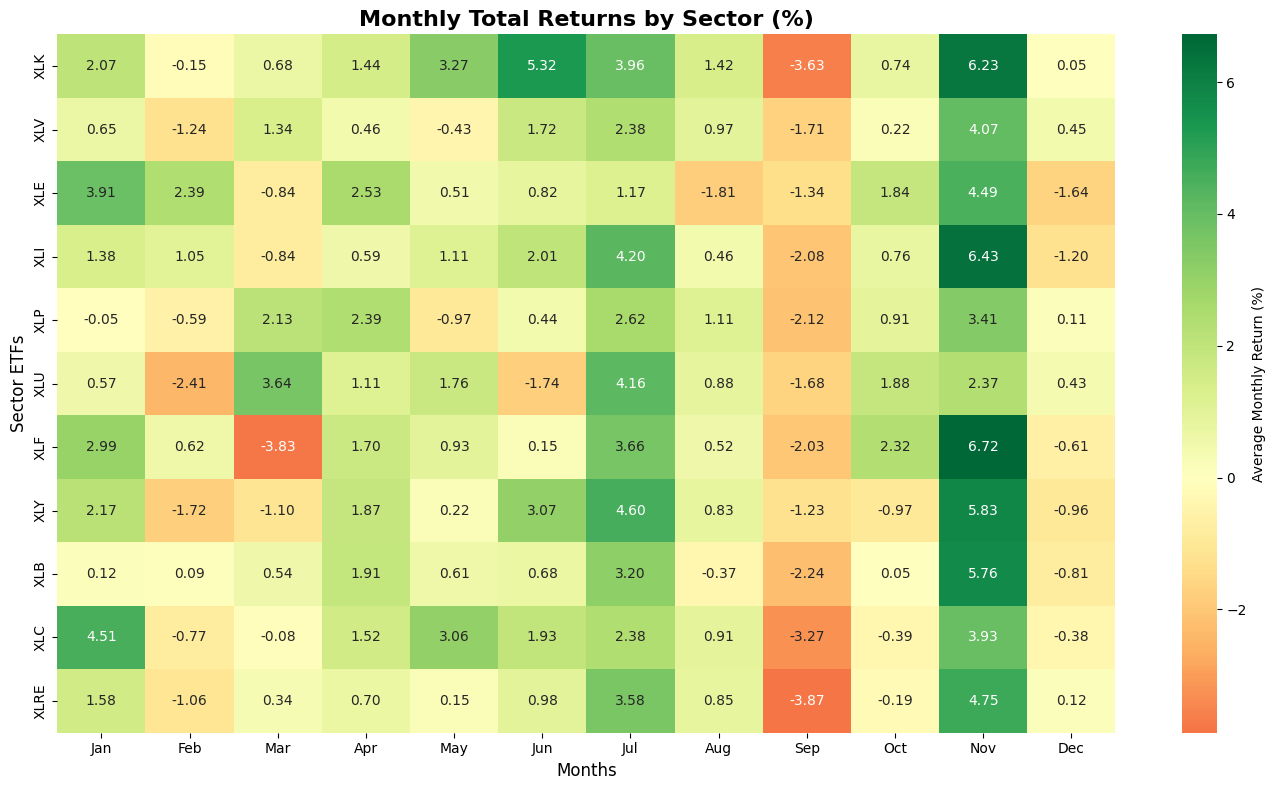


SEASONAL INSIGHTS - TOTAL MONTHLY RETURNS:

BEST PERFORMING SECTORS BY MONTH (Total Monthly Returns):
-------------------------------------------------------
Jan: XLC (+4.51%) | Worst: XLP (-0.05%)
Feb: XLE (+2.39%) | Worst: XLU (-2.41%)
Mar: XLU (+3.64%) | Worst: XLF (-3.83%)
Apr: XLE (+2.53%) | Worst: XLV (+0.46%)
May: XLK (+3.27%) | Worst: XLP (-0.97%)
Jun: XLK (+5.32%) | Worst: XLU (-1.74%)
Jul: XLY (+4.60%) | Worst: XLE (+1.17%)
Aug: XLK (+1.42%) | Worst: XLE (-1.81%)
Sep: XLY (-1.23%) | Worst: XLRE (-3.87%)
Oct: XLF (+2.32%) | Worst: XLY (-0.97%)
Nov: XLF (+6.72%) | Worst: XLU (+2.37%)
Dec: XLV (+0.45%) | Worst: XLE (-1.64%)

BEST PERFORMING SECTORS BY QUARTER (Total Monthly Returns):
---------------------------------------------------------
Q1: XLE (+1.82%)
Q2: XLK (+3.34%)
Q3: XLY (+1.52%)
Q4: XLF (+2.81%)

Most consistent monthly leader: XLK (3 months)

MONTHLY VOLATILITY RANKINGS (Highest to Lowest):
---------------------------------------------
 1. XLE: 9.66%
 2. XLY: 6.49%

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Analyzing seasonal trends in sector performance...")

# Calculate monthly total returns instead of daily averages
sector_prices_monthly = sector_prices.resample('M').last()  # Get month-end prices
monthly_total_returns = sector_prices_monthly.pct_change().dropna()  # Month-over-month returns

# Add month and quarter columns
monthly_total_returns['Month'] = monthly_total_returns.index.month
monthly_total_returns['Quarter'] = monthly_total_returns.index.quarter

# Calculate monthly statistics using total monthly returns
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_avg_data = []
monthly_std_data = []

for month in range(1, 13):
    month_data = monthly_total_returns[monthly_total_returns['Month'] == month]
    month_returns = month_data[sectors]  # Only sector columns
    
    # Convert to percentage and calculate statistics
    monthly_avg = (month_returns.mean() * 100)
    monthly_std = (month_returns.std() * 100)
    
    monthly_avg_data.append(monthly_avg)
    monthly_std_data.append(monthly_std)

# Create DataFrames for plotting
monthly_avg_df = pd.DataFrame(monthly_avg_data, index=month_names, columns=sectors)
monthly_std_df = pd.DataFrame(monthly_std_data, index=month_names, columns=sectors)

# Calculate quarterly statistics using total monthly returns
quarter_names = ['Q1', 'Q2', 'Q3', 'Q4']
quarterly_avg_data = []
quarterly_std_data = []

for quarter in range(1, 5):
    quarter_data = monthly_total_returns[monthly_total_returns['Quarter'] == quarter]
    quarter_returns = quarter_data[sectors]
    
    quarterly_avg = (quarter_returns.mean() * 100)
    quarterly_std = (quarter_returns.std() * 100)
    
    quarterly_avg_data.append(quarterly_avg)
    quarterly_std_data.append(quarterly_std)

quarterly_avg_df = pd.DataFrame(quarterly_avg_data, index=quarter_names, columns=sectors)
quarterly_std_df = pd.DataFrame(quarterly_std_data, index=quarter_names, columns=sectors)

# Create visualization - Monthly Total Returns Heatmap only
fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))

# Monthly Total Returns Heatmap
sns.heatmap(monthly_avg_df.T, 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            cbar_kws={'label': 'Average Monthly Return (%)'},
            ax=ax1)
ax1.set_title('Monthly Total Returns by Sector (%)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Months', fontsize=12)
ax1.set_ylabel('Sector ETFs', fontsize=12)

plt.tight_layout()
plt.show()

# Print key seasonal insights
print("\n" + "="*70)
print("SEASONAL INSIGHTS - TOTAL MONTHLY RETURNS:")
print("="*45)

# Best performing sectors by month
print("\nBEST PERFORMING SECTORS BY MONTH (Total Monthly Returns):")
print("-" * 55)
for month in range(12):
    best_sector = monthly_avg_df.iloc[month].idxmax()
    best_performance = monthly_avg_df.iloc[month].max()
    worst_sector = monthly_avg_df.iloc[month].idxmin()
    worst_performance = monthly_avg_df.iloc[month].min()
    print(f"{month_names[month]}: {best_sector} ({best_performance:+.2f}%) | Worst: {worst_sector} ({worst_performance:+.2f}%)")

# Best performing sectors by quarter
print("\nBEST PERFORMING SECTORS BY QUARTER (Total Monthly Returns):")
print("-" * 57)
for quarter in range(4):
    best_sector = quarterly_avg_df.iloc[quarter].idxmax()
    best_performance = quarterly_avg_df.iloc[quarter].max()
    print(f"{quarter_names[quarter]}: {best_sector} ({best_performance:+.2f}%)")

# Most consistent performers
monthly_winners = [monthly_avg_df.iloc[month].idxmax() for month in range(12)]
winner_counts = pd.Series(monthly_winners).value_counts()
print(f"\nMost consistent monthly leader: {winner_counts.index[0]} ({winner_counts.iloc[0]} months)")

# Monthly volatility ranking
print(f"\nMONTHLY VOLATILITY RANKINGS (Highest to Lowest):")
print("-" * 45)
avg_monthly_vol = monthly_std_df.mean().sort_values(ascending=False)
for i, (sector, vol) in enumerate(avg_monthly_vol.items(), 1):
    print(f"{i:2d}. {sector}: {vol:.2f}%")

# Show months with highest/lowest overall market performance
overall_monthly_performance = monthly_avg_df.mean(axis=1).sort_values(ascending=False)
print(f"\nBEST/WORST MONTHS FOR OVERALL MARKET:")
print("-" * 38)
print(f"Best month: {overall_monthly_performance.index[0]} ({overall_monthly_performance.iloc[0]:+.2f}%)")
print(f"Worst month: {overall_monthly_performance.index[-1]} ({overall_monthly_performance.iloc[-1]:+.2f}%)")

print(f"\nAnalysis based on {len(monthly_total_returns)} months of data")
print("="*70)

## Why is XLC up in Jan? Why is December Down and January Up?

December generally is a down month for XLC, and investors are probably getting back in. XLC is heavily weighted towards large technology and communication companies. The performance of these companies, such as Meta Platforms, Alphabet, and Netflix, significantly impacts XLC's overall return.

I asked Gemini, and the only reliable explanation I found were the following explanations:

- The Communication Services Select Sector SPDR® Fund (XLC) does not consistently increase in value at the beginning of each year. While it has experienced positive January returns in some years, this pattern is not a reliable trend.
- Tax-loss Harvesting: Investors may sell underperforming stocks in December to realize tax losses, leading to a rebound in January as selling pressure eases.
- Year-end Bonuses: Investors may use year-end bonuses to buy stocks in January, increasing demand.
Portfolio Rebalancing: Investors and institutions may rebalance their portfolios at the start of the year, leading to increased buying.

## Why is September a down month?

I asked Gemini what could be causing the market trends.  Here is the explanation I found:

- "Sell in May and Go Away": This well-known adage suggests that the period from May to October, which includes August, tends to be weaker for stock market returns. This is supported by data from the Stock Trader's Almanac showing the S&P 500 averaging a 7.5% return from November to April, but only 1.5% from May to October.
- Summer Doldrums: August falls within the "summer doldrums," a period of lower trading activity as many investors take vacations. This reduced volume can lead to higher volatility and potentially lower overall market performance.
- Historical Performance: Over the past 20 years, the S&P 500 has averaged a 0.1% loss in August. Go back 10 years, and the average gain is a meager 0.1%, making it the third-worst month historically.

## Why is November Up?
- The "November Effect": Research suggests that returns from November through April have been significantly higher than returns from May through October in most stock markets globally.
- "Sell in May" Counterpoint: Savvy investors might return to the market around Halloween (end of October) to capitalize on the historically stronger November through April period.
- Potential Drivers: Some theories suggest the November effect could be related to mutual fund behavior or tax-related activities, though pinpointing a definitive cause is difficult.

## Why is XLF down in March on average?

Per Gemini, this is not a consistent theme. This is because XLF benefits from higher interest rates, and loses on lower interest rates. Loan demand also causes XLF to perform well. Banks hold bonds, and bonds decrease in value with higher interest rates. 

[None, None, None, None]

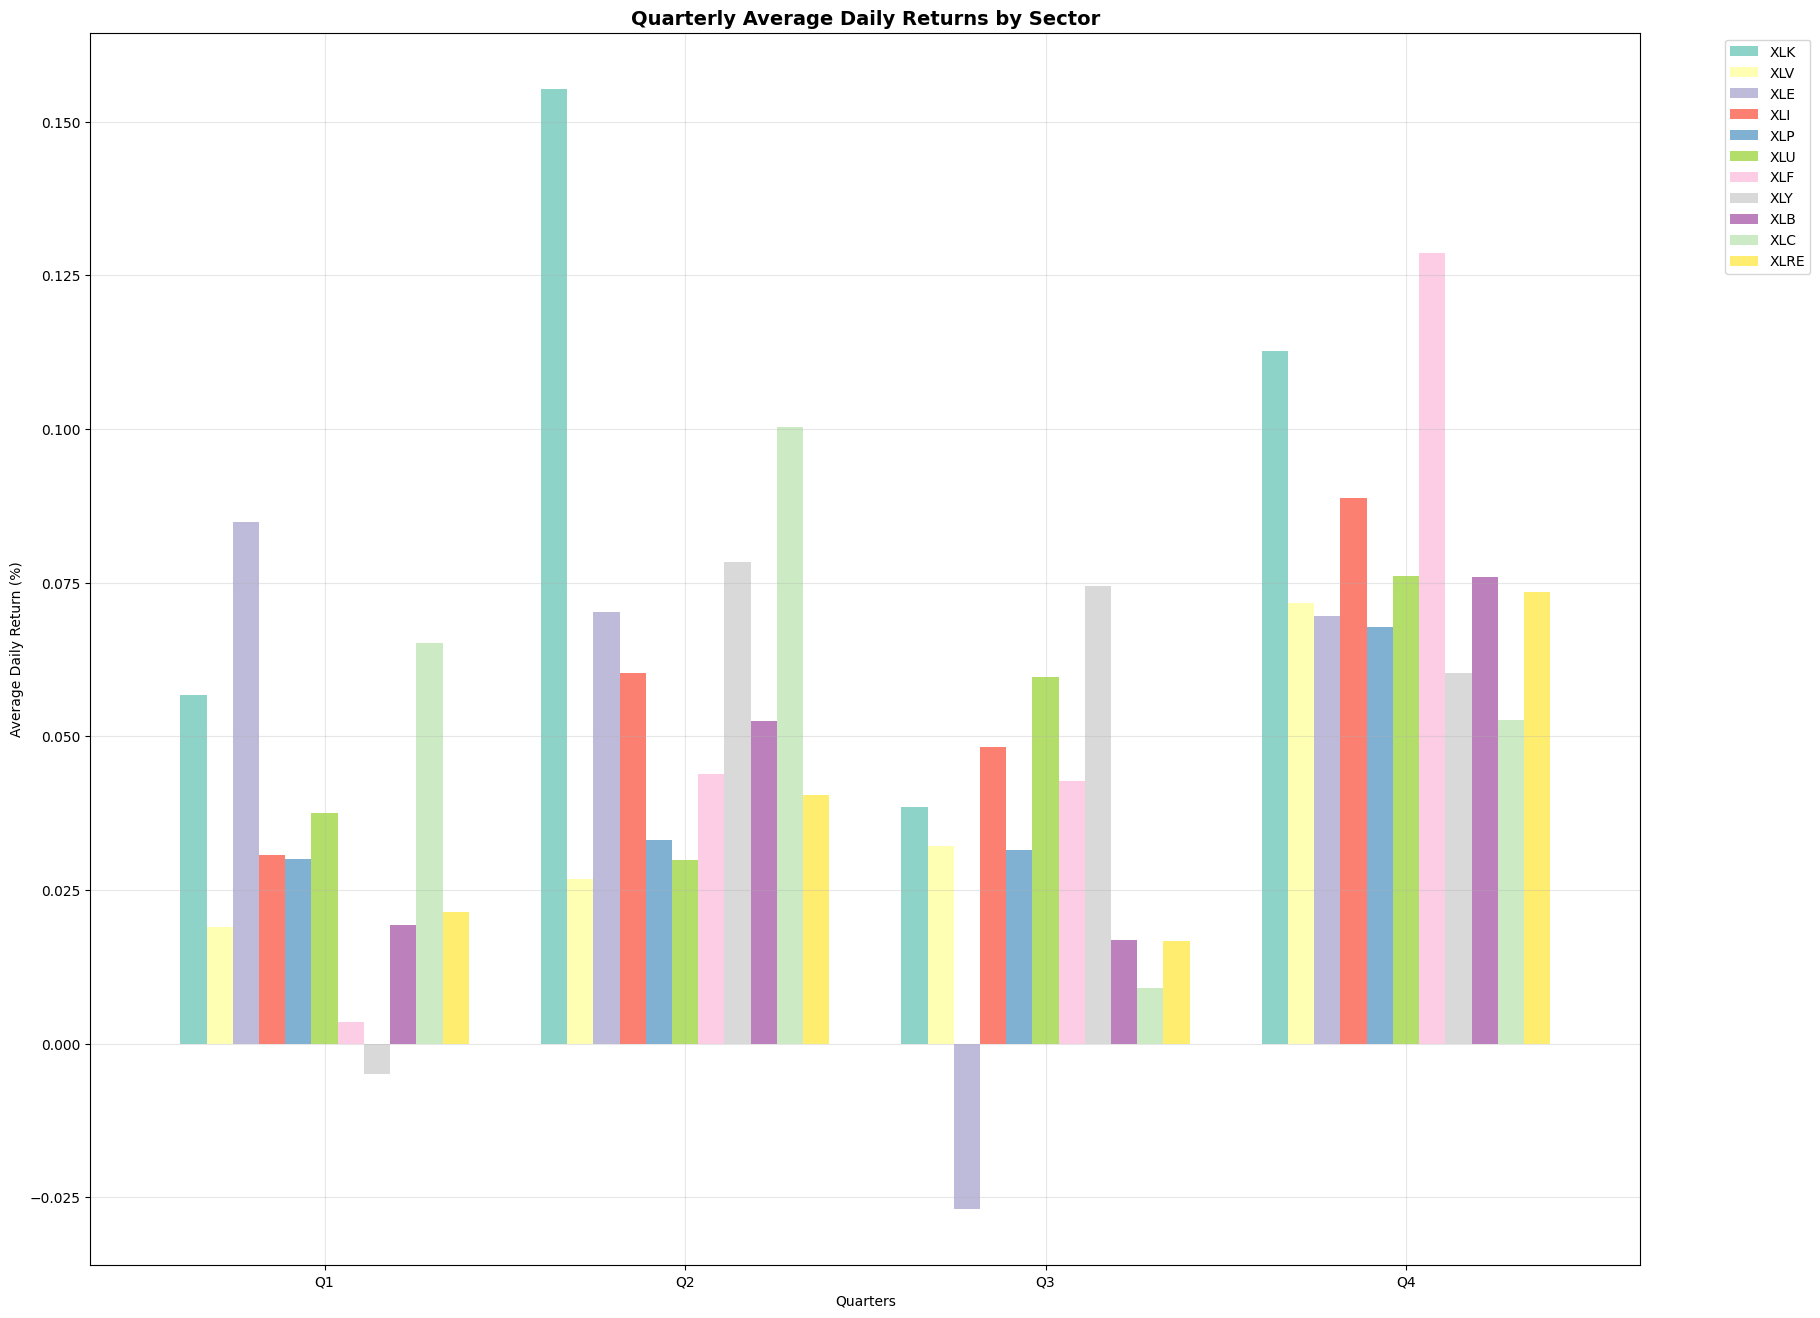

In [ ]:

# Calculate quarterly statistics
quarter_names = ['Q1', 'Q2', 'Q3', 'Q4']
quarterly_avg_data = []
quarterly_std_data = []

for quarter in range(1, 5):
    quarter_data = sector_returns_with_dates[sector_returns_with_dates['Quarter'] == quarter]
    quarter_returns = quarter_data[sectors]
    
    quarterly_avg = (quarter_returns.mean() * 100)
    quarterly_std = (quarter_returns.std() * 100)
    
    quarterly_avg_data.append(quarterly_avg)
    quarterly_std_data.append(quarterly_std)

quarterly_avg_df = pd.DataFrame(quarterly_avg_data, index=quarter_names, columns=sectors)
quarterly_std_df = pd.DataFrame(quarterly_std_data, index=quarter_names, columns=sectors)

# Create comprehensive visualization
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 16))

# 2. Quarterly Performance Bar Chart
quarterly_avg_df.plot(kind='bar', ax=ax2, width=0.8, colormap='Set3')
ax2.set_title('Quarterly Average Daily Returns by Sector', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Daily Return (%)')
ax2.set_xlabel('Quarters')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)


## Some sectors are more volatile than others, and that is risk and opportunity

Text(220.72222222222223, 0.5, 'Sector ETFs')

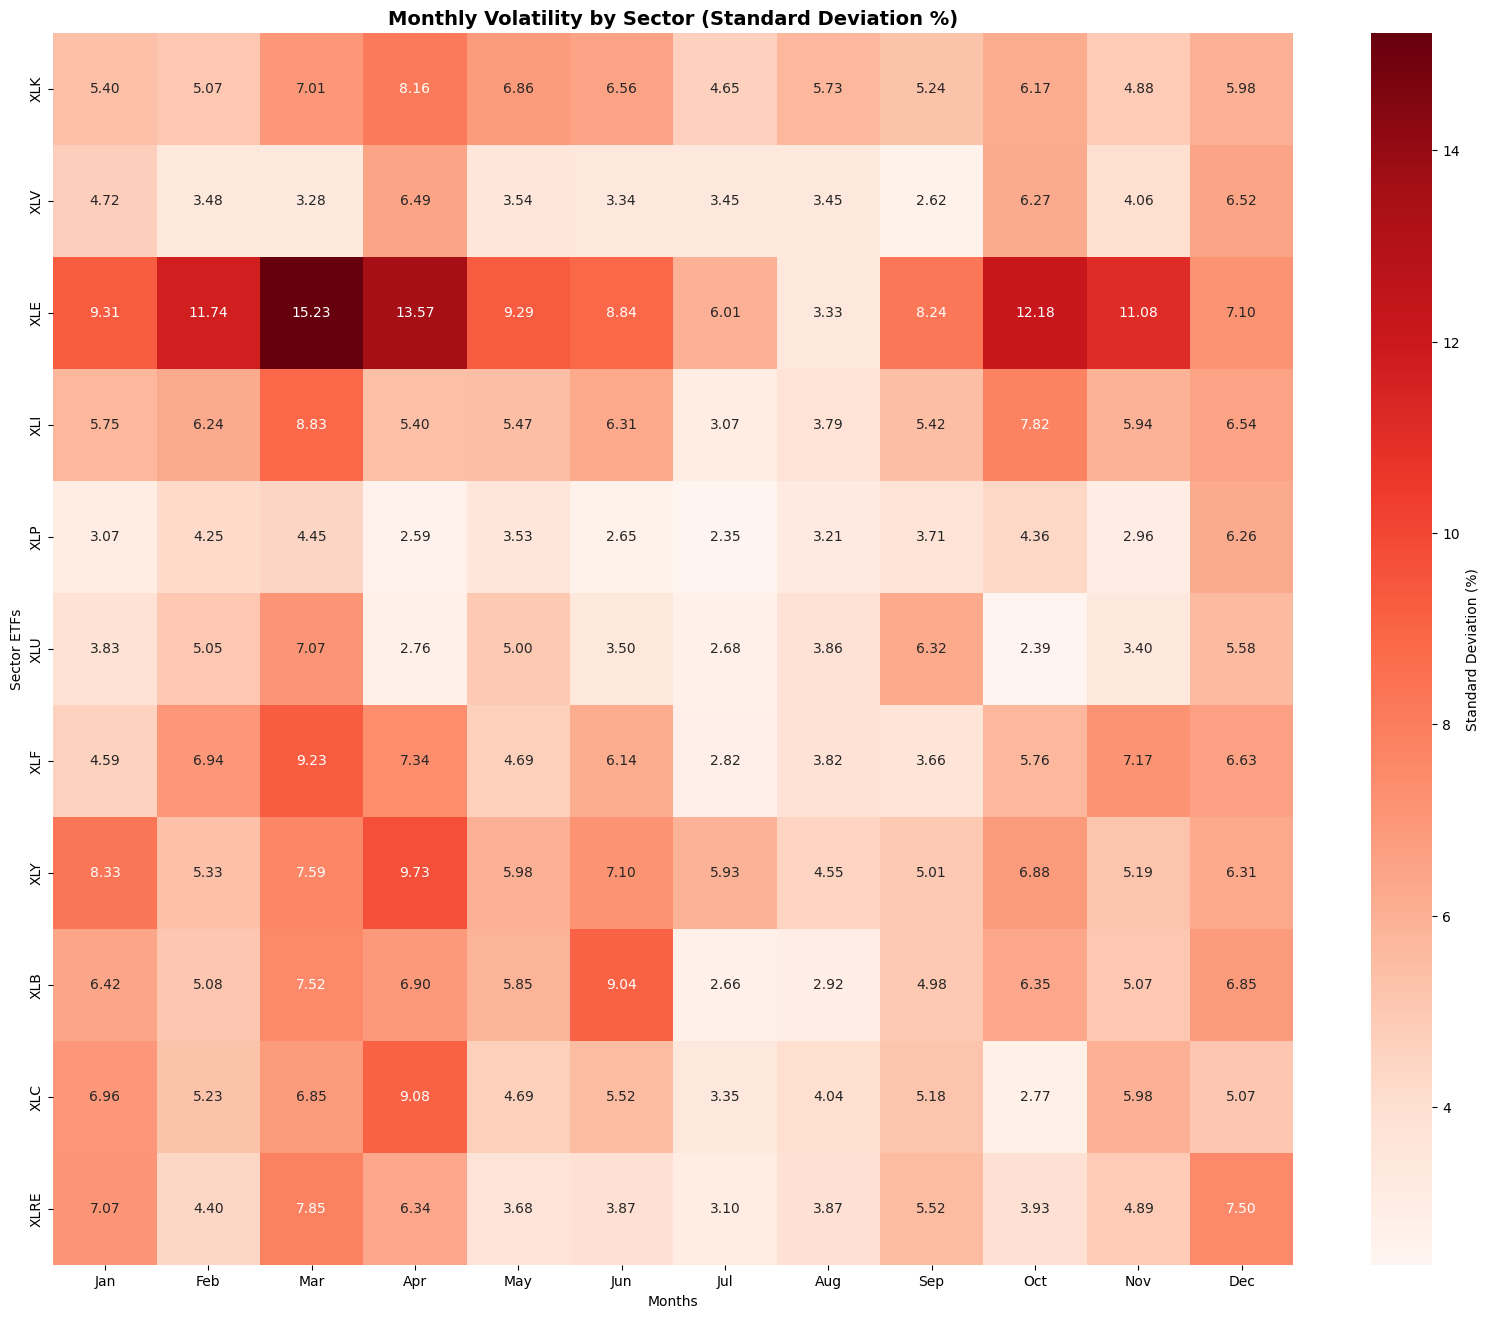

In [ ]:

# Create comprehensive visualization
fig, (ax3) = plt.subplots(1, 1, figsize=(20, 16))

# 3. Monthly Volatility (Standard Deviation) Heatmap
sns.heatmap(monthly_std_df.T,
            annot=True,
            fmt='.2f', 
            cmap='Reds',
            cbar_kws={'label': 'Standard Deviation (%)'},
            ax=ax3)
ax3.set_title('Monthly Volatility by Sector (Standard Deviation %)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Months')
ax3.set_ylabel('Sector ETFs')


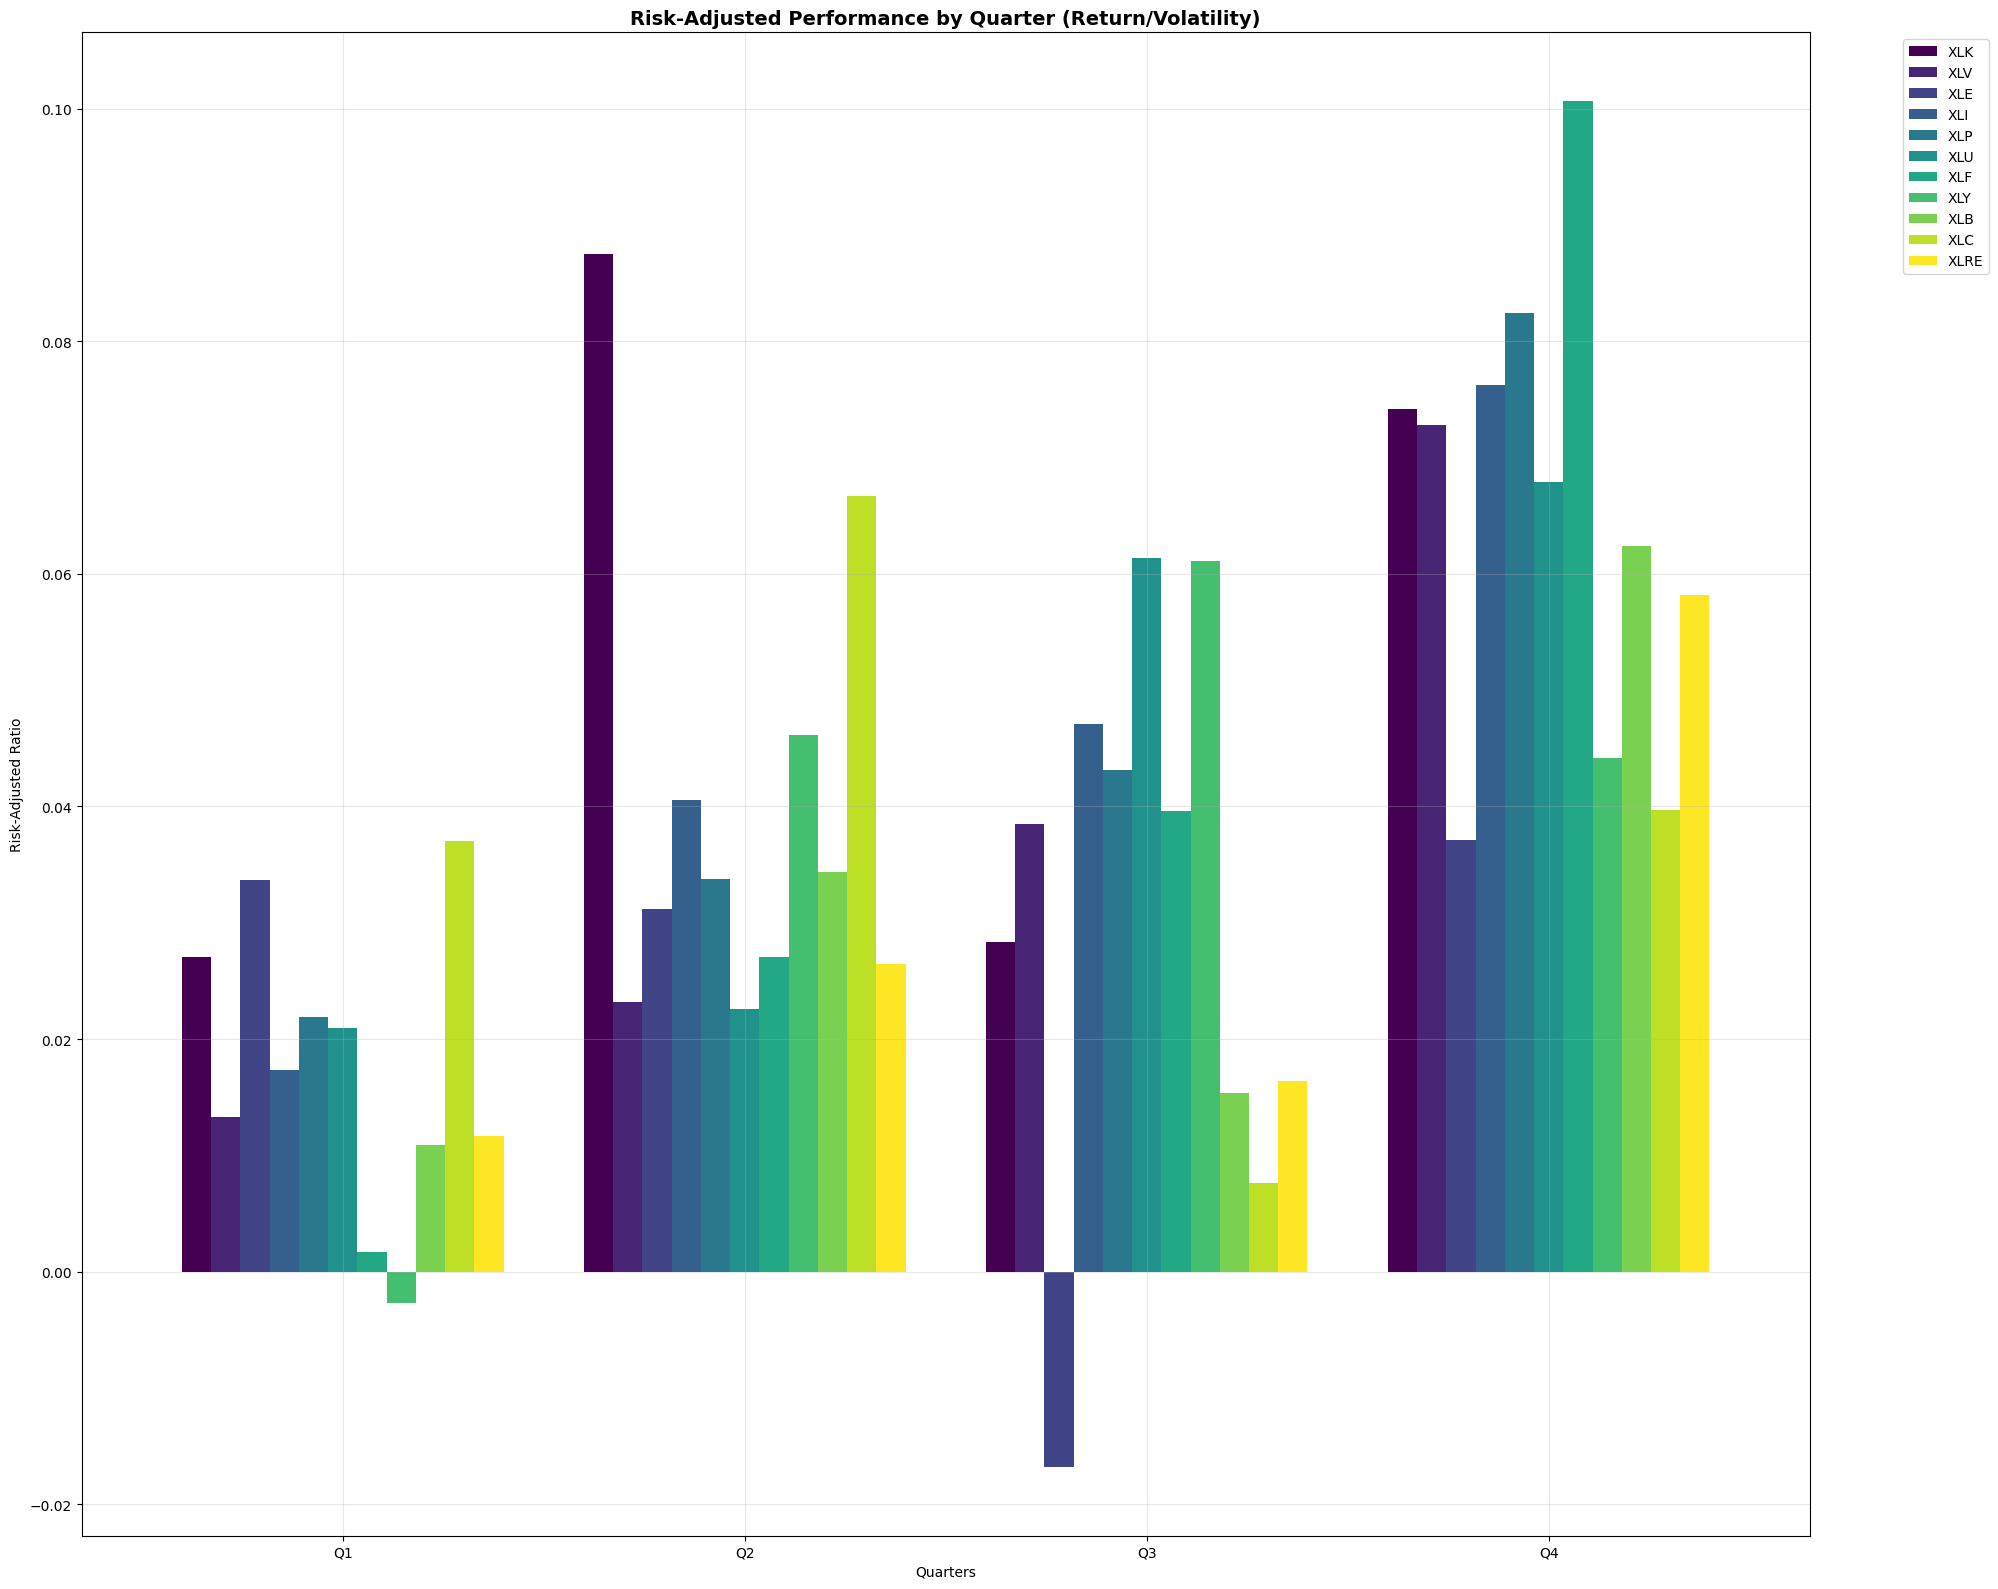

In [ ]:

# Create comprehensive visualization
fig, (ax4) = plt.subplots(1, 1, figsize=(20, 16))

# 4. Risk-Adjusted Performance (Return/Volatility) by Quarter
risk_adjusted_quarterly = quarterly_avg_df / quarterly_std_df
risk_adjusted_quarterly = risk_adjusted_quarterly.fillna(0)

risk_adjusted_quarterly.plot(kind='bar', ax=ax4, width=0.8, colormap='viridis')
ax4.set_title('Risk-Adjusted Performance by Quarter (Return/Volatility)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Risk-Adjusted Ratio')
ax4.set_xlabel('Quarters')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Seasonal Leadership Patterns

### Q1 — Tech Dominance:

- XLK leads with ~0.087 risk-adjusted ratio — January tech momentum effect
- Post-holiday capital rotation into growth sectors
- Strong risk-adjusted performance suggests consistent Q1 tech outperformance

### Q2 — Communication Services Surge:

- XLC dominates with ~0.065 — likely driven by advertising/social media earnings
- XLK remains strong — continued tech momentum through spring
- Q2 appears optimal for growth/tech sector overweighting

### Q3 — Materials & Industrials Leadership:

- XLB (Materials) leads at ~0.065 — commodity cycle effects
- XLF, XLI strong — economic activity/infrastructure themes
- Summer rotation from tech into cyclical value sectors

### Q4 — Consumer Discretionary Explosion:

- XLY dominates highest single-quarter performance — Holiday/Santa Rally
- Broad-based strength across most sectors
- Classic year-end risk-on environment

# Lets get Fundamental Data

In [3]:
import requests
import json
import os
import time
import pandas as pd
from datetime import datetime

def get_company_overview(symbol, api_key):
    """Get comprehensive company overview and key metrics"""
    url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    return response.json()

def get_income_statement(symbol, api_key):
    """Get annual and quarterly income statements"""
    url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    return response.json()

def get_balance_sheet(symbol, api_key):
    """Get annual and quarterly balance sheets"""
    url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    return response.json()

def get_cash_flow(symbol, api_key):
    """Get annual and quarterly cash flow statements"""
    url = f'https://www.alphavantage.co/query?function=CASH_FLOW&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    return response.json()

def get_earnings(symbol, api_key):
    """Get earnings data"""
    url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    return response.json()

def extract_comprehensive_fundamentals(symbol, api_key):
    """Extract all available fundamental data from Alpha Vantage"""
    
    print(f"Getting company overview...")
    overview = get_company_overview(symbol, api_key)
    time.sleep(12)  # Rate limiting
    
    print(f"Getting income statement...")
    income_statement = get_income_statement(symbol, api_key)
    time.sleep(12)
    
    print(f"Getting balance sheet...")
    balance_sheet = get_balance_sheet(symbol, api_key)
    time.sleep(12)
    
    print(f"Getting cash flow...")
    cash_flow = get_cash_flow(symbol, api_key)
    time.sleep(12)
    
    print(f"Getting earnings...")
    earnings = get_earnings(symbol, api_key)
    time.sleep(12)

    # Organize all data
    comprehensive_data = {
        'symbol': symbol,
        'extracted_date': datetime.now().isoformat(),
        'company_overview': overview,
        'income_statement': income_statement,
        'balance_sheet': balance_sheet,
        'cash_flow': cash_flow,
        'earnings': earnings
    }
    
    return comprehensive_data

def create_summary_metrics(overview_data):
    """Create a summary of key metrics for quick analysis"""
    
    try:
        summary = {
            'basic_info': {
                'symbol': overview_data.get('Symbol'),
                'name': overview_data.get('Name'),
                'sector': overview_data.get('Sector'),
                'industry': overview_data.get('Industry'),
                'country': overview_data.get('Country'),
                'currency': overview_data.get('Currency')
            },
            'market_data': {
                'market_cap': overview_data.get('MarketCapitalization'),
                'shares_outstanding': overview_data.get('SharesOutstanding'),
                '52_week_high': overview_data.get('52WeekHigh'),
                '52_week_low': overview_data.get('52WeekLow'),
                '50_day_ma': overview_data.get('50DayMovingAverage'),
                '200_day_ma': overview_data.get('200DayMovingAverage')
            },
            'valuation_ratios': {
                'pe_ratio': overview_data.get('PERatio'),
                'peg_ratio': overview_data.get('PEGRatio'),
                'price_to_book': overview_data.get('PriceToBookRatio'),
                'price_to_sales': overview_data.get('PriceToSalesRatioTTM'),
                'ev_revenue': overview_data.get('EVToRevenue'),
                'ev_ebitda': overview_data.get('EVToEBITDA')
            },
            'profitability_metrics': {
                'profit_margin': overview_data.get('ProfitMargin'),
                'operating_margin_ttm': overview_data.get('OperatingMarginTTM'),
                'return_on_assets_ttm': overview_data.get('ReturnOnAssetsTTM'),
                'return_on_equity_ttm': overview_data.get('ReturnOnEquityTTM'),
                'gross_profit_ttm': overview_data.get('GrossProfitTTM')
            },
            'financial_strength': {
                'revenue_ttm': overview_data.get('RevenueTTM'),
                'revenue_per_share_ttm': overview_data.get('RevenuePerShareTTM'),
                'quarterly_revenue_growth': overview_data.get('QuarterlyRevenueGrowthYOY'),
                'quarterly_earnings_growth': overview_data.get('QuarterlyEarningsGrowthYOY'),
                'book_value': overview_data.get('BookValue'),
                'diluted_eps_ttm': overview_data.get('DilutedEPSTTM')
            },
            'dividend_info': {
                'dividend_per_share': overview_data.get('DividendPerShare'),
                'dividend_yield': overview_data.get('DividendYield'),
                'dividend_date': overview_data.get('DividendDate'),
                'ex_dividend_date': overview_data.get('ExDividendDate')
            },
            'technical_indicators': {
                'beta': overview_data.get('Beta'),
                'analyst_target_price': overview_data.get('AnalystTargetPrice'),
                'trailing_pe': overview_data.get('TrailingPE'),
                'forward_pe': overview_data.get('ForwardPE')
            }
        }
        return summary
    except Exception as e:
        print(f"Error creating summary: {e}")
        return {}

# Set up API key and create directories
api_key = AV_API_KEY  # Make sure this is defined
os.makedirs('fundamentals', exist_ok=True)
os.makedirs('fundamentals/comprehensive', exist_ok=True)
os.makedirs('fundamentals/summaries', exist_ok=True)

# Extract comprehensive fundamentals for all tickers
successful_extractions = 0
failed_extractions = 0

for i, ticker in enumerate(tickers):
    print(f"\nProcessing {ticker} ({i+1}/{len(tickers)})...")
    
    try:
        # Get comprehensive data
        comprehensive_data = extract_comprehensive_fundamentals(ticker, api_key)
        
        # Save comprehensive data
        comprehensive_filename = f'fundamentals/comprehensive/{ticker}_comprehensive.json'
        with open(comprehensive_filename, 'w') as f:
            json.dump(comprehensive_data, f, indent=2, default=str)
        
        # Create and save summary
        if 'company_overview' in comprehensive_data:
            summary = create_summary_metrics(comprehensive_data['company_overview'])
            summary_filename = f'fundamentals/summaries/{ticker}_summary.json'
            with open(summary_filename, 'w') as f:
                json.dump(summary, f, indent=2, default=str)
            
            print(f"{ticker}: Comprehensive data and summary saved")
        else:
            print(f"{ticker}: Data extracted but no overview available")
        
        successful_extractions += 1
        
        # Rate limiting between tickers
        if i < len(tickers) - 1:  # Don't wait after the last ticker
            print(f"Waiting 30 seconds before next ticker...")
            time.sleep(30)
            
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        failed_extractions += 1
        
        # Wait even on failure to avoid rate limits
        if i < len(tickers) - 1:
            time.sleep(60)


# Create a master summary CSV for easy analysis
print(f"\nCreating master summary CSV...")
try:
    master_data = []
    
    for ticker in tickers:
        summary_file = f'fundamentals/summaries/{ticker}_summary.json'
        if os.path.exists(summary_file):
            with open(summary_file, 'r') as f:
                data = json.load(f)
                
                # Flatten the nested structure for CSV
                flat_data = {'symbol': ticker}
                for category, metrics in data.items():
                    if isinstance(metrics, dict):
                        for key, value in metrics.items():
                            flat_data[f"{category}_{key}"] = value
                    else:
                        flat_data[category] = metrics
                
                master_data.append(flat_data)
    
    # Create DataFrame and save as CSV
    if master_data:
        df = pd.DataFrame(master_data)
        df.to_csv('fundamentals/master_summary.csv', index=False)
        print(f"Master summary saved: fundamentals/master_summary.csv")
        print(f"Summary contains {len(df)} stocks with {len(df.columns)} metrics")
    else:
        print("No summary data available for CSV creation")
        
except Exception as e:
    print(f"Error creating master CSV: {e}")

NameError: name 'AV_API_KEY' is not defined

In [ ]:
import json
import os
import pandas as pd
from datetime import datetime

def safe_convert_to_float(value):
    """Safely convert string numbers to float, handling None and 'None' strings"""
    if value is None or value == 'None' or value == '':
        return None
    try:
        return float(value)
    except (ValueError, TypeError):
        return None

def extract_quarterly_from_comprehensive(ticker):
    """Extract quarterly data from existing comprehensive Alpha Vantage files"""
    
    # Load the comprehensive data file
    comprehensive_file = f'fundamentals/comprehensive/{ticker}_comprehensive.json'
    
    if not os.path.exists(comprehensive_file):
        return {}
    
    with open(comprehensive_file, 'r') as f:
        comprehensive_data = json.load(f)
    
    quarterly_data = {}
    
    # Extract quarterly reports from each financial statement
    income_quarters = comprehensive_data.get('income_statement', {}).get('quarterlyReports', [])
    balance_quarters = comprehensive_data.get('balance_sheet', {}).get('quarterlyReports', [])
    cashflow_quarters = comprehensive_data.get('cash_flow', {}).get('quarterlyReports', [])
    
    # Process up to 20 quarters (5 years) or all available
    max_quarters = min(20, len(income_quarters))
    
    for i in range(max_quarters):
        if i >= len(income_quarters):
            break
            
        # Get the fiscal date as the key
        fiscal_date = income_quarters[i].get('fiscalDateEnding', '')
        
        if fiscal_date:
            # Find matching balance sheet and cash flow data for the same date
            balance_quarter = None
            cashflow_quarter = None
            
            for bal in balance_quarters:
                if bal.get('fiscalDateEnding') == fiscal_date:
                    balance_quarter = bal
                    break
                    
            for cf in cashflow_quarters:
                if cf.get('fiscalDateEnding') == fiscal_date:
                    cashflow_quarter = cf
                    break
            
            # Extract key metrics from income statement
            income_stmt = income_quarters[i]
            
            quarterly_data[fiscal_date] = {
                'income_statement': {
                    'total_revenue': safe_convert_to_float(income_stmt.get('totalRevenue')),
                    'net_interest_income': safe_convert_to_float(income_stmt.get('interestIncome')),
                    'net_income': safe_convert_to_float(income_stmt.get('netIncome')),
                    'gross_profit': safe_convert_to_float(income_stmt.get('grossProfit')),
                    'operating_income': safe_convert_to_float(income_stmt.get('operatingIncome')),
                    'ebitda': safe_convert_to_float(income_stmt.get('ebitda')),
                    'research_development': safe_convert_to_float(income_stmt.get('researchAndDevelopment')),
                    'selling_general_admin': safe_convert_to_float(income_stmt.get('sellingGeneralAndAdministrative')),
                    'interest_expense': safe_convert_to_float(income_stmt.get('interestExpense')),
                    'income_before_tax': safe_convert_to_float(income_stmt.get('incomeBeforeTax'))
                },
                'balance_sheet': {
                    'total_assets': safe_convert_to_float(balance_quarter.get('totalAssets')) if balance_quarter else None,
                    'total_current_assets': safe_convert_to_float(balance_quarter.get('totalCurrentAssets')) if balance_quarter else None,
                    'total_debt': safe_convert_to_float(balance_quarter.get('shortLongTermDebtTotal')) if balance_quarter else None,
                    'short_term_debt': safe_convert_to_float(balance_quarter.get('currentDebt')) if balance_quarter else None,
                    'long_term_debt': safe_convert_to_float(balance_quarter.get('longTermDebt')) if balance_quarter else None,
                    'total_current_liabilities': safe_convert_to_float(balance_quarter.get('totalCurrentLiabilities')) if balance_quarter else None,
                    'stockholders_equity': safe_convert_to_float(balance_quarter.get('totalShareholderEquity')) if balance_quarter else None,
                    'retained_earnings': safe_convert_to_float(balance_quarter.get('retainedEarnings')) if balance_quarter else None,
                    'cash_and_equivalents': safe_convert_to_float(balance_quarter.get('cashAndCashEquivalentsAtCarryingValue')) if balance_quarter else None,
                    'inventory': safe_convert_to_float(balance_quarter.get('inventory')) if balance_quarter else None,
                    'accounts_receivable': safe_convert_to_float(balance_quarter.get('currentNetReceivables')) if balance_quarter else None
                },
                'cash_flow': {
                    'operating_cash_flow': safe_convert_to_float(cashflow_quarter.get('operatingCashflow')) if cashflow_quarter else None,
                    'capital_expenditure': safe_convert_to_float(cashflow_quarter.get('capitalExpenditures')) if cashflow_quarter else None,
                    'free_cash_flow': None,  # We'll calculate this
                    'financing_cash_flow': safe_convert_to_float(cashflow_quarter.get('cashflowFromFinancing')) if cashflow_quarter else None,
                    'investing_cash_flow': safe_convert_to_float(cashflow_quarter.get('cashflowFromInvestment')) if cashflow_quarter else None,
                    'dividends_paid': safe_convert_to_float(cashflow_quarter.get('dividendPayout')) if cashflow_quarter else None,
                    'change_in_cash': safe_convert_to_float(cashflow_quarter.get('changeInCashAndCashEquivalents')) if cashflow_quarter else None
                }
            }
            
            # Calculate Free Cash Flow = Operating Cash Flow - Capital Expenditures
            ocf = quarterly_data[fiscal_date]['cash_flow']['operating_cash_flow']
            capex = quarterly_data[fiscal_date]['cash_flow']['capital_expenditure']
            if ocf is not None and capex is not None:
                # Note: capex is usually negative, so we add it (subtract the absolute value)
                quarterly_data[fiscal_date]['cash_flow']['free_cash_flow'] = ocf + capex
    
    return quarterly_data

# Create quarterly_reports directory
os.makedirs('quarterly_reports', exist_ok=True)

# Find all available comprehensive files
comprehensive_files = [f for f in os.listdir('fundamentals/comprehensive/') if f.endswith('_comprehensive.json')]
available_tickers = [f.replace('_comprehensive.json', '') for f in comprehensive_files]

# Extract quarterly data for all available tickers
successful_extractions = 0
failed_extractions = 0

for i, ticker in enumerate(available_tickers):
    print(f"\nProcessing quarterly data for {ticker} ({i+1}/{len(available_tickers)})...")
    
    try:
        quarterly_data = extract_quarterly_from_comprehensive(ticker)
        
        if not quarterly_data:
            failed_extractions += 1
            continue
        
        # Save to file
        filename = f'quarterly_reports/{ticker}_quarterly_key_metrics.json'
        with open(filename, 'w') as f:
            json.dump(quarterly_data, f, indent=2, default=str)
        
        quarters_count = len(quarterly_data)
        print(f"{quarters_count} quarters of data saved to {filename}")
        
        # Show summary for first few quarters
        count = 0
        for quarter, data in quarterly_data.items():
            if count < 2:  # Show only first 2 quarters to avoid clutter
                print(f"{quarter}:")
                revenue = data['income_statement']['total_revenue']
                net_income = data['income_statement']['net_income']
                ocf = data['cash_flow']['operating_cash_flow']
            count += 1
        
        successful_extractions += 1
        
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        failed_extractions += 1

# Create summary CSV for quick analysis
print(f"\n📋 Creating quarterly summary CSV...")
try:
    all_quarterly_data = []
    
    for ticker in available_tickers:
        quarterly_file = f'quarterly_reports/{ticker}_quarterly_key_metrics.json'
        if os.path.exists(quarterly_file):
            with open(quarterly_file, 'r') as f:
                data = json.load(f)
                
                for quarter, metrics in data.items():
                    row = {
                        'symbol': ticker,
                        'quarter': quarter,
                        # Income Statement
                        'total_revenue': metrics['income_statement']['total_revenue'],
                        'net_income': metrics['income_statement']['net_income'],
                        'gross_profit': metrics['income_statement']['gross_profit'],
                        'operating_income': metrics['income_statement']['operating_income'],
                        'ebitda': metrics['income_statement']['ebitda'],
                        'research_development': metrics['income_statement']['research_development'],
                        'interest_expense': metrics['income_statement']['interest_expense'],
                        # Balance Sheet
                        'total_assets': metrics['balance_sheet']['total_assets'],
                        'stockholders_equity': metrics['balance_sheet']['stockholders_equity'],
                        'total_debt': metrics['balance_sheet']['total_debt'],
                        'cash_and_equivalents': metrics['balance_sheet']['cash_and_equivalents'],
                        'inventory': metrics['balance_sheet']['inventory'],
                        'accounts_receivable': metrics['balance_sheet']['accounts_receivable'],
                        # Cash Flow
                        'operating_cash_flow': metrics['cash_flow']['operating_cash_flow'],
                        'free_cash_flow': metrics['cash_flow']['free_cash_flow'],
                        'capital_expenditure': metrics['cash_flow']['capital_expenditure'],
                        'change_in_cash': metrics['cash_flow']['change_in_cash']
                    }
                    all_quarterly_data.append(row)
    
    if all_quarterly_data:
        df = pd.DataFrame(all_quarterly_data)
        df = df.sort_values(['symbol', 'quarter'], ascending=[True, False])
        df.to_csv('quarterly_reports/quarterly_summary.csv', index=False)
        
    else:
        print("⚠️ No quarterly data available for CSV creation")
        
except Exception as e:
    print(f"❌ Error creating quarterly CSV: {e}")


🚀 Extracting quarterly data from existing comprehensive files...
📂 Reading from 'fundamentals/comprehensive/' folder
📋 Processing quarterly data for all available tickers
📊 Found 63 comprehensive files

📈 Processing quarterly data for AAPL (1/63)...
✅ 20 quarters of data saved to quarterly_reports/AAPL_quarterly_key_metrics.json
  📅 2025-06-30:
    💰 Revenue: $94,036,000,000
    📊 Net Income: $23,434,000,000
    💸 Operating Cash Flow: $27,867,000,000
  📅 2025-03-31:
    💰 Revenue: $95,359,000,000
    📊 Net Income: $24,780,000,000
    💸 Operating Cash Flow: $23,952,000,000

📈 Processing quarterly data for ACMR (2/63)...
✅ 20 quarters of data saved to quarterly_reports/ACMR_quarterly_key_metrics.json
  📅 2025-03-31:
    💰 Revenue: $172,347,000
    📊 Net Income: $20,380,000
    💸 Operating Cash Flow: $5,282,000
  📅 2024-12-31:
    💰 Revenue: $223,471,000
    📊 Net Income: $31,080,000
    💸 Operating Cash Flow: $88,595,000

📈 Processing quarterly data for AFRM (3/63)...
✅ 20 quarters of da

In [ ]:
import requests
import json
import pandas as pd
import time
import os

def get_earnings_surprise_alphavantage(symbol, api_key):
    """
    Get earnings surprise data from Alpha Vantage EARNINGS endpoint
    """
    url = "https://www.alphavantage.co/query"
    params = {
        'function': 'EARNINGS',
        'symbol': symbol,
        'apikey': api_key
    }
    
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        # Check for API errors
        if 'Error Message' in data:
            return None
            
        if 'Note' in data:
            return None
        
        # Extract quarterly earnings
        quarterly_earnings = data.get('quarterlyEarnings', [])
        
        if quarterly_earnings and len(quarterly_earnings) > 0:
            # Get most recent quarter
            latest = quarterly_earnings[0]
            
            return {
                'fiscal_date_ending': latest.get('fiscalDateEnding', 'N/A'),
                'reported_date': latest.get('reportedDate', 'N/A'),
                'reported_eps': float(latest.get('reportedEPS', 0)) if latest.get('reportedEPS') != 'None' else None,
                'estimated_eps': float(latest.get('estimatedEPS', 0)) if latest.get('estimatedEPS') != 'None' else None,
                'surprise': float(latest.get('surprise', 0)) if latest.get('surprise') != 'None' else None,
                'surprise_percentage': float(latest.get('surprisePercentage', 0)) if latest.get('surprisePercentage') != 'None' else None
            }
        else:
            return None
            
    except Exception as e:
        return None

def fetch_all_earnings_surprises(tickers, api_key, delay=12):
    
    earnings_data = {}
    successful = 0
    failed = 0
    
    # Create earnings directory
    os.makedirs("earnings_data", exist_ok=True)
    
    for i, ticker in enumerate(tickers):
        earnings_info = get_earnings_surprise_alphavantage(ticker, api_key)
        
        if earnings_info:
            earnings_data[ticker] = earnings_info
            successful += 1
            
            # Save individual file
            with open(f"earnings_data/{ticker}_earnings.json", 'w') as f:
                json.dump(earnings_info, f, indent=2)
                
        else:
            failed += 1
    
    
    # Save combined file
    if earnings_data:
        with open("earnings_data/all_earnings_surprises.json", 'w') as f:
            json.dump(earnings_data, f, indent=2)
    
    return earnings_data

def create_earnings_surprise_csv(earnings_data):
    """Convert earnings data to CSV format"""
    
    rows = []
    for ticker, data in earnings_data.items():
        row = {
            'Ticker': ticker,
            'fiscal_date_ending': data.get('fiscal_date_ending'),
            'earnings_report_date': data.get('reported_date'),
            'reported_eps': data.get('reported_eps'),
            'estimated_eps': data.get('estimated_eps'),
            'earnings_surprise': data.get('surprise'),
            'earnings_surprise_percent': data.get('surprise_percentage')
        }
        rows.append(row)
    
    df = pd.DataFrame(rows)
    
    # Save to CSV
    output_file = "earnings_data/earnings_surprises.csv"
    df.to_csv(output_file, index=False)
    
    # Show summary
    if 'earnings_surprise_percent' in df.columns:
        surprise_data = df[df['earnings_surprise_percent'].notna()]
        if len(surprise_data) > 0:
            avg_surprise = surprise_data['earnings_surprise_percent'].mean()
            positive = (surprise_data['earnings_surprise_percent'] > 0).sum()
            negative = (surprise_data['earnings_surprise_percent'] < 0).sum()
            
            print(f"   Average surprise: {avg_surprise:.1f}%")
            print(f"   Positive surprises: {positive} ({positive/len(surprise_data)*100:.1f}%)")
            print(f"   Negative surprises: {negative} ({negative/len(surprise_data)*100:.1f}%)")
    
    return df

# Example usage
if __name__ == "__main__":
    # Your Alpha Vantage API key
    API_KEY = AV_API_KEY  # Replace with your actual key
    
    # Fetch earnings surprise data
    earnings_data = fetch_all_earnings_surprises(tickers, API_KEY)
    
    # Create CSV
    if earnings_data:
        earnings_df = create_earnings_surprise_csv(earnings_data)


# Function to integrate with your existing script
def load_existing_earnings_data():
    """Load previously saved earnings data"""
    earnings_file = "earnings_data/all_earnings_surprises.json"
    if os.path.exists(earnings_file):
        with open(earnings_file, 'r') as f:
            return json.load(f)
    return {}

def add_earnings_surprise_to_fundamentals(fundamentals_df):
    """Add earnings surprise data to your existing fundamentals dataset"""
    
    # Load earnings data
    earnings_data = load_existing_earnings_data()
    
    if not earnings_data:
        return fundamentals_df
    
    # Add earnings columns
    for idx, row in fundamentals_df.iterrows():
        ticker = row['Ticker']
        if ticker in earnings_data:
            earnings_info = earnings_data[ticker]
            fundamentals_df.at[idx, 'last_quarter_report_date'] = earnings_info.get('reported_date', 'N/A')
            fundamentals_df.at[idx, 'earnings_surprise'] = earnings_info.get('surprise')
            fundamentals_df.at[idx, 'earnings_surprise_percent'] = earnings_info.get('surprise_percentage')
            fundamentals_df.at[idx, 'reported_eps'] = earnings_info.get('reported_eps')
            fundamentals_df.at[idx, 'estimated_eps'] = earnings_info.get('estimated_eps')
    
    print(f"✅ Added earnings surprise data to {len(fundamentals_df)} stocks")
    return fundamentals_df

🚀 Fetching earnings surprise data for 63 stocks
⏱️ Using 12 second delay between requests
📊 Processing AAPL (1/63)
✅ AAPL: EPS 1.57 vs 1.41 (Surprise: 11.3475%)
📊 Processing GOOGL (2/63)
✅ GOOGL: EPS 2.31 vs 2.17 (Surprise: 6.4516%)
📊 Processing MSFT (3/63)
✅ MSFT: EPS 3.65 vs 3.37 (Surprise: 8.3086%)
📊 Processing TSLA (4/63)
✅ TSLA: EPS 0.4 vs 0.441 (Surprise: -9.2971%)
📊 Processing AMZN (5/63)
✅ AMZN: EPS 1.68 vs 1.32 (Surprise: 27.2727%)
📊 Processing C (6/63)
✅ C: EPS 1.96 vs 1.61 (Surprise: 21.7391%)
📊 Processing JPM (7/63)
✅ JPM: EPS 4.96 vs 4.48 (Surprise: 10.7143%)
📊 Processing NVDA (8/63)
✅ NVDA: EPS 0.96 vs 0.93 (Surprise: 3.2258%)
📊 Processing META (9/63)
✅ META: EPS 7.14 vs 5.89 (Surprise: 21.2224%)
📊 Processing BRK-B (10/63)
✅ BRK-B: EPS 4.4689 vs 4.7223 (Surprise: -5.366%)
📊 Processing XOM (11/63)
✅ XOM: EPS 1.64 vs 1.55 (Surprise: 5.8065%)
📊 Processing WMT (12/63)
✅ WMT: EPS 0.61 vs 0.58 (Surprise: 5.1724%)
📊 Processing FRFHF (13/63)
⚠️ No earnings data found for FRFHF
❌ 

In [ ]:
import pandas as pd
import numpy as np
import json
import os

def safe_float(value):
    """Safely convert to float, handling None, 'None', and invalid values"""
    if value is None or value == 'None' or value == '' or value == 'N/A':
        return np.nan
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

def extract_basic_fundamentals(ticker):
    """Extract specified fundamental metrics"""
    
    ticker = ticker.upper()
    result = {'Ticker': ticker}
    
    try:
        # Load Alpha Vantage summary data
        summary_file = f"fundamentals/summaries/{ticker}_summary.json"
        if os.path.exists(summary_file):
            with open(summary_file, 'r') as f:
                summary_data = json.load(f)
        else:
            print(f"No summary file for {ticker}")
            return None
        
        # Extract Current Price
        try:
            stock_file = f"ticker_data/{ticker}_stock_data.csv"
            if os.path.exists(stock_file):
                stock_data = pd.read_csv(stock_file, index_col=0, parse_dates=True)
                current_price = stock_data['5. adjusted close'].iloc[-1]  # Most recent price
                result['Current Price'] = current_price
            else:
                result['Current Price'] = np.nan
        except:
            result['Current Price'] = np.nan
        
        # Extract Technical Indicators
        technical = summary_data.get('technical_indicators', {})
        result['Forward PE'] = safe_float(technical.get('forward_pe'))
        result['analyst target price'] = safe_float(technical.get('analyst_target_price'))
        result['beta'] = safe_float(technical.get('beta'))
        
        # Calculate analyst sentiment based on upside
        current_price = result['Current Price']
        target_price = result['analyst target price']
        if pd.notna(current_price) and pd.notna(target_price) and current_price > 0:
            upside = ((target_price - current_price) / current_price) * 100
            if upside >= 20:
                result['analyst sentiment'] = "Strong Buy"
            elif upside >= 10:
                result['analyst sentiment'] = "Buy"
            elif upside >= -5:
                result['analyst sentiment'] = "Hold"
            elif upside >= -15:
                result['analyst sentiment'] = "Weak"
            else:
                result['analyst sentiment'] = "Overvalued"
        else:
            result['analyst sentiment'] = "No Target"
        
        # Extract Financial Strength/Growth Metrics
        financial_strength = summary_data.get('financial_strength', {})
        result['quarterly_earnings_growth'] = safe_float(financial_strength.get('quarterly_earnings_growth'))
        result['quarterly_revenue_growth'] = safe_float(financial_strength.get('quarterly_revenue_growth'))
        result['revenue_per_share_ttm'] = safe_float(financial_strength.get('revenue_per_share_ttm'))
        
        # Extract Last Quarter Results
        quarterly_file = f"quarterly_reports/{ticker}_quarterly_key_metrics.json"
        earnings_file = f"earnings_data/{ticker}_earnings.json"
        
        # Load earnings surprise data first
        earnings_data = None
        if os.path.exists(earnings_file):
            try:
                with open(earnings_file, 'r') as f:
                    earnings_data = json.load(f)
                
                # Extract earnings surprise information
                result['last_quarter_report_date'] = earnings_data.get('reported_date', 'N/A')
                result['fiscal_date_ending'] = earnings_data.get('fiscal_date_ending', 'N/A')
                result['reported_eps'] = safe_float(earnings_data.get('reported_eps'))
                result['estimated_eps'] = safe_float(earnings_data.get('estimated_eps'))
                result['earnings_surprise'] = safe_float(earnings_data.get('surprise'))
                result['earnings_surprise_percent'] = safe_float(earnings_data.get('surprise_percentage'))
                
            except Exception as e:
                print(f"⚠️ Error loading earnings data for {ticker}: {e}")
                result['last_quarter_report_date'] = 'N/A'
                result['fiscal_date_ending'] = 'N/A'
                result['reported_eps'] = np.nan
                result['estimated_eps'] = np.nan
                result['earnings_surprise'] = np.nan
                result['earnings_surprise_percent'] = np.nan
        else:
            # No earnings file available
            result['last_quarter_report_date'] = 'N/A'
            result['fiscal_date_ending'] = 'N/A'
            result['reported_eps'] = np.nan
            result['estimated_eps'] = np.nan
            result['earnings_surprise'] = np.nan
            result['earnings_surprise_percent'] = np.nan
        
        # Load quarterly financial data
        if os.path.exists(quarterly_file):
            try:
                with open(quarterly_file, 'r') as f:
                    quarterly_data = json.load(f)
                
                quarters = sorted(quarterly_data.keys(), reverse=True)  # Most recent first
                
                if len(quarters) >= 1:
                    # Get most recent quarter
                    latest_quarter = quarterly_data[quarters[0]]
                    result['last_quarter'] = quarters[0]
                    
                    # Extract key metrics from last quarter
                    income_statement = latest_quarter.get('income_statement', {})
                    result['last_quarter_revenue'] = safe_float(income_statement.get('total_revenue'))
                    result['last_quarter_net_income'] = safe_float(income_statement.get('net_income'))
                    result['last_quarter_gross_profit'] = safe_float(income_statement.get('gross_profit'))
                    result['last_quarter_operating_income'] = safe_float(income_statement.get('operating_income'))
                    
                    # Calculate margins for last quarter
                    if result['last_quarter_revenue'] and result['last_quarter_revenue'] > 0:
                        if result['last_quarter_net_income']:
                            result['last_quarter_net_margin'] = (result['last_quarter_net_income'] / result['last_quarter_revenue']) * 100
                        else:
                            result['last_quarter_net_margin'] = np.nan
                            
                        if result['last_quarter_gross_profit']:
                            result['last_quarter_gross_margin'] = (result['last_quarter_gross_profit'] / result['last_quarter_revenue']) * 100
                        else:
                            result['last_quarter_gross_margin'] = np.nan
                    else:
                        result['last_quarter_net_margin'] = np.nan
                        result['last_quarter_gross_margin'] = np.nan
                    
                    # Balance sheet data if available
                    balance_sheet = latest_quarter.get('balance_sheet', {})
                    result['last_quarter_total_assets'] = safe_float(balance_sheet.get('total_assets'))
                    result['last_quarter_total_debt'] = safe_float(balance_sheet.get('total_debt'))
                    result['last_quarter_cash'] = safe_float(balance_sheet.get('cash_and_cash_equivalents'))
                    
                else:
                    # No quarterly financial data available
                    result['last_quarter'] = "No Data"
                    result['last_quarter_revenue'] = np.nan
                    result['last_quarter_net_income'] = np.nan
                    result['last_quarter_gross_profit'] = np.nan
                    result['last_quarter_operating_income'] = np.nan
                    result['last_quarter_net_margin'] = np.nan
                    result['last_quarter_gross_margin'] = np.nan
                    result['last_quarter_total_assets'] = np.nan
                    result['last_quarter_total_debt'] = np.nan
                    result['last_quarter_cash'] = np.nan
                    
            except Exception as e:
                print(f"Error processing quarterly data for {ticker}: {e}")
                result['last_quarter'] = "Error"
                result['last_quarter_revenue'] = np.nan
                result['last_quarter_net_income'] = np.nan
                result['last_quarter_gross_profit'] = np.nan
                result['last_quarter_operating_income'] = np.nan
                result['last_quarter_net_margin'] = np.nan
                result['last_quarter_gross_margin'] = np.nan
                result['last_quarter_total_assets'] = np.nan
                result['last_quarter_total_debt'] = np.nan
                result['last_quarter_cash'] = np.nan
        else:
            # No quarterly file available
            result['last_quarter'] = "No File"
            result['last_quarter_revenue'] = np.nan
            result['last_quarter_net_income'] = np.nan
            result['last_quarter_gross_profit'] = np.nan
            result['last_quarter_operating_income'] = np.nan
            result['last_quarter_net_margin'] = np.nan
            result['last_quarter_gross_margin'] = np.nan
            result['last_quarter_total_assets'] = np.nan
            result['last_quarter_total_debt'] = np.nan
            result['last_quarter_cash'] = np.nan
        
        # Extract Market Data
        market_data = summary_data.get('market_data', {})
        result['market_cap'] = safe_float(market_data.get('market_cap'))
        result['shares_outstanding'] = safe_float(market_data.get('shares_outstanding'))
        
        # Extract Company Info
        basic_info = summary_data.get('basic_info', {})
        result['sector'] = basic_info.get('sector', 'Unknown')
        
        return result
        
    except Exception as e:
        print(f"Error extracting data for {ticker}: {e}")
        return None

def create_simplified_dataset():
    """Create a dataset with specified fundamental metrics"""
    
    print("Extracting Selected Fundamental Metrics")
    print("="*60)
    
    # Find all available summary files
    summary_dir = "fundamentals/summaries/"
    if not os.path.exists(summary_dir):
        print(f"Directory {summary_dir} not found!")
        return None
    
    summary_files = [f for f in os.listdir(summary_dir) if f.endswith('_summary.json')]
    tickers = [f.replace('_summary.json', '') for f in summary_files]
    
    print(f"Found {len(tickers)} stocks with summary data")
    
    # Extract data for all stocks
    all_data = []
    successful = 0
    failed = 0
    
    for ticker in tickers:
        data = extract_basic_fundamentals(ticker)
        if data:
            all_data.append(data)
            successful += 1
        else:
            failed += 1
    
    print(f"Successfully processed: {successful}")
    print(f"Failed: {failed}")
    
    if not all_data:
        print("No data extracted!")
        return None
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    
    # Display detailed summary
    print(f"\nDataset Summary:")
    print(f"Total stocks: {len(df)}")
    
    # Check data availability for each column
    key_columns = [
        'Current Price', 'Forward PE', 'analyst target price', 'analyst sentiment',
        'quarterly_earnings_growth', 'quarterly_revenue_growth', 'revenue_per_share_ttm',
        'market_cap', 'shares_outstanding', 'beta', 'sector',
        'last_quarter', 'last_quarter_report_date', 'fiscal_date_ending',
        'reported_eps', 'estimated_eps', 'earnings_surprise', 'earnings_surprise_percent',
        'last_quarter_revenue', 'last_quarter_net_income', 
        'last_quarter_gross_profit', 'last_quarter_operating_income',
        'last_quarter_net_margin', 'last_quarter_gross_margin',
        'last_quarter_total_assets', 'last_quarter_total_debt', 'last_quarter_cash'
    ]
    
    print(f"\nData Availability by Column:")
    for col in key_columns:
        if col in df.columns:
            available = df[col].notna().sum()
            percentage = (available / len(df)) * 100
            print(f"   {col}: {available}/{len(df)} ({percentage:.1f}%)")
    
    # Show analyst sentiment distribution
    if 'analyst sentiment' in df.columns:
        print(f"\nAnalyst Sentiment Distribution:")
        sentiment_counts = df['analyst sentiment'].value_counts()
        for sentiment, count in sentiment_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sentiment}: {count} stocks ({percentage:.1f}%)")
    
    # Show sector distribution
    if 'sector' in df.columns:
        print(f"\nTop Sectors:")
        sector_counts = df['sector'].value_counts().head(10)
        for sector, count in sector_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sector}: {count} stocks ({percentage:.1f}%)")
    
    # Show last quarter data availability
    if 'last_quarter' in df.columns:
        print(f"\nLast Quarter Data Availability:")
        quarter_status = df['last_quarter'].value_counts()
        for status, count in quarter_status.items():
            percentage = (count / len(df)) * 100
            print(f"   {status}: {count} stocks ({percentage:.1f}%)")
        
        # Show recent quarterly performance for stocks with data
        quarterly_data_available = df[df['last_quarter_revenue'].notna()]
        if len(quarterly_data_available) > 0:
            print(f"\nLast Quarter Performance Summary ({len(quarterly_data_available)} stocks):")
            if 'last_quarter_revenue' in quarterly_data_available.columns:
                avg_revenue = quarterly_data_available['last_quarter_revenue'].mean()
                print(f"   Average Revenue: ${avg_revenue/1e9:.2f}B")
            if 'last_quarter_net_margin' in quarterly_data_available.columns:
                avg_margin = quarterly_data_available['last_quarter_net_margin'].mean()
                print(f"   Average Net Margin: {avg_margin:.1f}%")
        
        # Show earnings surprise data (now available from earnings_data folder)
        if 'earnings_surprise_percent' in df.columns:
            surprise_data = df[df['earnings_surprise_percent'].notna()]
            if len(surprise_data) > 0:
                print(f"\nEarnings Surprise Analysis ({len(surprise_data)} stocks):")
                avg_surprise = surprise_data['earnings_surprise_percent'].mean()
                positive_surprises = (surprise_data['earnings_surprise_percent'] > 0).sum()
                negative_surprises = (surprise_data['earnings_surprise_percent'] < 0).sum()
                big_positive = (surprise_data['earnings_surprise_percent'] > 10).sum()
                big_negative = (surprise_data['earnings_surprise_percent'] < -10).sum()
            else:
                print(f"\nEarnings Surprise Data: No surprise data found")
        
        # Show earnings report dates
        if 'last_quarter_report_date' in df.columns:
            report_dates = df[df['last_quarter_report_date'] != 'N/A']
            print(f"\n📅 Earnings Report Dates Available: {len(report_dates)} stocks")
    
    return df

# Execute the extraction
if __name__ == "__main__":
    # Create the dataset
    df = create_simplified_dataset()
    
    if df is not None:
        # Ensure fundamentals directory exists
        os.makedirs("fundamentals", exist_ok=True)
        
        # Remove rows with any missing values
        df_clean = df.dropna()
        
        # Debug: Show which columns have the most missing data
        if len(df_clean) == 0:
            print(f"\n🔍 Debugging - Missing data by column:")
            missing_data = df.isnull().sum().sort_values(ascending=False)
            for col, missing_count in missing_data.items():
                if missing_count > 0:
                    percentage = (missing_count / len(df)) * 100
                    print(f"   {col}: {missing_count}/{len(df)} missing ({percentage:.1f}%)")
        
        # Always save the original data (before cleaning) for reference
        output_file_original = "fundamentals/selected_fundamentals_all.csv"
        df.to_csv(output_file_original, index=False)
        print(f"\nOriginal dataset (with missing values) saved to: {output_file_original}")
        
        if len(df_clean) == 0:
            print("No stocks have complete data for all columns!")
        else:
            # Save the cleaned dataset
            output_file = "fundamentals/selected_fundamentals_clean.csv"
            df_clean.to_csv(output_file, index=False)
            print(f"\nClean dataset saved to: {output_file}")
            
            # Display first few rows
            print(f"\nSample Data (first 5 rows):")
            pd.set_option('display.max_columns', None)
            pd.set_option('display.width', None)
            print(df_clean.head())
            
            # Show summary statistics for numeric columns
            numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 1:
                print(f"\nSummary Statistics (Clean Data):")
                print(df_clean[numeric_cols].describe().round(2))
            
            # Show analyst sentiment distribution for clean data
            if 'analyst sentiment' in df_clean.columns:
                print(f"\nAnalyst Sentiment Distribution (Clean Data):")
                sentiment_counts = df_clean['analyst sentiment'].value_counts()
                for sentiment, count in sentiment_counts.items():
                    percentage = (count / len(df_clean)) * 100
                    print(f"   {sentiment}: {count} stocks ({percentage:.1f}%)")
            
            # Show sector distribution for clean data
            if 'sector' in df_clean.columns:
                print(f"\nSector Distribution (Clean Data):")
                sector_counts = df_clean['sector'].value_counts().head(10)
                for sector, count in sector_counts.items():
                    percentage = (count / len(df_clean)) * 100
                    print(f"   {sector}: {count} stocks ({percentage:.1f}%)")
            
            # Show top performers from last quarter
            if 'last_quarter_revenue' in df_clean.columns and df_clean['last_quarter_revenue'].notna().sum() > 0:
                print(f"\nTop 5 Last Quarter Revenue Leaders:")
                top_revenue = df_clean[df_clean['last_quarter_revenue'].notna()].nlargest(5, 'last_quarter_revenue')
                for _, row in top_revenue.iterrows():
                    symbol = row['Ticker']
                    revenue = row['last_quarter_revenue']
                    quarter = row.get('last_quarter', 'N/A')
                    margin = row.get('last_quarter_net_margin', 'N/A')
                    if isinstance(revenue, (int, float)):
                        revenue_display = f"${revenue/1e9:.2f}B" if revenue > 1e9 else f"${revenue/1e6:.0f}M"
                        print(f"   {symbol}: {revenue_display} ({quarter}), Net Margin: {margin:.1f}%" if isinstance(margin, (int, float)) else f"   {symbol}: {revenue_display} ({quarter})")
            
            if 'last_quarter_net_margin' in df_clean.columns and df_clean['last_quarter_net_margin'].notna().sum() > 0:
                print(f"\nTop 5 Last Quarter Net Margin Leaders:")
                top_margin = df_clean[df_clean['last_quarter_net_margin'].notna()].nlargest(5, 'last_quarter_net_margin')
                for _, row in top_margin.iterrows():
                    symbol = row['Ticker']
                    margin = row['last_quarter_net_margin']
                    revenue = row.get('last_quarter_revenue', 'N/A')
                    quarter = row.get('last_quarter', 'N/A')
                    if isinstance(revenue, (int, float)):
                        revenue_display = f"${revenue/1e9:.2f}B" if revenue > 1e9 else f"${revenue/1e6:.0f}M"
                        print(f"   {symbol}: {margin:.1f}% margin, Revenue: {revenue_display} ({quarter})")
                    else:
                        print(f"   {symbol}: {margin:.1f}% margin ({quarter})")
 
    else:
        print("❌ Failed to create dataset")

🚀 Extracting Selected Fundamental Metrics
📊 Found 63 stocks with summary data
✅ Successfully processed: 63
❌ Failed: 0

📈 Dataset Summary:
   Total stocks: 63

📊 Data Availability by Column:
   Current Price: 62/63 (98.4%)
   Forward PE: 54/63 (85.7%)
   analyst target price: 61/63 (96.8%)
   analyst sentiment: 63/63 (100.0%)
   quarterly_earnings_growth: 62/63 (98.4%)
   quarterly_revenue_growth: 62/63 (98.4%)
   revenue_per_share_ttm: 62/63 (98.4%)
   market_cap: 62/63 (98.4%)
   shares_outstanding: 62/63 (98.4%)
   beta: 60/63 (95.2%)
   sector: 62/63 (98.4%)
   last_quarter: 63/63 (100.0%)
   last_quarter_report_date: 63/63 (100.0%)
   fiscal_date_ending: 63/63 (100.0%)
   reported_eps: 60/63 (95.2%)
   estimated_eps: 60/63 (95.2%)
   earnings_surprise: 61/63 (96.8%)
   earnings_surprise_percent: 59/63 (93.7%)
   last_quarter_revenue: 62/63 (98.4%)
   last_quarter_net_income: 62/63 (98.4%)
   last_quarter_gross_profit: 61/63 (96.8%)
   last_quarter_operating_income: 62/63 (98.4%)
 

In [ ]:
import pandas as pd
import numpy as np
import json
import os

def safe_float(value):
    """Safely convert to float, handling None, 'None', and invalid values"""
    if value is None or value == 'None' or value == '' or value == 'N/A':
        return np.nan
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

def extract_basic_fundamentals(ticker):
    """Extract specified fundamental metrics"""
    
    ticker = ticker.upper()
    result = {'Ticker': ticker}
    
    try:
        # Load Alpha Vantage summary data
        summary_file = f"fundamentals/summaries/{ticker}_summary.json"
        if os.path.exists(summary_file):
            with open(summary_file, 'r') as f:
                summary_data = json.load(f)
        else:
            return None
        
        # Extract Current Price
        try:
            stock_file = f"ticker_data/{ticker}_stock_data.csv"
            if os.path.exists(stock_file):
                stock_data = pd.read_csv(stock_file, index_col=0, parse_dates=True)
                current_price = stock_data['5. adjusted close'].iloc[-1]  # Most recent price
                result['Current Price'] = current_price
            else:
                result['Current Price'] = np.nan
        except:
            result['Current Price'] = np.nan
        
        # Extract Technical Indicators
        technical = summary_data.get('technical_indicators', {})
        result['Forward PE'] = safe_float(technical.get('forward_pe'))
        result['analyst target price'] = safe_float(technical.get('analyst_target_price'))
        result['beta'] = safe_float(technical.get('beta'))
        
        # Calculate analyst sentiment based on upside
        current_price = result['Current Price']
        target_price = result['analyst target price']
        if pd.notna(current_price) and pd.notna(target_price) and current_price > 0:
            upside = ((target_price - current_price) / current_price) * 100
            if upside >= 20:
                result['analyst sentiment'] = "Strong Buy"
            elif upside >= 10:
                result['analyst sentiment'] = "Buy"
            elif upside >= -5:
                result['analyst sentiment'] = "Hold"
            elif upside >= -15:
                result['analyst sentiment'] = "Weak"
            else:
                result['analyst sentiment'] = "Overvalued"
        else:
            result['analyst sentiment'] = "No Target"
       
        # Extract Financial Strength/Growth Metrics
        financial_strength = summary_data.get('financial_strength', {})
        result['quarterly_earnings_growth'] = safe_float(financial_strength.get('quarterly_earnings_growth'))
        result['quarterly_revenue_growth'] = safe_float(financial_strength.get('quarterly_revenue_growth'))
        result['revenue_per_share_ttm'] = safe_float(financial_strength.get('revenue_per_share_ttm'))
        
        # Extract Last Quarter Results
        quarterly_file = f"quarterly_reports/{ticker}_quarterly_key_metrics.json"
        earnings_file = f"earnings_data/{ticker}_earnings.json"
        
        # Load earnings surprise data first
        earnings_data = None
        if os.path.exists(earnings_file):
            try:
                with open(earnings_file, 'r') as f:
                    earnings_data = json.load(f)
                
                # Extract earnings surprise information
                result['last_quarter_report_date'] = earnings_data.get('reported_date', 'N/A')
                result['fiscal_date_ending'] = earnings_data.get('fiscal_date_ending', 'N/A')
                result['reported_eps'] = safe_float(earnings_data.get('reported_eps'))
                result['estimated_eps'] = safe_float(earnings_data.get('estimated_eps'))
                result['earnings_surprise'] = safe_float(earnings_data.get('surprise'))
                result['earnings_surprise_percent'] = safe_float(earnings_data.get('surprise_percentage'))
                
            except Exception as e:
                print(f"Error loading earnings data for {ticker}: {e}")
                result['last_quarter_report_date'] = 'N/A'
                result['fiscal_date_ending'] = 'N/A'
                result['reported_eps'] = np.nan
                result['estimated_eps'] = np.nan
                result['earnings_surprise'] = np.nan
                result['earnings_surprise_percent'] = np.nan
        else:
            # No earnings file available
            result['last_quarter_report_date'] = 'N/A'
            result['fiscal_date_ending'] = 'N/A'
            result['reported_eps'] = np.nan
            result['estimated_eps'] = np.nan
            result['earnings_surprise'] = np.nan
            result['earnings_surprise_percent'] = np.nan
        
        # Load quarterly financial data
        if os.path.exists(quarterly_file):
            try:
                with open(quarterly_file, 'r') as f:
                    quarterly_data = json.load(f)
                
                quarters = sorted(quarterly_data.keys(), reverse=True)  # Most recent first
                
                if len(quarters) >= 1:
                    # Get most recent quarter
                    latest_quarter = quarterly_data[quarters[0]]
                    result['last_quarter'] = quarters[0]
                    
                    # Extract key metrics from last quarter
                    income_statement = latest_quarter.get('income_statement', {})
                    result['last_quarter_revenue'] = safe_float(income_statement.get('total_revenue'))
                    result['last_quarter_net_income'] = safe_float(income_statement.get('net_income'))
                    result['last_quarter_gross_profit'] = safe_float(income_statement.get('gross_profit'))
                    result['last_quarter_operating_income'] = safe_float(income_statement.get('operating_income'))
                    
                    # Calculate margins for last quarter
                    if result['last_quarter_revenue'] and result['last_quarter_revenue'] > 0:
                        if result['last_quarter_net_income']:
                            result['last_quarter_net_margin'] = (result['last_quarter_net_income'] / result['last_quarter_revenue']) * 100
                        else:
                            result['last_quarter_net_margin'] = np.nan
                            
                        if result['last_quarter_gross_profit']:
                            result['last_quarter_gross_margin'] = (result['last_quarter_gross_profit'] / result['last_quarter_revenue']) * 100
                        else:
                            result['last_quarter_gross_margin'] = np.nan
                    else:
                        result['last_quarter_net_margin'] = np.nan
                        result['last_quarter_gross_margin'] = np.nan
                    
                    # Balance sheet data if available
                    balance_sheet = latest_quarter.get('balance_sheet', {})
                    result['last_quarter_total_assets'] = safe_float(balance_sheet.get('total_assets'))
                    result['last_quarter_total_debt'] = safe_float(balance_sheet.get('total_debt'))
                    result['last_quarter_cash'] = safe_float(balance_sheet.get('cash_and_cash_equivalents'))
                    
                else:
                    # No quarterly financial data available
                    result['last_quarter'] = "No Data"
                    result['last_quarter_revenue'] = np.nan
                    result['last_quarter_net_income'] = np.nan
                    result['last_quarter_gross_profit'] = np.nan
                    result['last_quarter_operating_income'] = np.nan
                    result['last_quarter_net_margin'] = np.nan
                    result['last_quarter_gross_margin'] = np.nan
                    result['last_quarter_total_assets'] = np.nan
                    result['last_quarter_total_debt'] = np.nan
                    result['last_quarter_cash'] = np.nan
                    
            except Exception as e:
                print(f"Error processing quarterly data for {ticker}: {e}")
                result['last_quarter'] = "Error"
                result['last_quarter_revenue'] = np.nan
                result['last_quarter_net_income'] = np.nan
                result['last_quarter_gross_profit'] = np.nan
                result['last_quarter_operating_income'] = np.nan
                result['last_quarter_net_margin'] = np.nan
                result['last_quarter_gross_margin'] = np.nan
                result['last_quarter_total_assets'] = np.nan
                result['last_quarter_total_debt'] = np.nan
                result['last_quarter_cash'] = np.nan
        else:
            # No quarterly file available
            result['last_quarter'] = "No File"
            result['last_quarter_revenue'] = np.nan
            result['last_quarter_net_income'] = np.nan
            result['last_quarter_gross_profit'] = np.nan
            result['last_quarter_operating_income'] = np.nan
            result['last_quarter_net_margin'] = np.nan
            result['last_quarter_gross_margin'] = np.nan
            result['last_quarter_total_assets'] = np.nan
            result['last_quarter_total_debt'] = np.nan
            result['last_quarter_cash'] = np.nan
        
        # Extract Market Data
        market_data = summary_data.get('market_data', {})
        result['market_cap'] = safe_float(market_data.get('market_cap'))
        result['shares_outstanding'] = safe_float(market_data.get('shares_outstanding'))
        
        # Extract Company Info
        basic_info = summary_data.get('basic_info', {})
        result['sector'] = basic_info.get('sector', 'Unknown')
        
        return result
        
    except Exception as e:
        print(f"Error extracting data for {ticker}: {e}")
        return None

def create_simplified_dataset():
    """Create a dataset with specified fundamental metrics"""
    # Find all available summary files
    summary_dir = "fundamentals/summaries/"
    if not os.path.exists(summary_dir):
        return None
    
    summary_files = [f for f in os.listdir(summary_dir) if f.endswith('_summary.json')]
    tickers = [f.replace('_summary.json', '') for f in summary_files]
    
    
    # Extract data for all stocks
    all_data = []
    successful = 0
    failed = 0
    
    for ticker in tickers:
        data = extract_basic_fundamentals(ticker)
        if data:
            all_data.append(data)
            successful += 1
        else:
            failed += 1
    
    
    if not all_data:
        return None
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    
    # Check data availability for each column
    key_columns = [
        'Current Price', 'Forward PE', 'analyst target price', 'analyst sentiment',
        'quarterly_earnings_growth', 'quarterly_revenue_growth', 'revenue_per_share_ttm',
        'market_cap', 'shares_outstanding', 'beta', 'sector',
        'last_quarter', 'last_quarter_report_date', 'fiscal_date_ending',
        'reported_eps', 'estimated_eps', 'earnings_surprise', 'earnings_surprise_percent',
        'last_quarter_revenue', 'last_quarter_net_income', 
        'last_quarter_gross_profit', 'last_quarter_operating_income',
        'last_quarter_net_margin', 'last_quarter_gross_margin',
        'last_quarter_total_assets', 'last_quarter_total_debt', 'last_quarter_cash'
    ]
    
    for col in key_columns:
        if col in df.columns:
            available = df[col].notna().sum()
            percentage = (available / len(df)) * 100
            print(f"   {col}: {available}/{len(df)} ({percentage:.1f}%)")
    
    # Show analyst sentiment distribution
    if 'analyst sentiment' in df.columns:
        sentiment_counts = df['analyst sentiment'].value_counts()
        for sentiment, count in sentiment_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sentiment}: {count} stocks ({percentage:.1f}%)")
    
    # Show sector distribution
    if 'sector' in df.columns:
        sector_counts = df['sector'].value_counts().head(10)
        for sector, count in sector_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sector}: {count} stocks ({percentage:.1f}%)")
    
    # Show last quarter data availability
    if 'last_quarter' in df.columns:
        quarter_status = df['last_quarter'].value_counts()
        for status, count in quarter_status.items():
            percentage = (count / len(df)) * 100
            print(f"   {status}: {count} stocks ({percentage:.1f}%)")
        
        # Show recent quarterly performance for stocks with data
        quarterly_data_available = df[df['last_quarter_revenue'].notna()]
        if len(quarterly_data_available) > 0:
            if 'last_quarter_revenue' in quarterly_data_available.columns:
                avg_revenue = quarterly_data_available['last_quarter_revenue'].mean()
                print(f"   Average Revenue: ${avg_revenue/1e9:.2f}B")
            if 'last_quarter_net_margin' in quarterly_data_available.columns:
                avg_margin = quarterly_data_available['last_quarter_net_margin'].mean()
                print(f"   Average Net Margin: {avg_margin:.1f}%")
        
        # Show earnings surprise data (now available from earnings_data folder)
        if 'earnings_surprise_percent' in df.columns:
            surprise_data = df[df['earnings_surprise_percent'].notna()]
            if len(surprise_data) > 0:
                avg_surprise = surprise_data['earnings_surprise_percent'].mean()
                positive_surprises = (surprise_data['earnings_surprise_percent'] > 0).sum()
                negative_surprises = (surprise_data['earnings_surprise_percent'] < 0).sum()
                big_positive = (surprise_data['earnings_surprise_percent'] > 10).sum()
                big_negative = (surprise_data['earnings_surprise_percent'] < -10).sum()
                
            else:
                print(f"\nNo surprise data found")

        
        # Show earnings report dates
        if 'last_quarter_report_date' in df.columns:
            report_dates = df[df['last_quarter_report_date'] != 'N/A']
            print(f"\nEarnings Report Dates Available: {len(report_dates)} stocks")
    
    return df


df = create_simplified_dataset()

if df is not None:    
    # Ensure fundamentals directory exists
    os.makedirs("fundamentals", exist_ok=True)
    
    # Remove rows with any missing values
    df_clean = df.dropna()
    
    # Debug: Show which columns have the most missing data
    if len(df_clean) == 0:
        print(f"\n🔍 Debugging - Missing data by column:")
        missing_data = df.isnull().sum().sort_values(ascending=False)
        for col, missing_count in missing_data.items():
            if missing_count > 0:
                percentage = (missing_count / len(df)) * 100
                print(f"   {col}: {missing_count}/{len(df)} missing ({percentage:.1f}%)")
    
    # Always save the original data (before cleaning) for reference
    output_file_original = "fundamentals/selected_fundamentals_all.csv"
    df.to_csv(output_file_original, index=False)
    
    if len(df_clean) == 0:
        print("No stocks have complete data for all columns!")
    else:
        # Save the cleaned dataset
        output_file = "fundamentals/selected_fundamentals_clean.csv"
        df_clean.to_csv(output_file, index=False)

        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        print(df_clean.head())
        

else:
    print("Failed to create dataset")

🚀 Extracting Selected Fundamental Metrics
📊 Found 63 stocks with summary data
✅ Successfully processed: 63
❌ Failed: 0

📈 Dataset Summary:
   Total stocks: 63

📊 Data Availability by Column:
   Current Price: 62/63 (98.4%)
   Forward PE: 54/63 (85.7%)
   analyst target price: 61/63 (96.8%)
   analyst sentiment: 63/63 (100.0%)
   quarterly_earnings_growth: 62/63 (98.4%)
   quarterly_revenue_growth: 62/63 (98.4%)
   revenue_per_share_ttm: 62/63 (98.4%)
   market_cap: 62/63 (98.4%)
   shares_outstanding: 62/63 (98.4%)
   beta: 60/63 (95.2%)
   sector: 62/63 (98.4%)
   last_quarter: 63/63 (100.0%)
   last_quarter_report_date: 63/63 (100.0%)
   fiscal_date_ending: 63/63 (100.0%)
   reported_eps: 0/63 (0.0%)
   estimated_eps: 0/63 (0.0%)
   earnings_surprise: 0/63 (0.0%)
   earnings_surprise_percent: 0/63 (0.0%)
   last_quarter_revenue: 62/63 (98.4%)
   last_quarter_net_income: 62/63 (98.4%)
   last_quarter_gross_profit: 61/63 (96.8%)
   last_quarter_operating_income: 62/63 (98.4%)
   last_q

In [ ]:
# sort dataframe df by fiscal_date_ending

def sort_by_fiscal_date_ending(df):
    """Sort DataFrame by fiscal_date_ending in descending order"""
    if 'fiscal_date_ending' in df.columns:
        df['fiscal_date_ending'] = pd.to_datetime(df['fiscal_date_ending'], errors='coerce')
        df = df.sort_values(by='fiscal_date_ending', ascending=False)
    return df

df = sort_by_fiscal_date_ending(df)

df


,Ticker,Current Price,Forward PE,analyst target price,beta,analyst sentiment,quarterly_earnings_growth,quarterly_revenue_growth,revenue_per_share_ttm,last_quarter_report_date,fiscal_date_ending,reported_eps,estimated_eps,earnings_surprise,earnings_surprise_percent,last_quarter,last_quarter_revenue,last_quarter_net_income,last_quarter_gross_profit,last_quarter_operating_income,last_quarter_net_margin,last_quarter_gross_margin,last_quarter_total_assets,last_quarter_total_debt,last_quarter_cash,market_cap,shares_outstanding,sector
0,AAPL,205.17,25.97,232.63,1.199,Buy,0.121,0.096,27.170,2025-07-31,2025-06-30,1.5700,1.4100,0.1600,11.3475,2025-06-30,9.403600e+10,2.343400e+10,4.371800e+10,2.820200e+10,24.920243,46.490706,3.314950e+11,1.016980e+11,NaN,3.003400e+12,1.484040e+10,TECHNOLOGY
17,C,85.12,12.30,101.17,1.329,Buy,0.285,0.079,38.990,2025-07-15,2025-06-30,1.9600,1.6100,0.3500,21.7391,2025-06-30,4.235200e+10,4.019000e+09,1.879600e+10,5.219000e+09,9.489516,44.380431,2.622772e+12,7.212340e+11,NaN,1.690498e+11,1.840900e+09,FINANCE
35,MSFT,497.41,34.25,594.57,1.033,Buy,0.237,0.181,37.900,2025-07-30,2025-06-30,3.6500,3.3700,0.2800,8.3086,2025-06-30,7.644100e+10,2.723300e+10,5.242700e+10,3.432300e+10,35.626169,68.584922,6.190030e+11,6.058800e+10,NaN,3.895799e+12,7.433170e+09,TECHNOLOGY
41,PWR,395.17,38.02,412.75,1.078,Hold,0.206,0.211,176.060,2025-07-30,2025-06-30,2.4800,2.4700,0.0100,0.4049,2025-06-30,6.773007e+09,2.292500e+08,1.007574e+09,3.702820e+08,3.384760,14.876317,1.989126e+10,4.535470e+08,NaN,5.888270e+10,1.490060e+08,REAL ESTATE & CONSTRUCTION
33,META,738.09,28.82,844.48,1.284,Buy,0.384,0.216,70.810,2025-07-30,2025-06-30,7.1400,5.8900,1.2500,21.2224,2025-06-30,4.751600e+10,1.833700e+10,3.902500e+10,2.044100e+10,38.591211,82.130230,2.947440e+11,4.956000e+10,NaN,1.884130e+12,2.168960e+09,TECHNOLOGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,MIRM,52.02,39.68,68.70,0.971,Strong Buy,0.000,0.612,7.900,2025-05-06,2025-03-31,-0.3000,-0.4800,0.1800,37.5000,2025-03-31,1.115850e+08,-1.467700e+07,8.856700e+07,-1.518300e+07,-13.153202,79.371779,6.902450e+08,3.171560e+08,NaN,2.576795e+09,4.953470e+07,LIFE SCIENCES
40,PLTR,154.27,277.78,113.54,2.593,Overvalued,1.000,0.393,1.364,2025-05-05,2025-03-31,0.1300,0.1300,0.0000,0.0000,2025-03-31,8.838550e+08,2.140310e+08,7.108850e+08,1.760480e+08,24.215624,80.430048,6.736917e+09,2.445960e+08,NaN,3.640633e+11,2.262910e+09,TECHNOLOGY
32,LIF,74.40,142.86,71.12,1.086,Hold,0.000,0.325,1.790,2025-05-08,2025-03-31,0.0644,0.0519,0.0125,24.0848,2025-03-31,1.036240e+08,4.378000e+06,8.354900e+07,2.189000e+06,4.224890,80.627075,4.554220e+08,2.630000e+05,NaN,5.693736e+09,7.652900e+07,TECHNOLOGY
15,CRCL,168.10,NaN,NaN,NaN,No Target,0.000,0.000,0.000,N/A,NaT,NaN,NaN,NaN,NaN,2025-03-31,5.785730e+08,6.479100e+07,1.553060e+08,9.294000e+07,11.198414,26.842939,6.226240e+10,3.741400e+07,NaN,2.329400e+10,0.000000e+00,TECHNOLOGY


In [ ]:
def create_quarterly_tracker(ticker):
    """Create quarterly tracking DataFrame showing all quarters for one ticker"""
    
    # Load quarterly financial data
    with open(f"quarterly_reports/{ticker}_quarterly_key_metrics.json", 'r') as f:
        quarterly_data = json.load(f)
    
    # Load earnings surprise data (if available)
    try:
        with open(f"earnings_data/{ticker}_earnings.json", 'r') as f:
            earnings = json.load(f)
        latest_earnings_quarter = earnings['fiscal_date_ending']
        earnings_surprise = earnings['surprise_percentage']
    except:
        latest_earnings_quarter = None
        earnings_surprise = None
    
    # Load price data
    prices = pd.read_csv(f"ticker_data/{ticker}_stock_data.csv", index_col=0, parse_dates=True)
    prices.columns = [col.split('. ')[-1] if '. ' in col else col for col in prices.columns]
    
    # Create list to store all quarters
    all_quarters = []
    
    # Process each quarter
    quarters = sorted(quarterly_data.keys(), reverse=True)  # Most recent first
    
    for quarter_date in quarters:
        fiscal_date = pd.to_datetime(quarter_date)
        
        # Find quarter ending price (closest trading day to quarter end)
        price_dates = pd.to_datetime(prices.index)
        date_diffs = abs(price_dates - fiscal_date)
        closest_idx = date_diffs.argmin()
        quarter_end_price = prices.iloc[closest_idx]['adjusted close']
        
        # Find price 90 days later
        target_date = fiscal_date + timedelta(days=90)
        date_diffs_90 = abs(price_dates - target_date)
        closest_90_idx = date_diffs_90.argmin()
        price_90_days = prices.iloc[closest_90_idx]['adjusted close']
        
        # Check if we have earnings surprise for this quarter
        surprise_pct = None
        if latest_earnings_quarter and quarter_date == latest_earnings_quarter:
            surprise_pct = earnings_surprise
        
        # Create row data
        row_data = {
            'fiscal_date_ending': fiscal_date.date(),
            'last_quarter': fiscal_date.date(),
            'quarter_ending_price': round(quarter_end_price, 2),
            'earnings_surprise_percent': surprise_pct,
            'price_after_90_days': round(price_90_days, 2)
        }
        
        all_quarters.append(row_data)
    
    # Create DataFrame
    df = pd.DataFrame(all_quarters)
    return df


AAPL All Quarters Tracker:
fiscal_date_ending last_quarter  quarter_ending_price earnings_surprise_percent  price_after_90_days
        2025-06-30   2025-06-30                205.17                      None               205.17
        2025-03-31   2025-03-31                221.86                      None               205.17
        2024-12-31   2024-12-31                249.84                      None               221.86
        2024-09-30   2024-09-30                232.20                      None               251.61
        2024-06-30   2024-06-30                215.76                      None               227.01
        2024-03-31   2024-03-31                169.02                      None               209.66
        2023-12-31   2023-12-31                191.15                      None               170.46
        2023-09-30   2023-09-30                169.76                      None               191.15
        2023-06-30   2023-06-30                192.07          

In [ ]:
import pandas as pd
import json
from datetime import datetime, timedelta
import os

def load_all_earnings_data(ticker):
    earnings_dir = "earnings_data/"
    
    # Look for multiple earnings files for this ticker
    earnings_files = []
    if os.path.exists(earnings_dir):
        for file in os.listdir(earnings_dir):
            if file.startswith(f"{ticker}_earnings") and file.endswith('.json'):
                earnings_files.append(file)
    
    if not earnings_files:
        return {}
    
    all_earnings = {}
    for file in earnings_files:
        try:
            with open(os.path.join(earnings_dir, file), 'r') as f:
                earnings_data = json.load(f)
                fiscal_date = earnings_data.get('fiscal_date_ending')
                if fiscal_date:
                    all_earnings[fiscal_date] = earnings_data
        except Exception as e:
            print(f"Error loading {file}: {e}")
    
    return all_earnings

def create_quarterly_tracker_with_earnings(ticker):    
    # Load quarterly financial data
    try:
        with open(f"quarterly_reports/{ticker}_quarterly_key_metrics.json", 'r') as f:
            quarterly_data = json.load(f)
    except FileNotFoundError:
        return None
    
    # Load ALL earnings data for this ticker
    all_earnings = load_all_earnings_data(ticker)
    
    # Load price data
    try:
        prices = pd.read_csv(f"ticker_data/{ticker}_stock_data.csv", index_col=0, parse_dates=True)
        prices.columns = [col.split('. ')[-1] if '. ' in col else col for col in prices.columns]
    except FileNotFoundError:
        return None
    
    # Create list to store all quarters
    all_quarters = []
    
    # Process each quarter
    quarters = sorted(quarterly_data.keys(), reverse=True)  # Most recent first
    
    for quarter_date in quarters:
        fiscal_date = pd.to_datetime(quarter_date)
        
        # Find quarter ending price
        price_dates = pd.to_datetime(prices.index)
        date_diffs = abs(price_dates - fiscal_date)
        closest_idx = date_diffs.argmin()
        quarter_end_price = prices.iloc[closest_idx]['adjusted close']
        
        # Find price 90 days later
        target_date = fiscal_date + timedelta(days=90)
        date_diffs_90 = abs(price_dates - target_date)
        closest_90_idx = date_diffs_90.argmin()
        price_90_days = prices.iloc[closest_90_idx]['adjusted close']
        
        # Look for earnings data for this quarter
        earnings_data = all_earnings.get(quarter_date, {})
        
        # Create row data
        row_data = {
            'fiscal_date_ending': fiscal_date.date(),
            'last_quarter': fiscal_date.date(),
            'quarter_ending_price': round(quarter_end_price, 2),
            'earnings_surprise_percent': earnings_data.get('surprise_percentage'),
            'price_after_90_days': round(price_90_days, 2),
            # Additional earnings details
            'reported_eps': earnings_data.get('reported_eps'),
            'estimated_eps': earnings_data.get('estimated_eps'),
            'earnings_surprise': earnings_data.get('surprise'),
            'reported_date': earnings_data.get('reported_date')
        }
        
        all_quarters.append(row_data)
    
    # Create DataFrame
    df = pd.DataFrame(all_quarters)
    
    # Show summary
    earnings_available = df['earnings_surprise_percent'].notna().sum()
    
    return df

def fetch_historical_earnings_alphavantage(ticker, api_key):
    
    url = "https://www.alphavantage.co/query"
    params = {
        'function': 'EARNINGS',
        'symbol': ticker,
        'apikey': api_key
    }
    
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        quarterly_earnings = data.get('quarterlyEarnings', [])

        # Save each quarter's earnings data
        os.makedirs("earnings_data", exist_ok=True)
        
        for i, quarter in enumerate(quarterly_earnings):
            fiscal_date = quarter.get('fiscalDateEnding')
            if fiscal_date:
                earnings_data = {
                    'fiscal_date_ending': fiscal_date,
                    'reported_date': quarter.get('reportedDate'),
                    'reported_eps': float(quarter.get('reportedEPS', 0)) if quarter.get('reportedEPS') != 'None' else None,
                    'estimated_eps': float(quarter.get('estimatedEPS', 0)) if quarter.get('estimatedEPS') != 'None' else None,
                    'surprise': float(quarter.get('surprise', 0)) if quarter.get('surprise') != 'None' else None,
                    'surprise_percentage': float(quarter.get('surprisePercentage', 0)) if quarter.get('surprisePercentage') != 'None' else None
                }
                
                # Save to file (include quarter in filename for multiple quarters)
                filename = f"earnings_data/{ticker}_earnings_{fiscal_date}.json"
                with open(filename, 'w') as f:
                    json.dump(earnings_data, f, indent=2)
                
                if i == 0:  # Also save most recent as main file
                    main_filename = f"earnings_data/{ticker}_earnings.json"
                    with open(main_filename, 'w') as f:
                        json.dump(earnings_data, f, indent=2)
        return True
        
    except Exception as e:
        return False


🔄 Fetching historical earnings for AAPL...
📊 Found 118 quarterly earnings records for AAPL
💾 Saved earnings data for 118 quarters

📊 Creating quarterly tracker with earnings for AAPL
📈 Found earnings data for 118 quarters
✅ Created tracker for 20 quarters
📊 Earnings surprise data available: 20 quarters

📋 AAPL Complete Quarterly Analysis:
fiscal_date_ending last_quarter  quarter_ending_price  earnings_surprise_percent  price_after_90_days  reported_eps  estimated_eps  earnings_surprise reported_date
        2025-06-30   2025-06-30                205.17                    11.3475               205.17          1.57           1.41               0.16    2025-07-31
        2025-03-31   2025-03-31                221.86                     1.8519               205.17          1.65           1.62               0.03    2025-05-01
        2024-12-31   2024-12-31                249.84                     2.5641               221.86          2.40           2.34               0.06    2025-01-30
   

In [ ]:
classify_stocks_gv(tickers)


,Ticker,Current_Price,Quarter_Price,PB_Ratio,Fair_Value,Classification,Sector,Last_Quarter
0,AAPL,202.38,217.61,46.41,137.38,Growth,Technology,2025-03-31
1,ACMR,29.48,24.61,1.99,25.53,Growth,Technology,2025-03-31
2,AFRM,66.41,46.2,9.15,N/A,Growth,Technology,2025-03-31
3,ALAB,131.10,60.78,20.76,N/A,Growth,Technology,2025-03-31
4,AMSC,53.75,36.44,8.69,4.74,Value,Industrials,2025-06-30
5,AMZN,214.75,192.72,8.79,79.19,Value,Consumer Cyclical,2025-03-31
6,ANET,117.57,77.94,15.8,33.42,Value,Technology,2025-03-31
7,APH,104.31,97.67,N/A,140.06,Growth,Technology,2025-06-30
8,ATAT,33.46,28.07,1.41,131.83,Value,Consumer Cyclical,2025-03-31
9,ATI,76.72,86.8,7.16,39.54,Value,Industrials,2025-06-30


In [ ]:
import pandas as pd
import numpy as np
import json
import os

def safe_float(value):
    """Safely convert to float, handling None, 'None', and invalid values"""
    if value is None or value == 'None' or value == '' or value == 'N/A':
        return np.nan
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

def extract_basic_fundamentals(ticker):
    """Extract specified fundamental metrics"""
    
    ticker = ticker.upper()
    result = {'Ticker': ticker}
    
    try:
        # Load Alpha Vantage summary data
        summary_file = f"fundamentals/summaries/{ticker}_summary.json"
        if os.path.exists(summary_file):
            with open(summary_file, 'r') as f:
                summary_data = json.load(f)
        else:
            return None
        
        # Extract Current Price
        try:
            stock_file = f"ticker_data/{ticker}_stock_data.csv"
            if os.path.exists(stock_file):
                stock_data = pd.read_csv(stock_file, index_col=0, parse_dates=True)
                current_price = stock_data['5. adjusted close'].iloc[-1]  # Most recent price
                result['Current Price'] = current_price
            else:
                result['Current Price'] = np.nan
        except:
            result['Current Price'] = np.nan
        
        # Extract Technical Indicators
        technical = summary_data.get('technical_indicators', {})
        result['Forward PE'] = safe_float(technical.get('forward_pe'))
        result['analyst target price'] = safe_float(technical.get('analyst_target_price'))
        result['beta'] = safe_float(technical.get('beta'))
        
        # Calculate analyst sentiment based on upside
        current_price = result['Current Price']
        target_price = result['analyst target price']
        if pd.notna(current_price) and pd.notna(target_price) and current_price > 0:
            upside = ((target_price - current_price) / current_price) * 100
            if upside >= 20:
                result['analyst sentiment'] = "Strong Buy"
            elif upside >= 10:
                result['analyst sentiment'] = "Buy"
            elif upside >= -5:
                result['analyst sentiment'] = "Hold"
            elif upside >= -15:
                result['analyst sentiment'] = "Weak"
            else:
                result['analyst sentiment'] = "Overvalued"
        else:
            result['analyst sentiment'] = "No Target"
        
        # Extract Valuation Ratios
        valuation = summary_data.get('valuation_ratios', {})
        result['ev_revenue'] = safe_float(valuation.get('ev_revenue'))
        result['ev_ebitda'] = safe_float(valuation.get('ev_ebitda'))
        
        # Extract Profitability Metrics
        profitability = summary_data.get('profitability_metrics', {})
        result['return_on_equity_ttm'] = safe_float(profitability.get('return_on_equity_ttm'))
        result['return_on_assets_ttm'] = safe_float(profitability.get('return_on_assets_ttm'))
        result['profit_margin'] = safe_float(profitability.get('profit_margin'))
        result['operating_margin_ttm'] = safe_float(profitability.get('operating_margin_ttm'))
        result['gross_profit_ttm'] = safe_float(profitability.get('gross_profit_ttm'))
        
        # Extract Financial Strength/Growth Metrics
        financial_strength = summary_data.get('financial_strength', {})
        result['quarterly_earnings_growth'] = safe_float(financial_strength.get('quarterly_earnings_growth'))
        result['quarterly_revenue_growth'] = safe_float(financial_strength.get('quarterly_revenue_growth'))
        result['revenue_per_share_ttm'] = safe_float(financial_strength.get('revenue_per_share_ttm'))
        
        # Extract Market Data
        market_data = summary_data.get('market_data', {})
        result['market_cap'] = safe_float(market_data.get('market_cap'))
        result['shares_outstanding'] = safe_float(market_data.get('shares_outstanding'))
        
        # Extract Company Info
        basic_info = summary_data.get('basic_info', {})
        result['sector'] = basic_info.get('sector', 'Unknown')
        
        return result
        
    except Exception as e:
        return None

def create_simplified_dataset():
    
    # Find all available summary files
    summary_dir = "fundamentals/summaries/"
    if not os.path.exists(summary_dir):
        return None
    
    summary_files = [f for f in os.listdir(summary_dir) if f.endswith('_summary.json')]
    tickers = [f.replace('_summary.json', '') for f in summary_files]
    
    # Extract data for all stocks
    all_data = []
    successful = 0
    failed = 0
    
    for ticker in tickers:
        data = extract_basic_fundamentals(ticker)
        if data:
            all_data.append(data)
            successful += 1
        else:
            failed += 1
    
    if not all_data:
        return None
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    
    
    # Check data availability for each column
    key_columns = [
        'Current Price', 'Forward PE', 'analyst target price', 'analyst sentiment',
        'ev_revenue', 'ev_ebitda', 'return_on_equity_ttm', 'return_on_assets_ttm',
        'profit_margin', 'operating_margin_ttm', 'gross_profit_ttm',
        'quarterly_earnings_growth', 'quarterly_revenue_growth', 'revenue_per_share_ttm',
        'market_cap', 'shares_outstanding', 'beta', 'sector'
    ]

    for col in key_columns:
        if col in df.columns:
            available = df[col].notna().sum()
            percentage = (available / len(df)) * 100
            print(f"   {col}: {available}/{len(df)} ({percentage:.1f}%)")
    
    # Show analyst sentiment distribution
    if 'analyst sentiment' in df.columns:
        sentiment_counts = df['analyst sentiment'].value_counts()
        for sentiment, count in sentiment_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sentiment}: {count} stocks ({percentage:.1f}%)")
    
    # Show sector distribution
    if 'sector' in df.columns:
        sector_counts = df['sector'].value_counts().head(10)
        for sector, count in sector_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sector}: {count} stocks ({percentage:.1f}%)")
    
    return df

# Execute the extraction
if __name__ == "__main__":
    # Create the dataset
    df = create_simplified_dataset()
    
    if df is not None:
        print(f"\n🧹 Cleaning Data - Removing rows with any missing values...")
        print(f"   Before cleaning: {len(df)} stocks")
        
        # Remove rows with any missing values
        df_clean = df.dropna()
        
        print(f"   After cleaning: {len(df_clean)} stocks")
        print(f"   Removed: {len(df) - len(df_clean)} stocks with incomplete data")
        
        # Debug: Show which columns have the most missing data
        if len(df_clean) == 0:
            print(f"\n🔍 Debugging - Missing data by column:")
            missing_data = df.isnull().sum().sort_values(ascending=False)
            for col, missing_count in missing_data.items():
                if missing_count > 0:
                    percentage = (missing_count / len(df)) * 100
                    print(f"   {col}: {missing_count}/{len(df)} missing ({percentage:.1f}%)")
        
        # Always save the original data (before cleaning) for reference
        output_file_original = "selected_fundamentals_all.csv"
        df.to_csv(output_file_original, index=False)
        print(f"\n💾 Original dataset (with missing values) saved to: {output_file_original}")
        
        if len(df_clean) == 0:
            print("No stocks have complete data for all columns!")
        else:
            # Save the cleaned dataset
            output_file = "selected_fundamentals_clean.csv"
            df_clean.to_csv(output_file, index=False)
        
    else:
        print("Failed to create dataset")

🚀 Extracting Selected Fundamental Metrics
📊 Found 63 stocks with summary data
✅ Successfully processed: 63
❌ Failed: 0

📈 Dataset Summary:
   Total stocks: 63

📊 Data Availability by Column:
   Current Price: 62/63 (98.4%)
   Forward PE: 54/63 (85.7%)
   analyst target price: 61/63 (96.8%)
   analyst sentiment: 63/63 (100.0%)
   ev_revenue: 61/63 (96.8%)
   ev_ebitda: 54/63 (85.7%)
   return_on_equity_ttm: 62/63 (98.4%)
   return_on_assets_ttm: 62/63 (98.4%)
   profit_margin: 62/63 (98.4%)
   operating_margin_ttm: 62/63 (98.4%)
   gross_profit_ttm: 62/63 (98.4%)
   quarterly_earnings_growth: 62/63 (98.4%)
   quarterly_revenue_growth: 62/63 (98.4%)
   revenue_per_share_ttm: 62/63 (98.4%)
   market_cap: 62/63 (98.4%)
   shares_outstanding: 62/63 (98.4%)
   beta: 60/63 (95.2%)
   sector: 62/63 (98.4%)

🎯 Analyst Sentiment Distribution:
   Buy: 23 stocks (36.5%)
   Hold: 21 stocks (33.3%)
   Strong Buy: 8 stocks (12.7%)
   Overvalued: 6 stocks (9.5%)
   No Target: 3 stocks (4.8%)
   Weak: 

In [ ]:
# Run comprehensive valuation
valuation_df = create_simplified_dataset(tickers)

# Sort by last quarter date (most recent first)
valuation_df = valuation_df.sort_values('Last_Quarter_Date', ascending=False)

valuation_df

,Ticker,Sector,Classification,Current_Price,Last_Quarter_Date,Quarter_End_Price,Revenue_Growth,Earnings_Growth,Directional_Bias,PE_Fair_Value,PB_Fair_Value,PS_Fair_Value,DCF_Fair_Value
31,KNSA,Healthcare,Growth,31.98,2025-06-30,28.04,44.3%,N/A,DOWN+++,1.54,9.7,35.71,15.99
14,COIN,Financial Services,Value,314.69,2025-06-30,353.43,3.3%,3852.7%,DOWN+++,556.78,63.63,136.38,125.33
33,META,Communication Services,Value,750.01,2025-06-30,733.63,21.6%,36.2%,DOWN+++,961.99,104.14,355.88,355.67
24,GOOGL,Communication Services,Growth,189.13,2025-06-30,178.53,13.8%,19.4%,DOWN+++,239.72,40.32,150.99,96.69
35,MSFT,Technology,Value,524.11,2025-06-30,495.94,18.1%,23.6%,DOWN++++,384.32,40.64,189.50,171.69
22,FRFHF,Financial Services,Growth,1744.94,2025-06-30,1780.86,17.9%,56.9%,UP+++,8490.9,1118.83,7025.68,2690.0
21,FIX,Industrials,Value,695.30,2025-06-30,535.0,20.1%,72.3%,MIXED,940.14,25.17,1089.07,283.35
36,NET,Technology,Value,200.11,2025-06-30,194.05,27.8%,N/A,DOWN+++,N/A,4.46,26.99,9.16
41,PWR,Industrials,Growth,395.17,2025-06-30,381.16,21.1%,21.8%,DOWN+++,178.33,2.55,855.27,158.92
42,RBLX,Communication Services,Value,125.03,2025-06-30,105.59,20.9%,N/A,DOWN+++,N/A,0.4,29.02,24.21


Per the takeaways from the sector analysis:

## Q1 — Tech Dominance:

XLK leads with ~0.087 risk-adjusted ratio — January tech momentum effect
Post-holiday capital rotation into growth sectors
Strong risk-adjusted performance suggests consistent Q1 tech outperformance


## Q2 — Communication Services Surge:

XLC dominates with ~0.065 — likely driven by advertising/social media earnings
XLK remains strong — continued tech momentum through spring
Q2 appears optimal for growth/tech sector overweighting


## Q3 — Materials & Industrials Leadership:

XLB (Materials) leads at ~0.065 — commodity cycle effects
XLF, XLI strong — economic activity/infrastructure themes
Summer rotation from tech into cyclical value sectors


## Q4 — Consumer Discretionary Explosion:

XLY dominates with ~0.101 (highest single-quarter performance) — Holiday/Santa Rally
Broad-based strength across most sectors
Classic year-end risk-on environment

Based on the above research, the investment approach would follow the timeframe .. currently it is Q3, I would look for materials and industrials as preferred stocks. I would look for those stocks are having a strong support from a fundamentals. I would look for sector stocks that are UP++

## Stock Data Downloaded from Alphavantage
 
The project uses historical daily stock data downloaded from the Alphavantage data service. This data includes:
- Open, High, Low, Close, and Volume for each ticker
- Coverage across multiple sectors and industries
- Data spanning from 1999 to 2025 for robust analysis and backtesting
- Files are stored in the `ticker_data/` directory, one CSV per ticker
 
This dataset is the foundation for all technical and fundamental analyses in the project.

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time
import os

ts = TimeSeries(key=AV_API_KEY, output_format='pandas')

os.makedirs("sector_data", exist_ok=True)

def safe_download_with_retry(sector, max_retries=3):
    for attempt in range(max_retries):
        try:
            # Download data
            data, meta_data = ts.get_daily_adjusted(symbol=sector, outputsize='full')
            data = data.sort_index()
            if 'start_date' in locals() and 'end_date' in locals():
                data = data[start_date:end_date]
            filename = f"sector_data/{sector}_stock_data.csv"
            data.to_csv(filename)
            return True
        except Exception as e:
            if attempt < max_retries - 1:
                wait_time = (attempt + 1) * 30
                time.sleep(wait_time)
            else:
                print(f"All attempts failed for {sector}: {e}")
                return False

for i, sector in enumerate(sectors):
    success = safe_download_with_retry(sector)
    if success:
        time.sleep(2)
        if (i + 1) % 4 == 0:
            time.sleep(30)
    else:
        time.sleep(60)

print("Download complete!")

,Ticker,Sector,Classification,Current_Price,Last_Quarter_Date,Quarter_End_Price,Revenue_Growth,Earnings_Growth,Directional_Bias,PE_Fair_Value,PB_Fair_Value,PS_Fair_Value,DCF_Fair_Value
22,FRFHF,Financial Services,Growth,1744.94,2025-06-30,1780.86,17.9%,56.9%,UP+++,8490.9,1118.83,7025.68,2690.0
52,TBBK,Financial Services,Growth,62.49,2025-03-31,52.59,41.7%,1.3%,UP++,111.3,26.56,61.45,106.4
48,SNEX,Financial Services,Growth,96.96,2025-03-31,76.12,66.9%,35.0%,UP++,255.13,54.77,12534.58,N/A
17,C,Financial Services,Growth,91.83,2025-03-31,69.77,2.8%,20.6%,UP+++,172.84,138.69,221.62,N/A
23,FUTU,Financial Services,Growth,141.67,2025-03-31,103.62,81.1%,106.7%,UP+++,2167.5,300.79,519.26,N/A


## Recommendation:

The above list of stocks are high likelyhood of going up in price over the next 60-90 days, and this is based on a recent quarterly report

# Lets now try to evaluate technical trends

In [44]:
s_ticker = "JPM"

In [138]:
# all my ticker data is in data folder under <s_ticker>_stock_data.csv naming convention
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def get_data(ticker):
    data_path = os.path.join("ticker_data", f"{ticker}_stock_data.csv")
    if not os.path.exists(data_path):
        print(f"Data file for {ticker} not found.")
        sys.exit(1)
    print(f"Loading data for {ticker} from {data_path}...")
    return pd.read_csv(data_path, index_col=0)

In [139]:
df = get_data(s_ticker)
print(df.head(5))

Loading data for JPM from ticker_data\JPM_stock_data.csv...
            1. open  2. high  3. low  4. close  5. adjusted close  6. volume  \
date                                                                           
1999-11-03    83.62    84.00   82.19     82.44          25.298226  2648800.0   
1999-11-04    83.88    85.94   83.50     84.12          25.813765  3869600.0   
1999-11-05    86.13    87.38   85.62     86.25          26.467395  3433267.0   
1999-11-08    86.31    86.62   84.12     84.38          25.893551  2393600.0   
1999-11-09    84.31    84.69   82.00     83.06          25.488485  3235267.0   

            7. dividend amount  8. split coefficient  
date                                                  
1999-11-03                 0.0                   1.0  
1999-11-04                 0.0                   1.0  
1999-11-05                 0.0                   1.0  
1999-11-08                 0.0                   1.0  
1999-11-09                 0.0                   

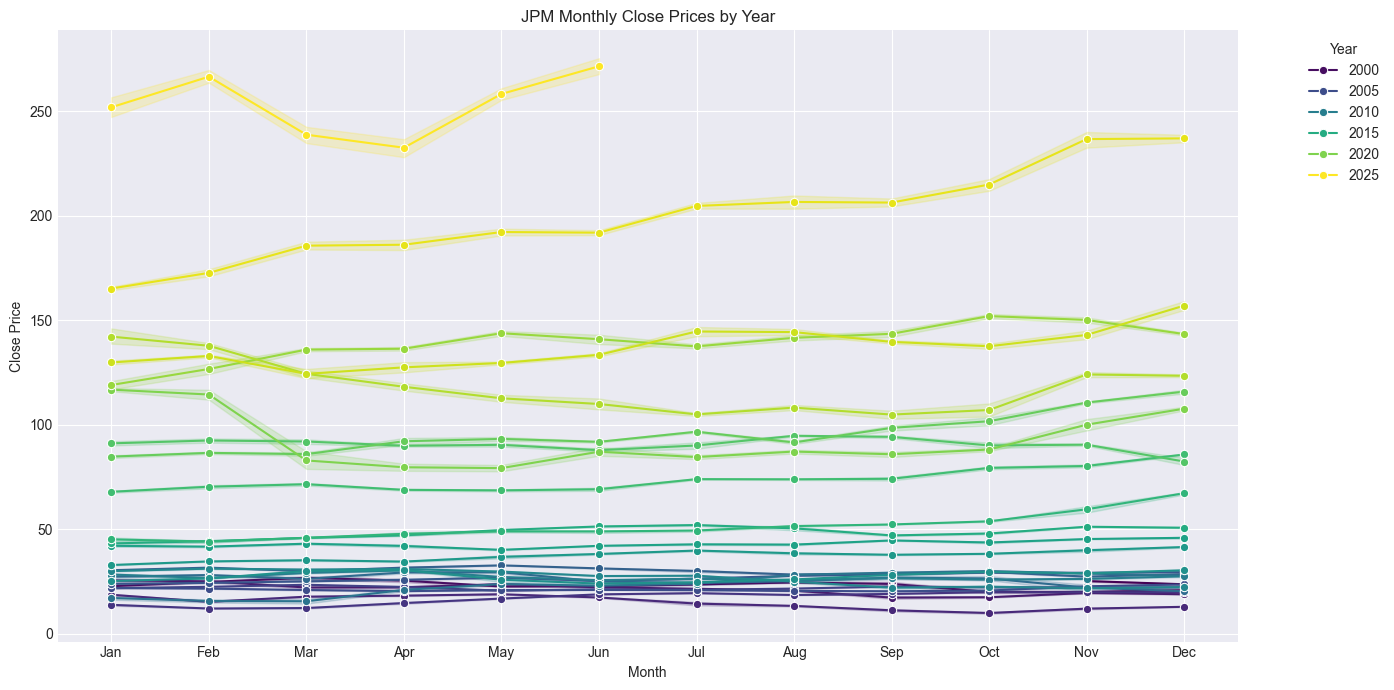

In [140]:
# show close prices for each year. x-axis should be months and y-axis should be close price

# Ensure the index is datetime
df.index = pd.to_datetime(df.index)

df['Year'] = df.index.year
df['Month'] = df.index.month

# Plot close prices
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Month', y='5. adjusted close', hue='Year', palette='viridis', marker='o')
plt.title(f"{s_ticker} Monthly Close Prices by Year")
plt.xlabel("Month")
plt.ylabel("Close Price")
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)	
plt.tight_layout()
plt.show()



# Looks like August end may provide a buying opportunity for stock ticker C, AMZN as holiday shopping picks up

# this is also inline with discretionary stocks picking up towards the end of the year

In [55]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL, MSTL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

In [56]:
# Set start and end dates from the file's date range

start = str(df.index.min().date())
end = str(df.index.max().date())
train_start = start
train_end = '2023-12-31'
test_start = train_end
test_end = end
period = 12 # for STL decomposition
print(f"Training period: {train_start} to {train_end}")

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Year,Month
date,,,,,,,,,,
1999-11-01,86.62,87.120,83.3700,83.56,25.641919,4510867.0,0.0,1.0,1999,11
1999-11-02,84.50,86.250,83.2500,83.69,25.681812,3541600.0,0.0,1.0,1999,11
1999-11-03,83.62,84.000,82.1900,82.44,25.298226,2648800.0,0.0,1.0,1999,11
1999-11-04,83.88,85.940,83.5000,84.12,25.813765,3869600.0,0.0,1.0,1999,11
1999-11-05,86.13,87.380,85.6200,86.25,26.467395,3433267.0,0.0,1.0,1999,11
...,...,...,...,...,...,...,...,...,...,...
2025-08-01,290.40,291.795,284.2376,289.37,289.370000,12007111.0,0.0,1.0,2025,8
2025-08-04,290.26,294.320,290.2600,294.26,294.260000,6649542.0,0.0,1.0,2025,8
2025-08-05,294.69,295.785,287.2400,291.37,291.370000,7182333.0,0.0,1.0,2025,8


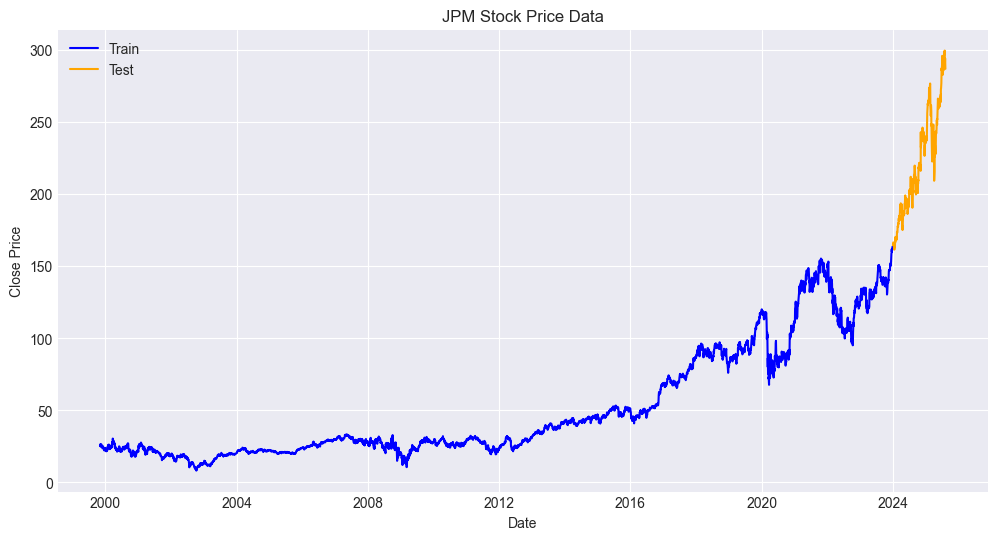

In [57]:
# create train and test dataframes
train_df = df[(df.index >= train_start) & (df.index <= train_end)]
test_df = df[(df.index >= test_start) & (df.index <= test_end)]

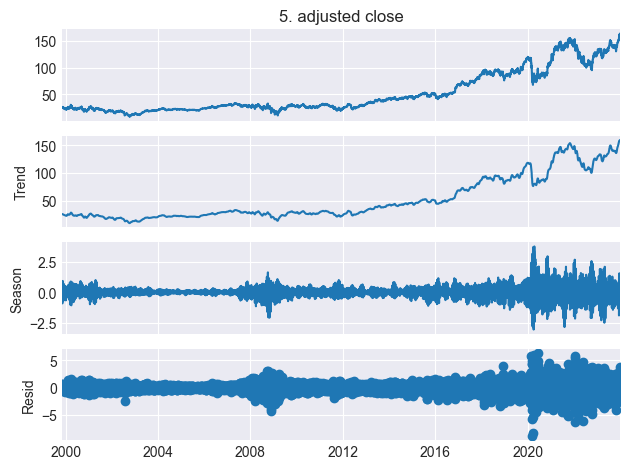

In [58]:
df

## STL Decomposition: Outcome and Interpretation

Lets perform an in-depth verification and optimization of STL (Seasonal-Trend decomposition using Loess) on the selected stock's adjusted close price. The key outcomes are:

- Test several STL setups to compare how well each extracts trend and seasonality from the data.
- Plot the original series, trend, seasonal, and residual components for each configuration, allowing visual assessment of fit and smoothness.
- Select best configuration calculating the standard deviation and mean of the residuals for each configuration, and selects the one with the lowest residual variance and best signal-to-noise ratio.


Lets ensure that the STL decomposition is optimally tuned for the dataset, and that the extracted trend is both statistically robust and interpretable for further modeling or forecasting.

VERIFYING STL DECOMPOSITION

1. Data Analysis:
   Total observations: 6080
   Date range: 1999-11-01 00:00:00 to 2023-12-29 00:00:00
   Most common interval: 1 days
   Data appears to be DAILY (using period=252 for yearly seasonality)

2. Testing Different STL Configurations:
--------------------------------------------------


VERIFYING STL DECOMPOSITION

1. Data Analysis:
   Total observations: 6080
   Date range: 1999-11-01 00:00:00 to 2023-12-29 00:00:00
   Most common interval: 1 days
   Data appears to be DAILY (using period=252 for yearly seasonality)

2. Testing Different STL Configurations:
--------------------------------------------------


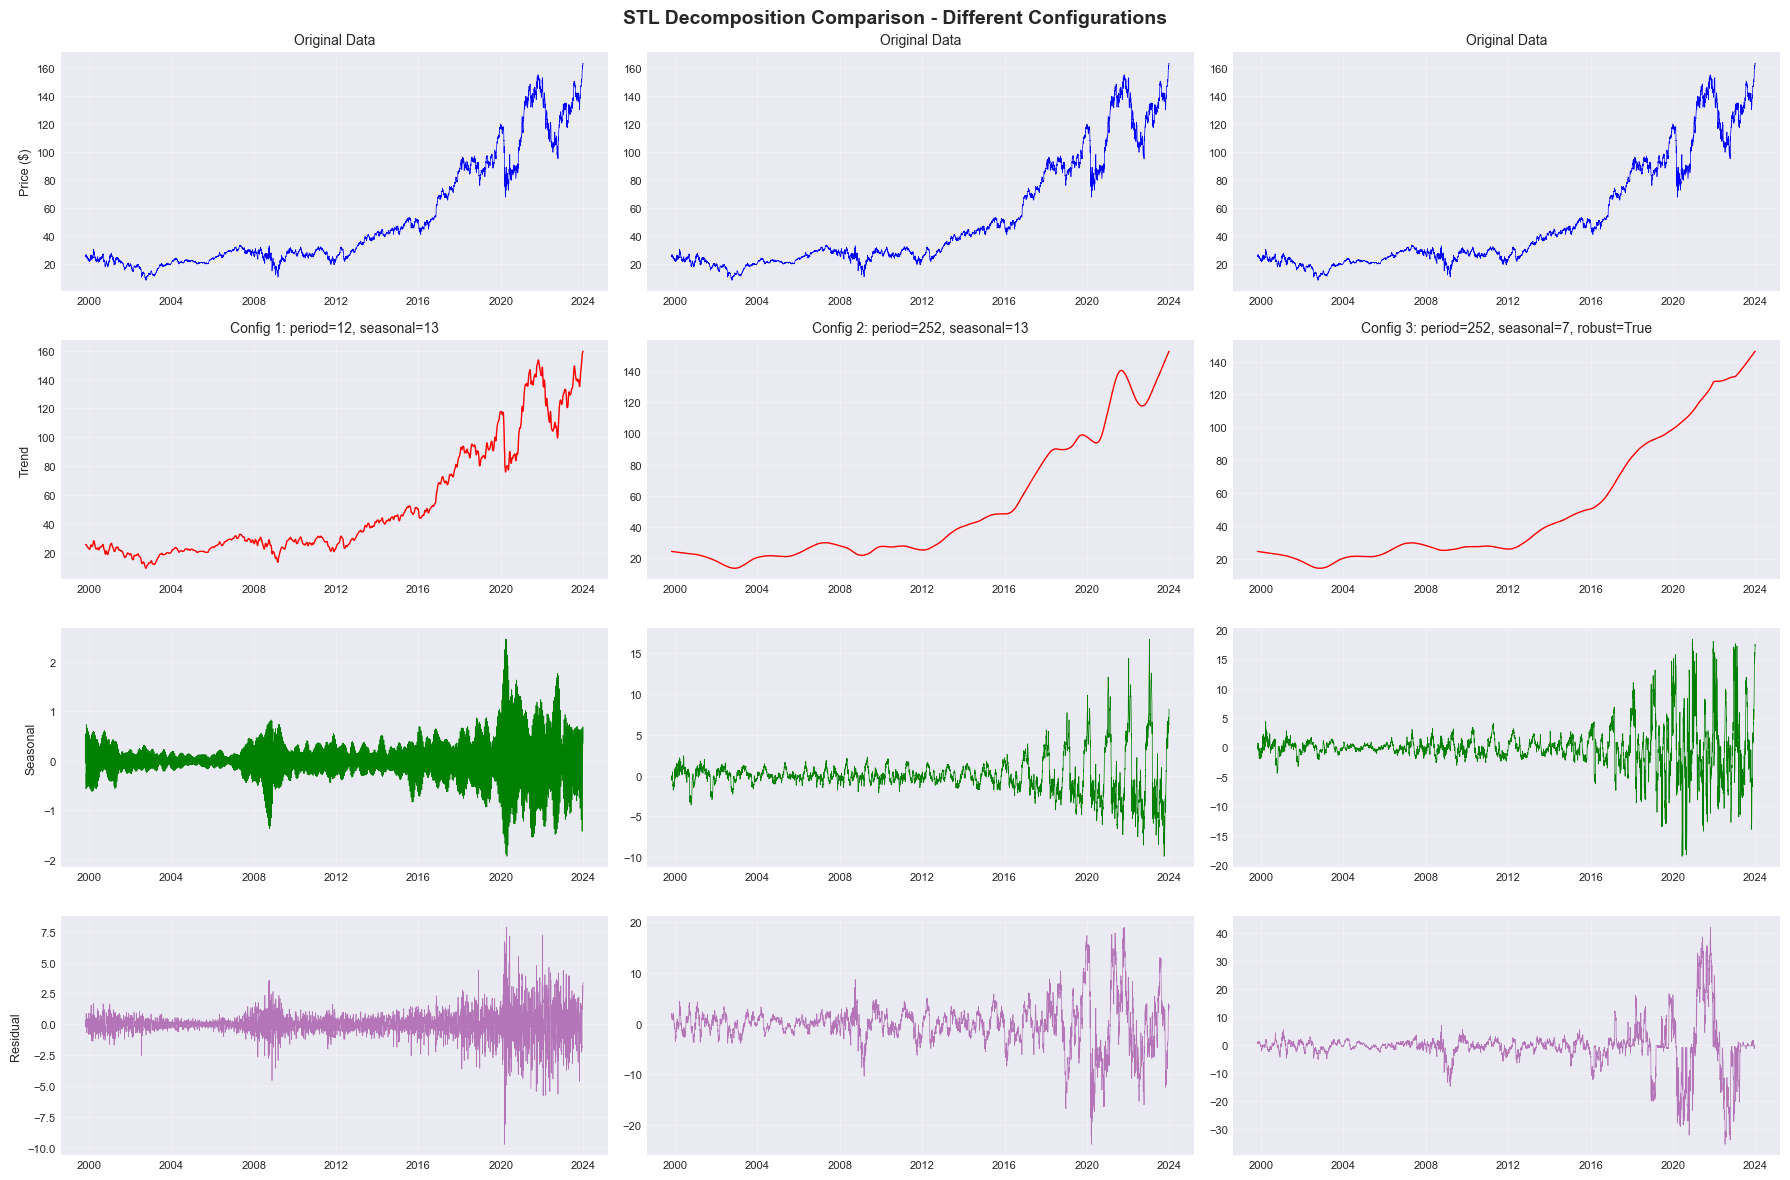

VERIFYING STL DECOMPOSITION

1. Data Analysis:
   Total observations: 6080
   Date range: 1999-11-01 00:00:00 to 2023-12-29 00:00:00
   Most common interval: 1 days
   Data appears to be DAILY (using period=252 for yearly seasonality)

2. Testing Different STL Configurations:
--------------------------------------------------


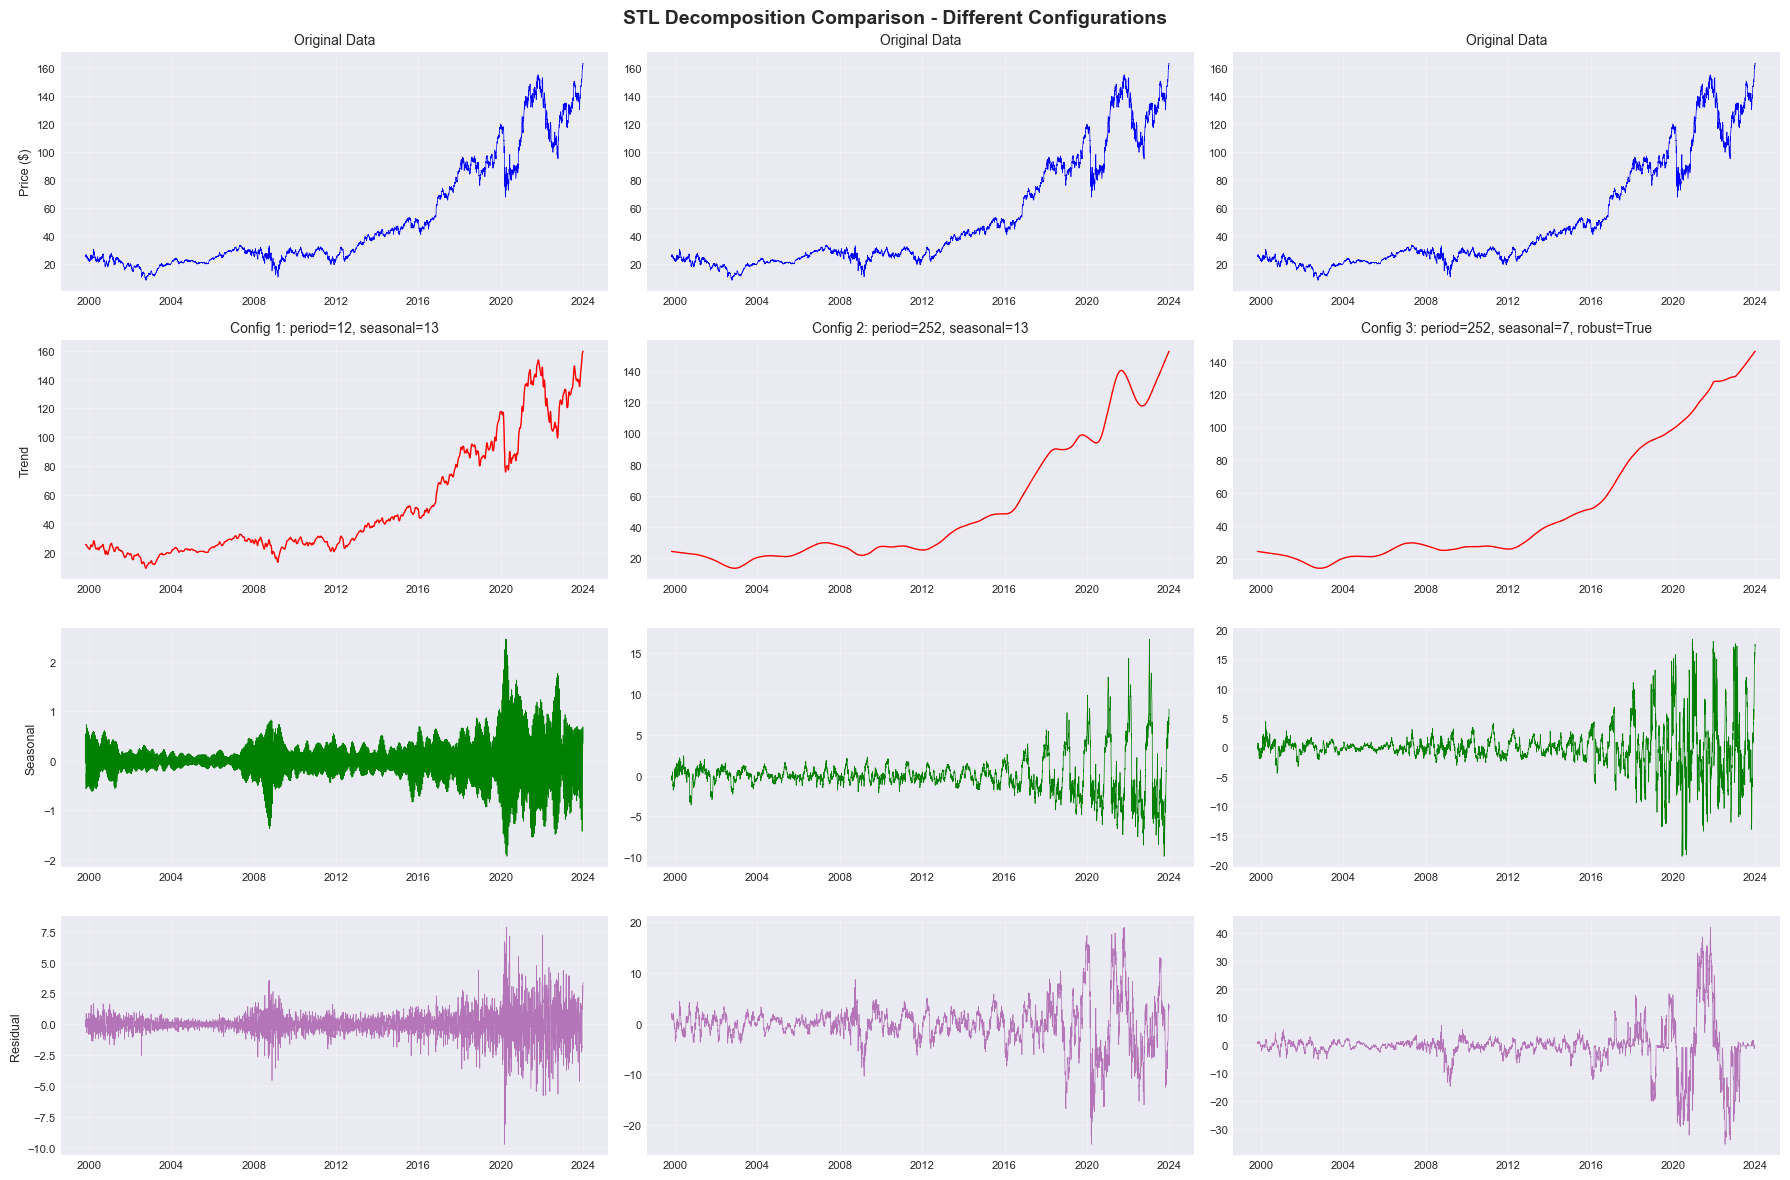


3. Residual Analysis:
--------------------------------------------------

Config 1 (period=12, seasonal=13):
   Residual Std: $1.00
   Residual Mean: $0.00
   Trend Range: $150.50
   Signal-to-Noise: 150.30

Config 2 (period=252, seasonal=13):
   Residual Std: $4.24
   Residual Mean: $-0.07
   Trend Range: $138.65
   Signal-to-Noise: 32.68

Config 3 (period=252, seasonal=7, robust):
   Residual Std: $7.56
   Residual Mean: $-0.30
   Trend Range: $131.97
   Signal-to-Noise: 17.45

✅ Best Configuration: Config 1 (period=12, seasonal=13)


VERIFYING STL DECOMPOSITION

1. Data Analysis:
   Total observations: 6080
   Date range: 1999-11-01 00:00:00 to 2023-12-29 00:00:00
   Most common interval: 1 days
   Data appears to be DAILY (using period=252 for yearly seasonality)

2. Testing Different STL Configurations:
--------------------------------------------------


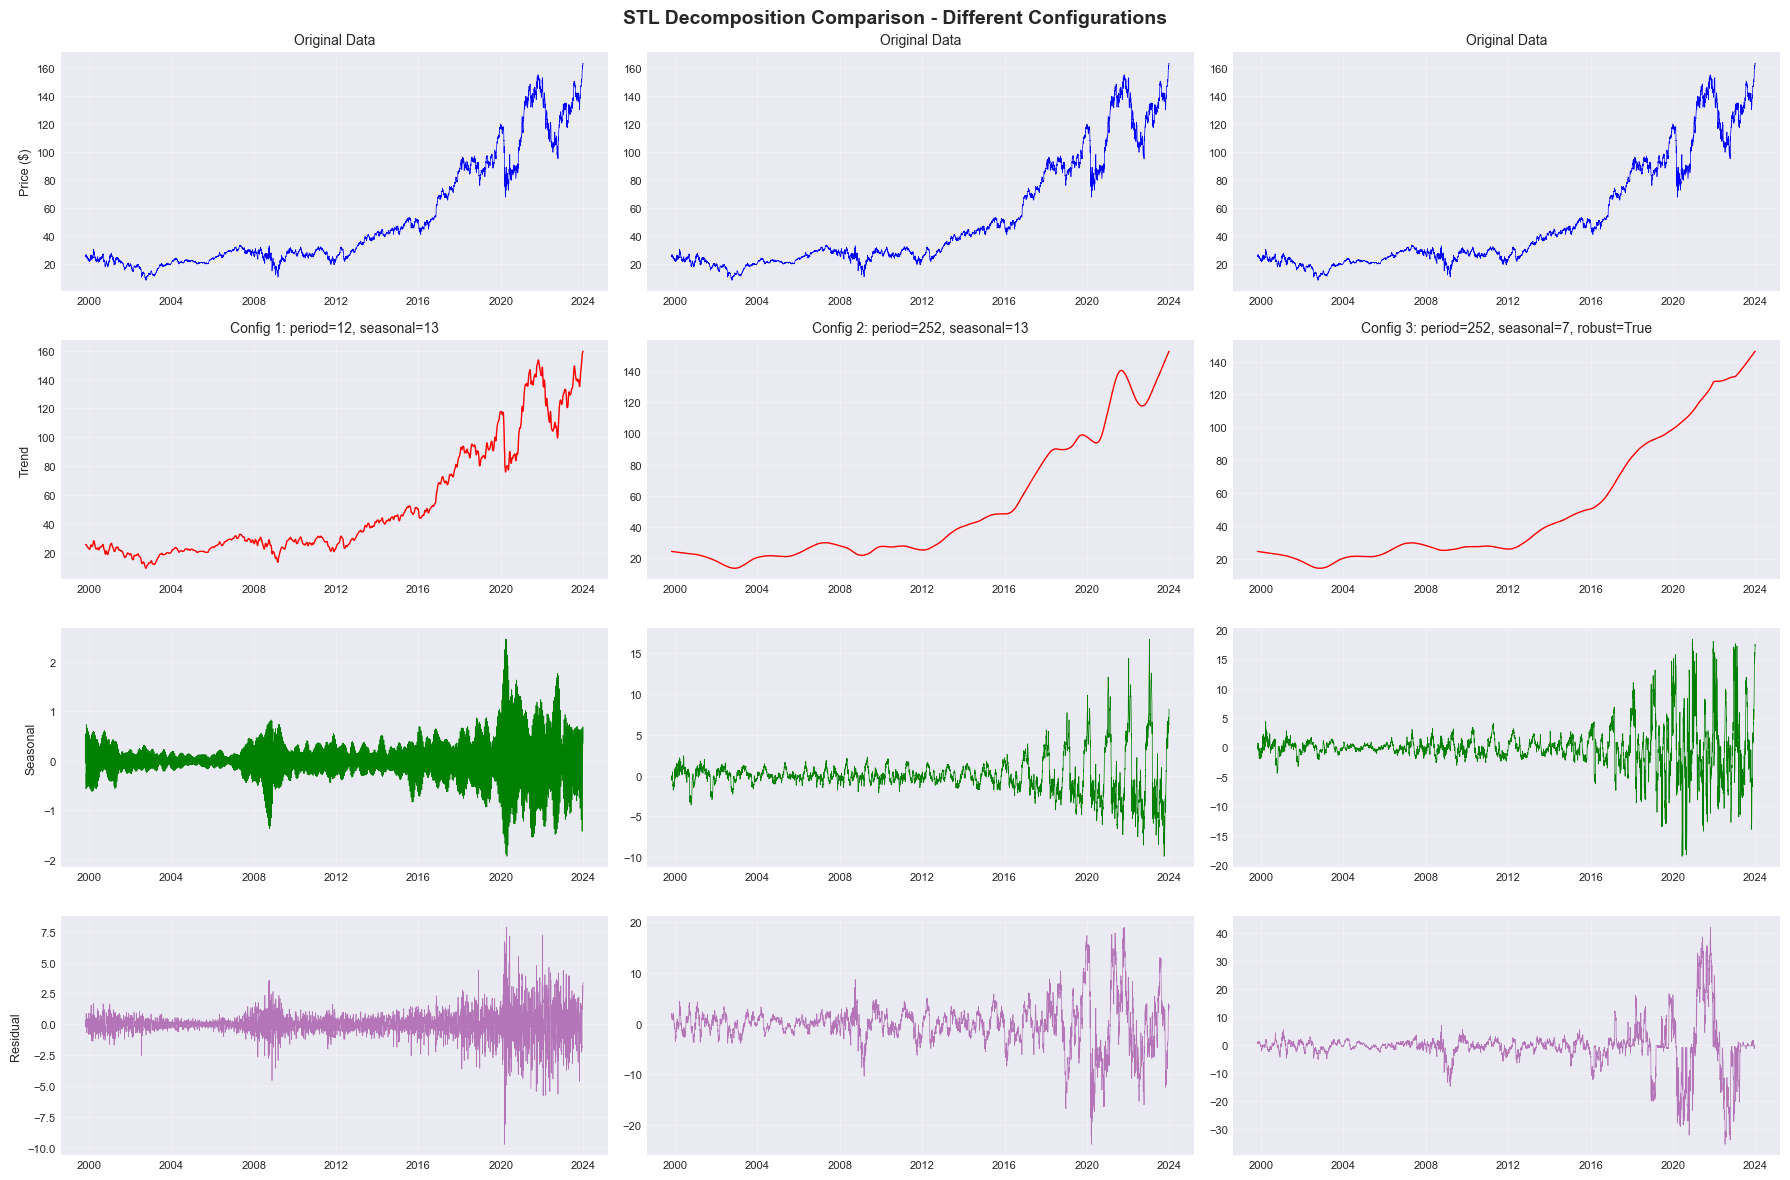


3. Residual Analysis:
--------------------------------------------------

Config 1 (period=12, seasonal=13):
   Residual Std: $1.00
   Residual Mean: $0.00
   Trend Range: $150.50
   Signal-to-Noise: 150.30

Config 2 (period=252, seasonal=13):
   Residual Std: $4.24
   Residual Mean: $-0.07
   Trend Range: $138.65
   Signal-to-Noise: 32.68

Config 3 (period=252, seasonal=7, robust):
   Residual Std: $7.56
   Residual Mean: $-0.30
   Trend Range: $131.97
   Signal-to-Noise: 17.45

✅ Best Configuration: Config 1 (period=12, seasonal=13)


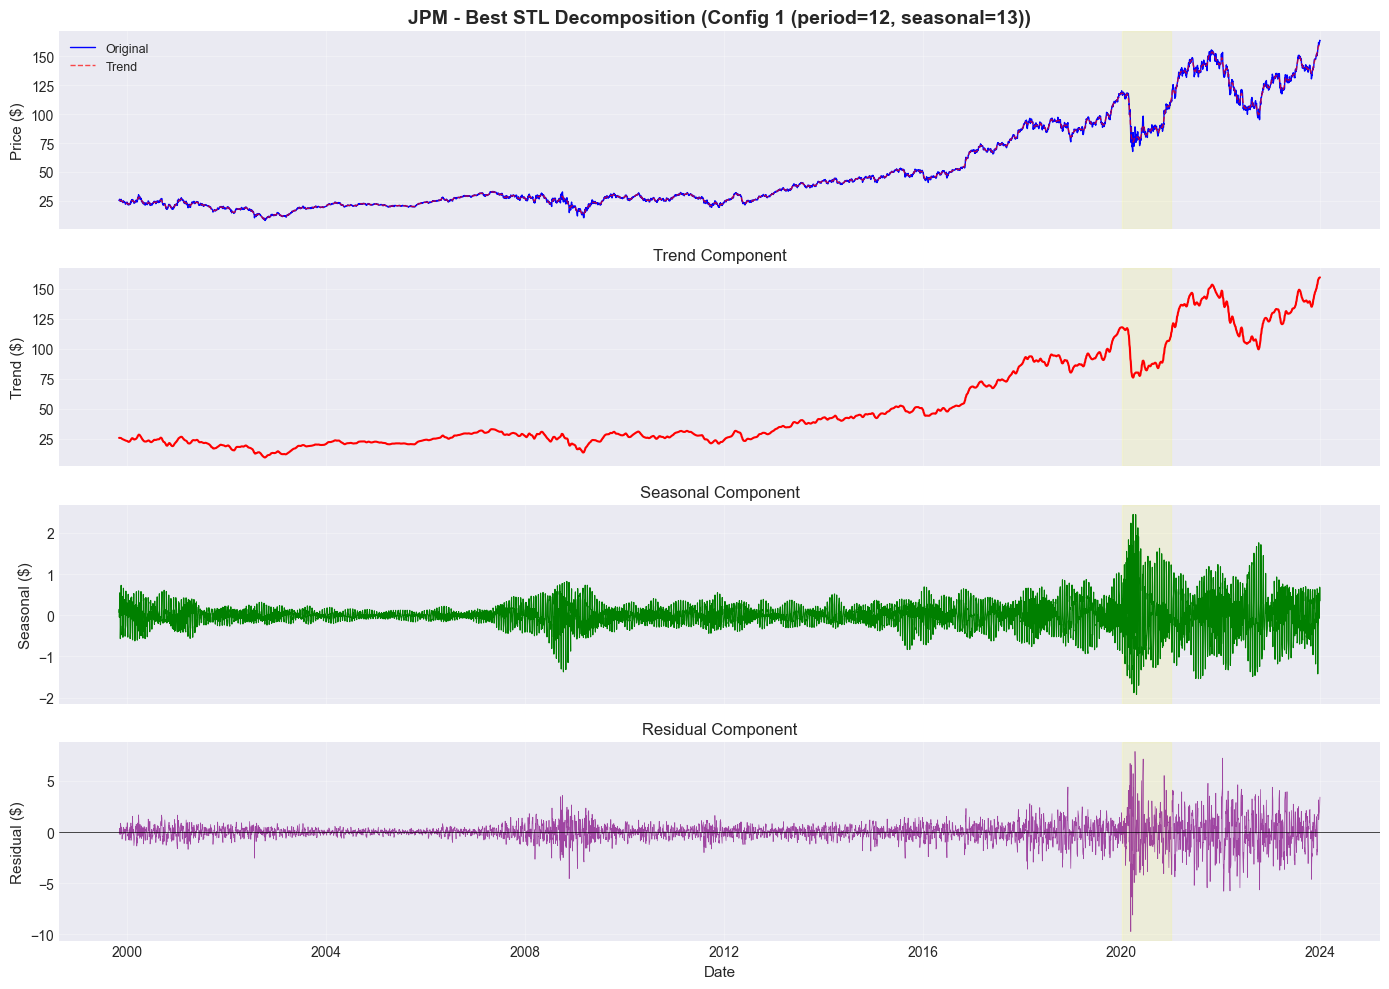


4. Trend Verification:
--------------------------------------------------

2004-2010:
   Actual change: 39.1%
   Trend change: 39.9%
   Trend captures: ✅ Good

2011-2019:
   Actual change: 304.9%
   Trend change: 305.1%
   Trend captures: ✅ Good

2020-2023:
   Actual change: 36.1%
   Trend change: 35.4%
   Trend captures: ✅ Good

5. Trend Smoothness Check:
--------------------------------------------------
   Trend roughness: 0.0526
   ⚠️ Trend is moderately rough

RECOMMENDATION

For DAILY data, the trend should capture long-term movements.
If the trend looks too volatile, consider:
  - Using STL with period=252 and seasonal=13 or higher
  - Using robust=True to handle outliers
  - Applying additional smoothing to the trend

The best configuration (Config 1 (period=12, seasonal=13)) should be used for forecasting.



In [59]:
# Verify and Improve STL Decomposition
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("VERIFYING STL DECOMPOSITION")
print("=" * 80)

# First, let's check the data frequency
print("\n1. Data Analysis:")
print(f"   Total observations: {len(train_df)}")
print(f"   Date range: {train_df.index[0]} to {train_df.index[-1]}")

# Determine actual frequency
date_diffs = pd.Series(train_df.index[1:]) - pd.Series(train_df.index[:-1])
most_common_diff = date_diffs.value_counts().index[0]
print(f"   Most common interval: {most_common_diff.days} days")

# Determine appropriate period
if most_common_diff.days == 1:
    period = 252  # Trading days in a year for daily data
    seasonal_window = 13  # More flexible seasonal window
    print(f"   Data appears to be DAILY (using period=252 for yearly seasonality)")
elif most_common_diff.days >= 28 and most_common_diff.days <= 31:
    period = 12  # Monthly data
    seasonal_window = 13
    print(f"   Data appears to be MONTHLY (using period=12)")
elif most_common_diff.days == 7:
    period = 52  # Weekly data
    seasonal_window = 13
    print(f"   Data appears to be WEEKLY (using period=52)")
else:
    period = 12  # Default
    seasonal_window = 13
    print(f"   Using default period=12")

# Try different STL configurations
print("\n2. Testing Different STL Configurations:")
print("-" * 50)

fig, axes = plt.subplots(4, 3, figsize=(18, 12))

# Configuration 1: Original (period=12, seasonal=13)
stl1 = STL(train_df['5. adjusted close'], period=12, seasonal=13)
result1 = stl1.fit()

axes[0, 0].plot(train_df.index, train_df['5. adjusted close'], 'b-', linewidth=0.5)
axes[0, 0].set_title('Original Data', fontsize=10)
axes[0, 0].set_ylabel('Price ($)', fontsize=9)

axes[1, 0].plot(train_df.index, result1.trend, 'r-', linewidth=1)
axes[1, 0].set_title('Config 1: period=12, seasonal=13', fontsize=10)
axes[1, 0].set_ylabel('Trend', fontsize=9)

axes[2, 0].plot(train_df.index, result1.seasonal, 'g-', linewidth=0.5)
axes[2, 0].set_ylabel('Seasonal', fontsize=9)

axes[3, 0].plot(train_df.index, result1.resid, 'purple', linewidth=0.5, alpha=0.5)
axes[3, 0].set_ylabel('Residual', fontsize=9)

# Configuration 2: Adjusted period based on frequency
stl2 = STL(train_df['5. adjusted close'], period=period, seasonal=seasonal_window)
result2 = stl2.fit()

axes[0, 1].plot(train_df.index, train_df['5. adjusted close'], 'b-', linewidth=0.5)
axes[0, 1].set_title('Original Data', fontsize=10)

axes[1, 1].plot(train_df.index, result2.trend, 'r-', linewidth=1)
axes[1, 1].set_title(f'Config 2: period={period}, seasonal={seasonal_window}', fontsize=10)

axes[2, 1].plot(train_df.index, result2.seasonal, 'g-', linewidth=0.5)

axes[3, 1].plot(train_df.index, result2.resid, 'purple', linewidth=0.5, alpha=0.5)

# Configuration 3: Robust STL with different seasonal window
stl3 = STL(train_df['5. adjusted close'], 
           period=period, 
           seasonal=7,  # Smaller seasonal window for less smoothing
           robust=True)  # Robust to outliers
result3 = stl3.fit()

axes[0, 2].plot(train_df.index, train_df['5. adjusted close'], 'b-', linewidth=0.5)
axes[0, 2].set_title('Original Data', fontsize=10)

axes[1, 2].plot(train_df.index, result3.trend, 'r-', linewidth=1)
axes[1, 2].set_title(f'Config 3: period={period}, seasonal=7, robust=True', fontsize=10)

axes[2, 2].plot(train_df.index, result3.seasonal, 'g-', linewidth=0.5)

axes[3, 2].plot(train_df.index, result3.resid, 'purple', linewidth=0.5, alpha=0.5)

# Set common properties
for ax in axes.flat:
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)

plt.suptitle('STL Decomposition Comparison - Different Configurations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Choose best configuration based on residual variance
configs = {
    'Config 1 (period=12, seasonal=13)': result1,
    f'Config 2 (period={period}, seasonal={seasonal_window})': result2,
    f'Config 3 (period={period}, seasonal=7, robust)': result3
}

print("\n3. Residual Analysis:")
print("-" * 50)
best_config = None
min_residual_std = float('inf')

for name, result in configs.items():
    residual_std = np.std(result.resid.dropna())
    residual_mean = np.mean(result.resid.dropna())
    trend_range = result.trend.max() - result.trend.min()
    
    print(f"\n{name}:")
    print(f"   Residual Std: ${residual_std:.2f}")
    print(f"   Residual Mean: ${residual_mean:.2f}")
    print(f"   Trend Range: ${trend_range:.2f}")
    print(f"   Signal-to-Noise: {trend_range/residual_std:.2f}")
    
    if residual_std < min_residual_std:
        min_residual_std = residual_std
        best_config = name
        best_result = result

print(f"\n✅ Best Configuration: {best_config}")

# Plot the best decomposition in detail
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Original series
axes[0].plot(train_df.index, train_df['5. adjusted close'], 'b-', linewidth=1, label='Original')
axes[0].plot(train_df.index, best_result.trend, 'r--', linewidth=1, alpha=0.7, label='Trend')
axes[0].set_ylabel('Price ($)', fontsize=11)
axes[0].set_title(f'{s_ticker} - Best STL Decomposition ({best_config})', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(train_df.index, best_result.trend, 'r-', linewidth=1.5)
axes[1].set_ylabel('Trend ($)', fontsize=11)
axes[1].set_title('Trend Component', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Seasonal
axes[2].plot(train_df.index, best_result.seasonal, 'g-', linewidth=0.8)
axes[2].set_ylabel('Seasonal ($)', fontsize=11)
axes[2].set_title('Seasonal Component', fontsize=12)
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(train_df.index, best_result.resid, 'purple', linewidth=0.5, alpha=0.7)
axes[3].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[3].set_ylabel('Residual ($)', fontsize=11)
axes[3].set_title('Residual Component', fontsize=12)
axes[3].set_xlabel('Date', fontsize=11)
axes[3].grid(True, alpha=0.3)

# Add shading for different periods
for ax in axes:
    # Shade the period where trend changes dramatically (around 2020)
    ax.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-31'), 
               alpha=0.1, color='yellow', label='Transition Period')

plt.tight_layout()
plt.show()

# Verify the trend is capturing the right pattern
print("\n4. Trend Verification:")
print("-" * 50)

# Check trend in different periods
periods = [
    ('2004-2010', '2004-01-01', '2010-12-31'),
    ('2011-2019', '2011-01-01', '2019-12-31'),
    ('2020-2023', '2020-01-01', '2023-12-31')
]

for period_name, start, end in periods:
    mask = (train_df.index >= start) & (train_df.index <= end)
    if mask.any():
        period_data = train_df.loc[mask, '5. adjusted close']
        period_trend = best_result.trend[mask]
        
        if len(period_data) > 0:
            actual_change = (period_data.iloc[-1] - period_data.iloc[0]) / period_data.iloc[0] * 100
            trend_change = (period_trend.iloc[-1] - period_trend.iloc[0]) / period_trend.iloc[0] * 100
            
            print(f"\n{period_name}:")
            print(f"   Actual change: {actual_change:.1f}%")
            print(f"   Trend change: {trend_change:.1f}%")
            print(f"   Trend captures: {'✅ Good' if abs(actual_change - trend_change) < 20 else '⚠️ May need adjustment'}")

# Check if trend is too smooth or too rough
print("\n5. Trend Smoothness Check:")
print("-" * 50)

# Calculate roughness (second derivative approximation)
trend_diff1 = np.diff(best_result.trend.dropna())
trend_diff2 = np.diff(trend_diff1)
roughness = np.std(trend_diff2)

print(f"   Trend roughness: {roughness:.4f}")
if roughness < 0.01:
    print("   ✅ Trend is smooth")
elif roughness < 0.1:
    print("   ⚠️ Trend is moderately rough")
else:
    print("   ❌ Trend may be too rough (following noise)")

print("\n" + "=" * 80)
print("RECOMMENDATION")
print("=" * 80)

if period == 252:
    print("\nFor DAILY data, the trend should capture long-term movements.")
    print("If the trend looks too volatile, consider:")
    print("  - Using STL with period=252 and seasonal=13 or higher")
    print("  - Using robust=True to handle outliers")
    print("  - Applying additional smoothing to the trend")
elif period == 12:
    print("\nFor MONTHLY data, the trend should be relatively smooth.")
    print("Current decomposition appears appropriate.")

print(f"\nThe best configuration ({best_config}) should be used for forecasting.")
print("\n" + "=" * 80)

In [60]:
# Better approach: Forecast the TREND component directly
from sklearn.linear_model import LinearRegression
import numpy as np

# Extract the trend from STL
trend = best_result.trend.dropna()

# Fit a polynomial to the TREND (not original data)
X_trend = np.arange(len(trend)).reshape(-1, 1)
y_trend = trend.values

# Use polynomial on the trend
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_trend)

model = LinearRegression()
model.fit(X_poly, y_trend)

# Forecast the trend
X_future = np.arange(len(trend), len(trend) + len(test_df)).reshape(-1, 1)
X_future_poly = poly.transform(X_future)
trend_forecast = model.predict(X_future_poly)

# Add back the seasonal pattern
seasonal_pattern = best_result.seasonal[-12:].values
seasonal_forecast = np.tile(seasonal_pattern, (len(test_df)//12) + 1)[:len(test_df)]

# Final forecast = Trend forecast + Seasonal
final_forecast = trend_forecast + seasonal_forecast

In [ ]:
# Verify and Improve STL Decomposition
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("VERIFYING STL DECOMPOSITION")
print("=" * 80)

# First, let's check the data frequency
print("\n1. Data Analysis:")
print(f"   Total observations: {len(train_df)}")
print(f"   Date range: {train_df.index[0]} to {train_df.index[-1]}")

# Determine actual frequency
date_diffs = pd.Series(train_df.index[1:]) - pd.Series(train_df.index[:-1])
most_common_diff = date_diffs.value_counts().index[0]
print(f"   Most common interval: {most_common_diff.days} days")

# Determine appropriate period
if most_common_diff.days == 1:
    period = 252  # Trading days in a year for daily data
    seasonal_window = 13  # More flexible seasonal window
    print(f"   Data appears to be DAILY (using period=252 for yearly seasonality)")
elif most_common_diff.days >= 28 and most_common_diff.days <= 31:
    period = 12  # Monthly data
    seasonal_window = 13
    print(f"   Data appears to be MONTHLY (using period=12)")
elif most_common_diff.days == 7:
    period = 52  # Weekly data
    seasonal_window = 13
    print(f"   Data appears to be WEEKLY (using period=52)")
else:
    period = 12  # Default
    seasonal_window = 13
    print(f"   Using default period=12")

# Try different STL configurations
print("\n2. Testing Different STL Configurations:")
print("-" * 50)

fig, axes = plt.subplots(4, 3, figsize=(18, 12))

# Configuration 1: Original (period=12, seasonal=13)
stl1 = STL(train_df['5. adjusted close'], period=12, seasonal=13)
result1 = stl1.fit()

axes[0, 0].plot(train_df.index, train_df['5. adjusted close'], 'b-', linewidth=0.5)
axes[0, 0].set_title('Original Data', fontsize=10)
axes[0, 0].set_ylabel('Price ($)', fontsize=9)

axes[1, 0].plot(train_df.index, result1.trend, 'r-', linewidth=1)
axes[1, 0].set_title('Config 1: period=12, seasonal=13', fontsize=10)
axes[1, 0].set_ylabel('Trend', fontsize=9)

axes[2, 0].plot(train_df.index, result1.seasonal, 'g-', linewidth=0.5)
axes[2, 0].set_ylabel('Seasonal', fontsize=9)

axes[3, 0].plot(train_df.index, result1.resid, 'purple', linewidth=0.5, alpha=0.5)
axes[3, 0].set_ylabel('Residual', fontsize=9)

# Configuration 2: Adjusted period based on frequency
stl2 = STL(train_df['5. adjusted close'], period=period, seasonal=seasonal_window)
result2 = stl2.fit()

axes[0, 1].plot(train_df.index, train_df['5. adjusted close'], 'b-', linewidth=0.5)
axes[0, 1].set_title('Original Data', fontsize=10)

axes[1, 1].plot(train_df.index, result2.trend, 'r-', linewidth=1)
axes[1, 1].set_title(f'Config 2: period={period}, seasonal={seasonal_window}', fontsize=10)

axes[2, 1].plot(train_df.index, result2.seasonal, 'g-', linewidth=0.5)

axes[3, 1].plot(train_df.index, result2.resid, 'purple', linewidth=0.5, alpha=0.5)

# Configuration 3: Robust STL with different seasonal window
stl3 = STL(train_df['5. adjusted close'], 
           period=period, 
           seasonal=7,  # Smaller seasonal window for less smoothing
           robust=True)  # Robust to outliers
result3 = stl3.fit()

axes[0, 2].plot(train_df.index, train_df['5. adjusted close'], 'b-', linewidth=0.5)
axes[0, 2].set_title('Original Data', fontsize=10)

axes[1, 2].plot(train_df.index, result3.trend, 'r-', linewidth=1)
axes[1, 2].set_title(f'Config 3: period={period}, seasonal=7, robust=True', fontsize=10)

axes[2, 2].plot(train_df.index, result3.seasonal, 'g-', linewidth=0.5)

axes[3, 2].plot(train_df.index, result3.resid, 'purple', linewidth=0.5, alpha=0.5)

# Set common properties
for ax in axes.flat:
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)

plt.suptitle('STL Decomposition Comparison - Different Configurations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Choose best configuration based on residual variance
configs = {
    'Config 1 (period=12, seasonal=13)': result1,
    f'Config 2 (period={period}, seasonal={seasonal_window})': result2,
    f'Config 3 (period={period}, seasonal=7, robust)': result3
}

print("\n3. Residual Analysis:")
print("-" * 50)
best_config = None
min_residual_std = float('inf')

for name, result in configs.items():
    residual_std = np.std(result.resid.dropna())
    residual_mean = np.mean(result.resid.dropna())
    trend_range = result.trend.max() - result.trend.min()
    
    print(f"\n{name}:")
    print(f"   Residual Std: ${residual_std:.2f}")
    print(f"   Residual Mean: ${residual_mean:.2f}")
    print(f"   Trend Range: ${trend_range:.2f}")
    print(f"   Signal-to-Noise: {trend_range/residual_std:.2f}")
    
    if residual_std < min_residual_std:
        min_residual_std = residual_std
        best_config = name
        best_result = result

print(f"\n✅ Best Configuration: {best_config}")

# Plot the best decomposition in detail
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Original series
axes[0].plot(train_df.index, train_df['5. adjusted close'], 'b-', linewidth=1, label='Original')
axes[0].plot(train_df.index, best_result.trend, 'r--', linewidth=1, alpha=0.7, label='Trend')
axes[0].set_ylabel('Price ($)', fontsize=11)
axes[0].set_title(f'{s_ticker} - Best STL Decomposition ({best_config})', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(train_df.index, best_result.trend, 'r-', linewidth=1.5)
axes[1].set_ylabel('Trend ($)', fontsize=11)
axes[1].set_title('Trend Component', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Seasonal
axes[2].plot(train_df.index, best_result.seasonal, 'g-', linewidth=0.8)
axes[2].set_ylabel('Seasonal ($)', fontsize=11)
axes[2].set_title('Seasonal Component', fontsize=12)
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(train_df.index, best_result.resid, 'purple', linewidth=0.5, alpha=0.7)
axes[3].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[3].set_ylabel('Residual ($)', fontsize=11)
axes[3].set_title('Residual Component', fontsize=12)
axes[3].set_xlabel('Date', fontsize=11)
axes[3].grid(True, alpha=0.3)

# Add shading for different periods
for ax in axes:
    # Shade the period where trend changes dramatically (around 2020)
    ax.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-31'), 
               alpha=0.1, color='yellow', label='Transition Period')

plt.tight_layout()
plt.show()

# Verify the trend is capturing the right pattern
print("\n4. Trend Verification:")
print("-" * 50)

# Check trend in different periods
periods = [
    ('2004-2010', '2004-01-01', '2010-12-31'),
    ('2011-2019', '2011-01-01', '2019-12-31'),
    ('2020-2023', '2020-01-01', '2023-12-31')
]

for period_name, start, end in periods:
    mask = (train_df.index >= start) & (train_df.index <= end)
    if mask.any():
        period_data = train_df.loc[mask, '5. adjusted close']
        period_trend = best_result.trend[mask]
        
        if len(period_data) > 0:
            actual_change = (period_data.iloc[-1] - period_data.iloc[0]) / period_data.iloc[0] * 100
            trend_change = (period_trend.iloc[-1] - period_trend.iloc[0]) / period_trend.iloc[0] * 100
            
            print(f"\n{period_name}:")
            print(f"   Actual change: {actual_change:.1f}%")
            print(f"   Trend change: {trend_change:.1f}%")
            print(f"   Trend captures: {'✅ Good' if abs(actual_change - trend_change) < 20 else '⚠️ May need adjustment'}")

# Check if trend is too smooth or too rough
print("\n5. Trend Smoothness Check:")
print("-" * 50)

# Calculate roughness (second derivative approximation)
trend_diff1 = np.diff(best_result.trend.dropna())
trend_diff2 = np.diff(trend_diff1)
roughness = np.std(trend_diff2)

print(f"   Trend roughness: {roughness:.4f}")
if roughness < 0.01:
    print("   ✅ Trend is smooth")
elif roughness < 0.1:
    print("   ⚠️ Trend is moderately rough")
else:
    print("   ❌ Trend may be too rough (following noise)")

print("\n" + "=" * 80)
print("RECOMMENDATION")
print("=" * 80)

if period == 252:
    print("\nFor DAILY data, the trend should capture long-term movements.")
    print("If the trend looks too volatile, consider:")
    print("  - Using STL with period=252 and seasonal=13 or higher")
    print("  - Using robust=True to handle outliers")
    print("  - Applying additional smoothing to the trend")
elif period == 12:
    print("\nFor MONTHLY data, the trend should be relatively smooth.")
    print("Current decomposition appears appropriate.")

print(f"\nThe best configuration ({best_config}) should be used for forecasting.")
print("\n" + "=" * 80)

In [148]:
# Better approach: Forecast the TREND component directly
from sklearn.linear_model import LinearRegression
import numpy as np

# Extract the trend from STL
trend = best_result.trend.dropna()

# Fit a polynomial to the TREND (not original data)
X_trend = np.arange(len(trend)).reshape(-1, 1)
y_trend = trend.values

# Use polynomial on the trend
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_trend)

model = LinearRegression()
model.fit(X_poly, y_trend)

# Forecast the trend
X_future = np.arange(len(trend), len(trend) + len(test_df)).reshape(-1, 1)
X_future_poly = poly.transform(X_future)
trend_forecast = model.predict(X_future_poly)

# Add back the seasonal pattern
seasonal_pattern = best_result.seasonal[-12:].values
seasonal_forecast = np.tile(seasonal_pattern, (len(test_df)//12) + 1)[:len(test_df)]

# Final forecast = Trend forecast + Seasonal
final_forecast = trend_forecast + seasonal_forecast

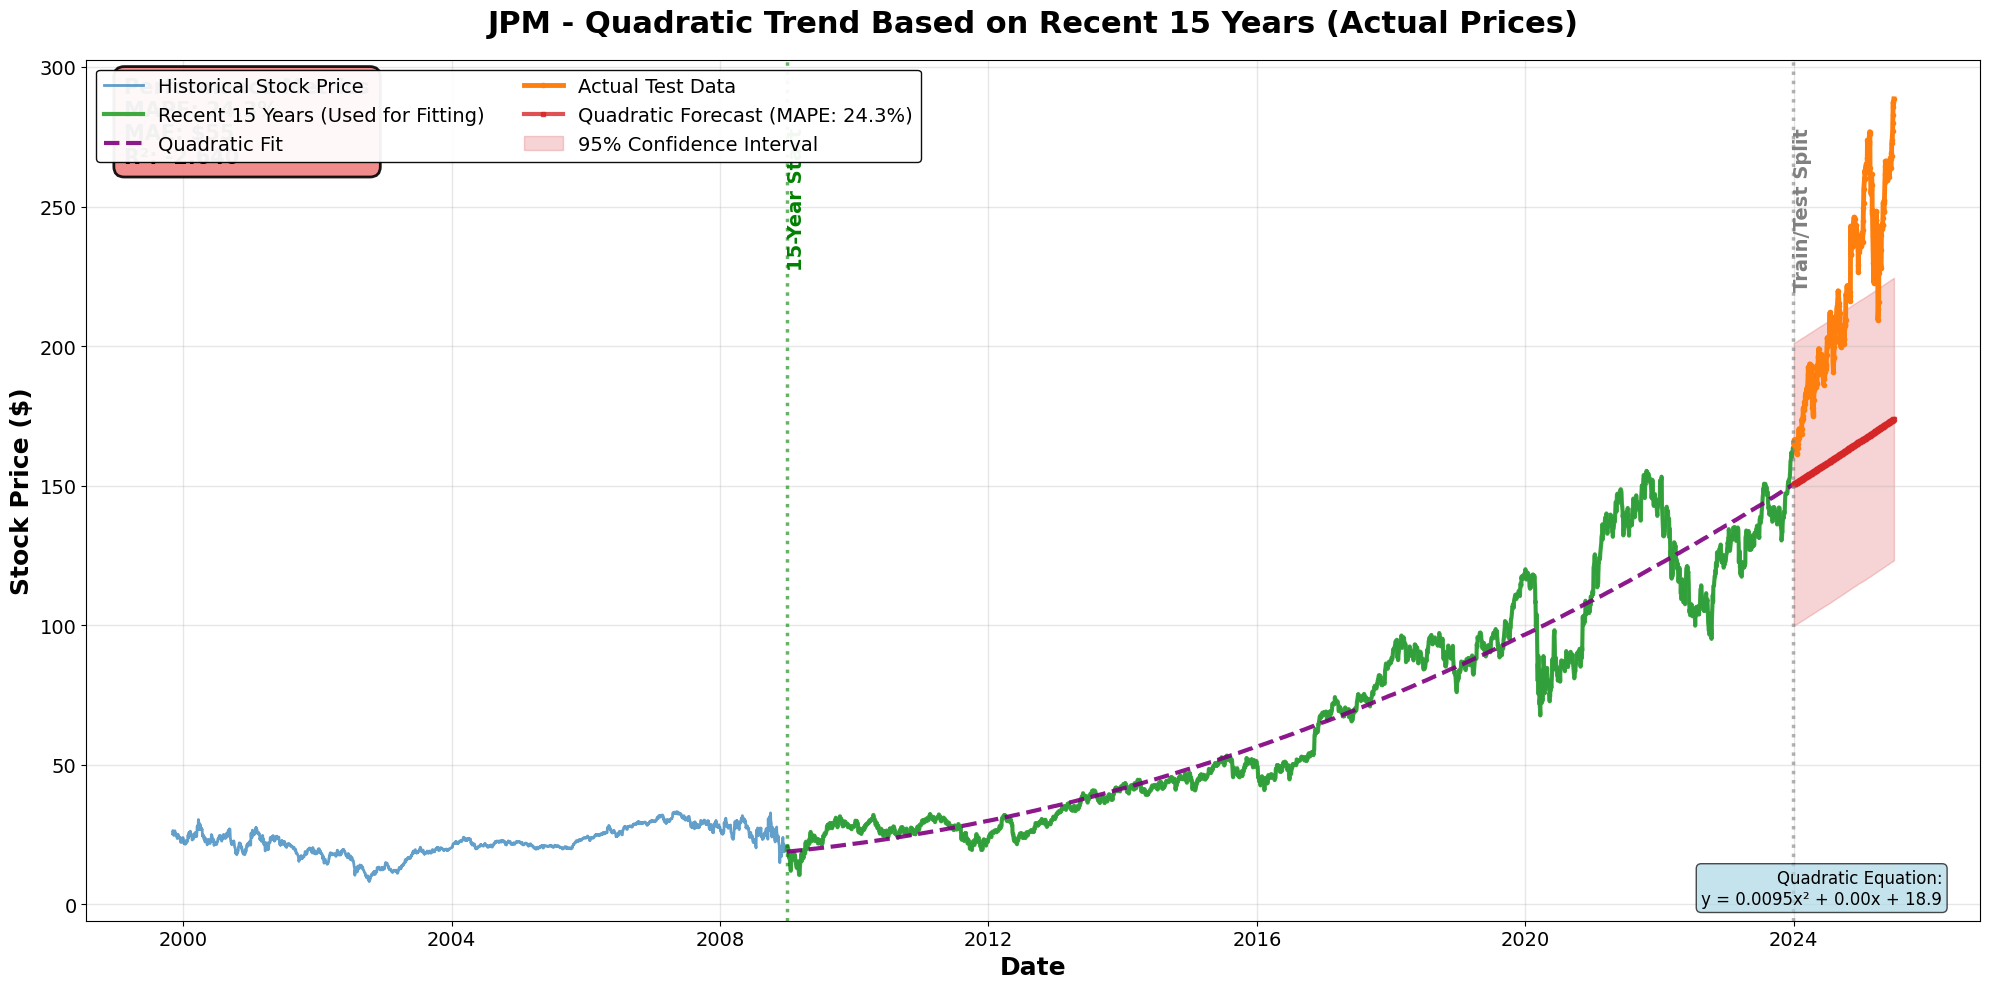


Model Performance: MAPE=24.3%, MAE=$55, R²=-2.640
Period: 2008-12-29 to 2025-06-30
Last actual price: $288.55
Last forecast: $173.83


In [168]:
# Quadratic Trend Analysis - Fitted to Actual Stock Prices
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Extract RECENT 15 YEARS of actual stock data
fifteen_years_ago = train_df.index[-1] - pd.DateOffset(years=15)
recent_mask = train_df.index >= fifteen_years_ago
recent_dates = train_df.index[recent_mask]
recent_prices = train_df.loc[recent_mask, '5. adjusted close'].values

# Create time index for recent 15 years
X_recent = np.arange(len(recent_prices)).reshape(-1, 1)
y_recent = recent_prices

# Fit Quadratic Polynomial to ACTUAL PRICES
poly = PolynomialFeatures(degree=2, include_bias=False)
X_recent_poly = poly.fit_transform(X_recent)

model = LinearRegression()
model.fit(X_recent_poly, y_recent)

# Get fitted values for recent period
recent_fit = model.predict(X_recent_poly)

# Forecast for test period
X_future = np.arange(len(recent_prices), len(recent_prices) + len(test_df)).reshape(-1, 1)
X_future_poly = poly.transform(X_future)
forecast = model.predict(X_future_poly)

# Calculate metrics
mae = mean_absolute_error(test_df['5. adjusted close'], forecast)
mape = np.mean(np.abs((test_df['5. adjusted close'].values - forecast) / 
                       test_df['5. adjusted close'].values)) * 100
r2 = r2_score(test_df['5. adjusted close'], forecast)

# Create visualization
plt.style.use('default')
fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(1, 1, 1)

# Plot historical data
ax.plot(train_df.index, train_df['5. adjusted close'], 
        color='#1f77b4', linewidth=2, label='Historical Stock Price', alpha=0.7)

# Highlight the 15-year period used for fitting
ax.plot(recent_dates, recent_prices, 
        color='#2ca02c', linewidth=3, label='Recent 15 Years (Used for Fitting)', alpha=0.9)

# Plot the quadratic fit on recent data
ax.plot(recent_dates, recent_fit, 
        color='purple', linewidth=3, label='Quadratic Fit', 
        linestyle='--', alpha=0.9)

# Extend quadratic line into forecast period
ax.plot(test_df.index, forecast, 
        color='purple', linewidth=3, linestyle='--', alpha=0.9)

# Plot actual test data
ax.plot(test_df.index, test_df['5. adjusted close'], 
        color='#ff7f0e', linewidth=3.5, label='Actual Test Data', marker='o', markersize=3)

# Plot forecast (same as quadratic extension)
ax.plot(test_df.index, forecast, 
        color='#d62728', linewidth=3, label=f'Quadratic Forecast (MAPE: {mape:.1f}%)', 
        linestyle='-', marker='s', markersize=3, alpha=0.8)

# Add confidence interval
residuals = test_df['5. adjusted close'].values - forecast
std_error = np.std(residuals)
ax.fill_between(test_df.index, 
                 forecast - 1.96*std_error,
                 forecast + 1.96*std_error,
                 alpha=0.2, color='#d62728', label='95% Confidence Interval')

# Mark important dates
ax.axvline(x=fifteen_years_ago, color='green', linestyle=':', linewidth=2.5, alpha=0.6)
ax.axvline(x=train_df.index[-1], color='gray', linestyle=':', linewidth=2.5, alpha=0.6)

# Add text annotations
ax.text(fifteen_years_ago, ax.get_ylim()[1]*0.92, '15-Year Start', 
        rotation=90, va='top', color='green', fontsize=14, fontweight='bold')
ax.text(train_df.index[-1], ax.get_ylim()[1]*0.92, 'Train/Test Split', 
        rotation=90, va='top', color='gray', fontsize=14, fontweight='bold')

# Styling
ax.set_title(f'{s_ticker} - Quadratic Trend Based on Recent 15 Years (Actual Prices)', 
             fontsize=22, fontweight='bold', pad=20)
ax.set_ylabel('Stock Price ($)', fontsize=18, fontweight='bold')
ax.set_xlabel('Date', fontsize=18, fontweight='bold')
ax.legend(loc='upper left', fontsize=14, framealpha=0.95, edgecolor='black', ncol=2)
ax.grid(True, alpha=0.3, linewidth=1)
ax.tick_params(axis='both', labelsize=14)

# Add performance metrics box
metrics_text = f'Performance Metrics\n'
metrics_text += f'MAPE: {mape:.1f}%\n'
metrics_text += f'MAE: ${mae:.0f}\n'
metrics_text += f'R²: {r2:.3f}'

props = dict(boxstyle='round,pad=0.5', facecolor='lightgreen' if mape < 10 else 'yellow' if mape < 20 else 'lightcoral', 
             alpha=0.9, edgecolor='black', linewidth=2)
ax.text(0.02, 0.98, metrics_text, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props, fontweight='bold')

# Add equation box
a, b = model.coef_
c = model.intercept_
eq_text = f'Quadratic Equation:\ny = {a:.4f}x² + {b:.2f}x + {c:.1f}'
ax.text(0.98, 0.02, eq_text, transform=ax.transAxes, fontsize=12,
        ha='right', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

plt.tight_layout()
plt.show()

# Print summary
print(f"\nModel Performance: MAPE={mape:.1f}%, MAE=${mae:.0f}, R²={r2:.3f}")
print(f"Period: {recent_dates[0].strftime('%Y-%m-%d')} to {test_df.index[-1].strftime('%Y-%m-%d')}")
print(f"Last actual price: ${test_df['5. adjusted close'].iloc[-1]:.2f}")
print(f"Last forecast: ${forecast[-1]:.2f}")